# Framework Python Flask

Dans ce tutoriel, nous allons decouvrir l'utilisation du micro framework web Flask, un framework en Python qui va permettre de réaliser des applications web rapides et légères.

## Outils utilisés

Voici la liste des logiciels que j'utiliserai tous le long de ce tutoriel, pour la mise en place de l'environnement de développement, l'écriture et l'integration continue du code :

- OS : Windows 10
- Anaconda pour la creation de l'environnement virtuel
- Python 3.8.8
- Cmder comme outil de ligne de commande
- Visual Studio Code
- Git et Gitlab
- Jupyter Notebook pour cette prise de note

## Mise en place du framework

A partir de cet instant du tutoriel, nous considérons que vous avez mis en place votre environnement de developpement, avec la création d'un environnement virtuel Python.

Apres l'installation de vote environnement virtuel, installer la librairie du framework avec ___pip install flask___.

### Première page web

Pour commencer nos premiers pas avec Flask, créer un dossier dans l'endroit désiré pour accueillir le projet, puis dans ce dossier créer un fichier ___flask_app.py___ qui va accueillir le code Python pour générer notre première page web.

Si vous vous référez à la première du guide rapide du framework, disponible ici :https://flask.palletsprojects.com/en/1.1.x/quickstart/, il est donné un code de mise en place de la première page web, et comment faire tourner le serveur web intégré dans Flask, que nous allons voir ici.

Voici le code de mise en place à copier, que nous allons expliquer

In [ ]:
# flask_app.py

from flask import Flask


app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello world !"

Dans ce premier code, nous importons la classe ___Flask___, pour ensuite créer une instance de celle-ci, ayant pour nom ___app___ par convention.

A la création de l'instance de la classe, nous passons le nom du module que nous souhatons utiliser pour notre application, ici notre fichier, donc nous utilisons la super variable Python ___\_\_name\_\____ (article expliquant son fonctionnement : https://www.geeksforgeeks.org/__name__-special-variable-python/).

Ensuite pour commencer la déclaration d'une première route d'URL de notre site, nous créons une fonction avec un nom explicite par rapport à la page qu'elle représente, ici ___hello___, et nous passons le décorateur ___@app.route___ pour déterminer l'URL qui va appeler notre fonction, et nous passons en argument du décorateur, ici la page d'accueil ___/___.

Nous pouvons ajouter et tester également une nouvelle route d'URL, en définissant une nouvelle fonction ___about()___ avec notre décorateur ___@app.route___ comme ceci :

In [ ]:
# flask_app.py

@app.route("/about")
def about():
    return "<h1>About Page</h1>

Il est possible également de définir plusieurs route d'URL (urlpattern) à une seule fonction de rendu de la vue de la page (view function), en ajoutant le nombre de décorateur ___@app.route("url_pattern")___ que nous désirons. Ici nous donnons l'URL ___/___ et ___/home___ à notre view function d'accueil :

In [ ]:
from flask import Flask

app =  Flask(__name__)

@app.route("/")
@app.route("/home")
def home():
    return "<h1>Home Page</h1>"

@app.route("/about")
def about():
    return "<h1>About Page</h1>"

### Lancement du serveur de développement et DEBUG

Pour lancer le serveur de développement intégré à Flask, il y a plusieurs solutions

La première, donnée dans la documentation de Flask, consiste à creer une variable d'environnement __FLASK_APP__, et à lui donner comme valeur la nom du fichier Python avec notre instance Flask, ici flask_app.py. Une fois cette variable d'environnement mise en place, nous pouvons lancés le serveur de développement avec la commande ___python -m flask run___ (ou ___flask run___).

Autre variable d'environnement à créer, la variable __FLASK_ENV__, et lui donner la valeur ___development___, qui va permettre de d'activer le mode DEBUG de Flask, pour ne pas avoir à relancer le serveur de developpement à chaque changement dans votre code.

Une autre solution pour ne pas avoir à créer ces variables d'environnement, utilisée dans le tutoriel suivis ici, consiste à écrire ce code en fin de notre fichier python :

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

Ce code est expliqué sur de nombreux sites et nombreuses vidéos, et est une bonne pratique dans le langage Python en général (lien d'une explication plutôt clair sur le sujet https://www.geeksforgeeks.org/what-does-the-if-__name__-__main__-do/).

Il va faire en sorte que si votre fichier est appelé directement via la ligne de commande, son contenu sera exécuté comme n'importe quel code Python. En revanche si votre fichier est importé dans un autre en tant que module, il sera bien considéré comme un module, donc les classes et autres fonctions définis dans ce fichier pourront être repris, sans que la partie d'execution du code soit lancée.

Si mon explication n'est pas très claire, n'hésitez pas à vous documenter sur la chose sur d'autres sites.

En appliquant ce code ici, nous pouvons donc lancer notre serveur de développement en appelant directement notre fichier avec la commande ___python flask_app.py___.

Une fois le serveur de développement lancé, vous pouvez vous rendre sur la page ___http://127.0.0.1:5000___, comme indiqué dans votre ligne de commande, et voir le rendu de la page d'accueil Home Page. Si vous vous rendez à la page ___http://127.0.0.1:5000/home___, vous constaterez le même rendu puisque notre view function est associée à ces 2 url patterns, et pour notre About Page, il vous suffit de remplacer ___home___ par about ___.

Pour le moment, le framework ne facilite pas le rendu de nos pages web, car nous retournons directement des textes avec les balises HTML dans le fichier Python, ce n'est ni le bon endroit ni très pratique pour écrire du HTML.

## Les Templates

Nous allons voir l'utilisation des templates, qui seront les fichiers qui accueilleront notre code HTML à rendre par nos views functions.

### Premiers Templates

Pour commencer, dans le dossier de notre projet, nous allons créer un nouveau dossier ___templates___ (orthographe importante pour être bien reconnu par Flask), et créer un premier fichier ___home.html___. Dans celui-ci nous allons écrire la structure de base d'un fichier HTML, avec dans la balise ___body___, notre titre ___Home Page___

In [ ]:
# templates/home.html

<!DOCTYPE html>
<html>
    <head>
        <title></title>
    </head>
    <body>
        <h1>Home Page</h1>
    </body>
</html>

Copier ce code, et le colller dans un nouveau fichier de template ___about.html___, puis remplacer le contenu de la balise ___h1___ par ___About Page___.

In [ ]:
# templates/about.html

<!DOCTYPE html>
<html>
    <head>
        <title></title>
    </head>
    <body>
        <h1>About Page</h1>
    </body>
</html>

Une fois nos premiers templates créés pour la page d'accueil et la page About, il faut indiquer à Flask de les utiliser pour nos chemin d'URL correspondant. Pour cela, aller dans le fichier principal ___flask\_app.py___, et importer la fonction ___render\_template___ du module ___flask___.

Une fois importer, nous allons modifier ce que retourne nos view functions, pour qu'elle retourne les templates correspondants. Nous remplaçons donc le ___return___ de chaque fonction par ___render_template___, avec comme argument pour la fonction le nom du template :

In [ ]:
# flask_app.py

from flask import Flask, render_template

app =  Flask(__name__)

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html")

@app.route("/about")
def about():
    return render_template("about.html")

if __name__ == "__main__":
    app.run(debug=True)

Vous pouvez tester de vous rendre sur les différentes pages ___/___ et ___/about___. Nous constatons que le rendu de notre texte est le même que le précédent, mais si nous inspectons le code source de la page, notre template est bien rendu avec les différentes balises HTML.

### Passer des données dynamiquement

Maintenant que nous savons comment mettre en place des templates pour le rendu de nos pages, il faut pouvoir rendre  celles-ci dynamique, c'est à dire que le rendu s'adapte selon les données que nous lui passons. Pour comprendre cette mise en place, nous allons simuler une base de données dans notre fichier d'application.

Créer au début du fichier, juste après la création de l'instance ___Flask___, une liste de faux articles dans une variable ___posts___, qui sera une liste de dictionnaire, chaque dictionnaire représentant un article.

In [ ]:
# flask_app.py

posts = [
    {
        "author": "Alexpiration",
        "title": "First Blog Post",
        "content": "This is the content of the 1st post blog",
        "date_posted": "25 Avril 2021"
    },
    {
        "author": "LaurenBlue",
        "title": "LaurenBlue Blog Post",
        "content": "This is the content of the 2nd post blog",
        "date_posted": "26 Avril 2021"
    },
    
]

Nous avons notre fausse base de donnée, maintenant voyons voir comment passer les données contenues dedans à nos templates.

Pour cela, il suffit de passer notre variable ___posts___ en argument à la fonction ___render\_template___, et nous pourrons directement l'utiliser dans notre fichier de template HTML.

Passer la variable ___posts___ au return de notre view functions ___home___ pour afficher nos articles sur la page d'accueil.

In [ ]:
# flask_app.py

...

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html", posts=posts)

...

A noter que le nom de l'argument passé à la fonction ___render\_template___ pour passer notre fausse base de donnée, sera le nom à utiliser dans notre fichier de template pour accéder aux données, dans notre cas ___posts___.

Retour dans notre fichier ___home.html___, nous allons voir comment accéder aux données de notre variable ___posts___ qui contient nos articles.

Le moteur de rendu de template Jinja 2 a ses règles pour utiliser des variables et fonctions, comme si nous étions dans un fichier Python.

Pour écrire du code Python dans le fichier HTML, nous allons utiliser cette forme ___{% %}___ pour débuter un block de code et le fermer avec cette forme également. Dans l'exemple ci-dessous, dans notre fichier ___home.html___, nous allons itérer sur la liste de nos articles contenus dans notre variable ___posts___ avec une boucle ___for___

Pour utiliser les données de notre variable ___posts___ sur laquelle nous itérons, on pourra passer le nom des variables et autres dans nos balises html avec la forme ___{{ nomvar }}___ toujours entre nos "délimiteurs" de bloc de code.

Il faut donc comprendre que dans notre bloc de code, nous pouvons utiliser les données contenues dans notre variable ___posts___ comme le montre l'exemple ci-dessous :

In [ ]:
# templates/home.html

<!DOCTYPE html>
<html>
    <head>
        <title></title>
    </head>
    <body>
        <h1>Home Page</h1>

        {% for post in posts %}

            <h2>{{ post.title }} by {{ post.author }}</h2>
            
            <p>{{ post.content }}</p>
            <small>{{ post.date_posted }}</small>

        {% endfor %}

    </body>
</html>

Maintenant, en allant sur notre page d'accueuil, nous pouvons voir apparaitre chaque article avec son titre, son auteur, la date à laquelle il a été posté. 

Ci-dessus, nous avons donc réaliser une boucle sur la liste de dictionnaire ___posts___. Ne jamais oublier de bien fermer la boucle for avec un ___endfor___.

Tous comme dans un code Python basique, on peut également réaliser des structures conditionnelles. Pour l'exemple nous ajoutons une structure conditionnelle dans laquelle si une variable ___title___ est passée à notre function view, cela affiche son contenu précédé de Flask Blog.

Pour la view function ___home___ nous ne passons rien, mais nous le faisons avec ___about___, et vous pouvez voir que nous passons directement la variable ___title___, comme pour notre variable de liste d'article ___posts___, à la fonction ___render\_template___.

In [ ]:
# flask_app.py

from flask import Flask, render_template

app =  Flask(__name__)

posts = [
    {
        "author": "Alexpiration",
        "title": "First Blog Post",
        "content": "This is the content of the 1st post blog",
        "date_posted": "25 Avril 2021"
    },
    {
        "author": "LaurenBlue",
        "title": "LaurenBlue Blog Post",
        "content": "This is the content of the 2nd post blog",
        "date_posted": "26 Avril 2021"
    },
    
]

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html", posts=posts)

@app.route("/about")
def about():
    return render_template("about.html", title="About")

if __name__ == "__main__":
    app.run(debug=True)

In [ ]:
# templates/about.html and home.html

...

    {% if title %}
        <title> Flask Blog - {{ title }}</title>
    {% else %}
        <title> Flask Blog</title>
    {% endif %}
    
...

Pour vérifier cet ajout, rendez-vous en premier sur la page d'accueil du site, où l'on peut voir apparaitre ___Flask Blog___ en titre d'onglet puisqu'aucune variable ___title___ ne lui est passée. Et si l'on se rend sur la page ___/about___, on peut voir maintenant qu'il est écrit ___Flask Blog - About___, puisque nous avons bien passés une variable ___title___ avec la valeur ___About___ à notre template ___about.html___.

### Héritage de template

En Python comme dans tous les langages de programmation, il est recommandé et important de suivre une pratique : __DRY__ pour ___Dont Repeat Yourself___, qui est le fait de ne pas répeter du le même code et de factoriser au mieux.

Si l'on observe nos 2 templates ___home.html et about.html___, on peut voir qu'il y a une certaine répétition dans ce que nous venons de mettre en place, avec la structure conditionnelle pour le titre de la page. Il est possible de faire en sorte de centraliser ce qui est commun à nos pages dans un autre fichier, et de ne laisser que ce qui les rend unique, dans notre cas, la liste des articles pour la page d'accueil, et pour le moment le titre ___About Page___ pour notre page About.

Une fois ce qui est commun centralisé dans un autre template, il est possible de faire hériter ce template à nos autres pages. Le résultat sera que dès qu'un changement sur la structure commune sera réalisée, toutes nos pages en héritant auront ces modifications, mais leur contenu unique sera lui intacte.

Nous allons donc créer un nouveau template ___layout.html___, qui va centraliser le contenu commun à nos deux pages, à savoir la structure globale de la page html, et la structure conditionnelle pour l'affichage du titre de la page. Ensuite nous allons dire à notre template, grâce à un bloc de code délimité par ___{% block content %}{% endblock %}___ que cette partie va être remplacée par le contenu unique de nos autres templates.

In [ ]:
# templates/layout.html

<!DOCTYPE html>
<html>
    <head>

        <!-- Required meta tags -->
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1">

        <!-- Bootstrap CSS -->
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6" crossorigin="anonymous">

        <link rel="stylesheet" href="{{ url_for('static', filename='main.css') }}">

        {% if title %}
            <title> Flask Blog - {{ title }}</title>
        {% else %}
            <title> Flask Blog</title>
        {% endif %}

    </head>
    <body>
        
        {% block content %}
        {% endblock %}
        
        
        <!-- Bootstrap JS -->
        <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.9.1/dist/umd/popper.min.js" integrity="sha384-SR1sx49pcuLnqZUnnPwx6FCym0wLsk5JZuNx2bPPENzswTNFaQU1RDvt3wT4gWFG" crossorigin="anonymous"></script>
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/js/bootstrap.min.js" integrity="sha384-j0CNLUeiqtyaRmlzUHCPZ+Gy5fQu0dQ6eZ/xAww941Ai1SxSY+0EQqNXNE6DZiVc" crossorigin="anonymous"></script>

    </body>
</html>

Une fois ce nouveau template avec le contenu commun créer, profitez-en avant de passer à la suite pour ajouter le framework Bootstrap avec les balises de CSS et Javascript comme ci-dessus. Nous allons dans nos autres templates pour les modifier et ne laisser que le contenu unique à chaque page.

Dans le template ___home.html___, ne laisser que le code de la boucle ___for___ pour l'affichage de nos articles.

Maintenant qu'il n'y a que le contenu unique de la page, nous allons voir comment faire hériter notre template commun ___layout.html___. Pour faire cela, en première ligne de fichier, nous allons utiliser un nouveau bloc de code ___{% %}___, et utiliser le mot clé ___extends___ suivi du nom du template que nous voulons hériter, ici ___"layout.html"___.

Ensuite, pour indiquer que nous voulons remplacer le contenu du bloc de code ___content___ dans ___layout.html___, par dans notre contenu dans ___home.html___, il faut entouré le code d'un bloc de code ___{% block content %}___ et le fermer avec ___{% endblock %}.

In [ ]:
# templates/home.html

{% extends "layout.html" %}
{% block content %}
    
    <h1>Home Page</h1>

    {% for post in posts %}

        <h2>{{ post.title }} by {{ post.author }}</h2>

        <p>{{ post.content }}</p>
        <small>{{ post.date_posted }}</small>

    {% endfor %}

{% endblock %}

Pour résumer plus simplement le fonctionnement de cette héritage de template, nous indiquons en première ligne le template "parent", qui va accueillir le template actuel, le template "enfant", qui lui remplacera le contenu du block ___content___ dans le template "parent".

Vous pouvez appliquer la même chose sur le template ___about.html___ en ne laissant pour le moment que la balise h1 et faire hériter le template ___layout.html___.

In [ ]:
# templates/about.html

{% extends "layout.html" %}
{% block content %}
    
    <h1>About Page</h1>

{% endblock %}

Si vous vous rendez sur la page d'accueil et la page about, vous verrez que l'affichage n'a pas bouger et que nos héritages fonctionnent bien.

### Les fichiers statiques

Tout site internet possède ses fichiers dit "statiques", comme une feuille de style CSS ou un fichier de script JavaScript. Pour les intégrer à une application Flask, il faut en premier lieu créer un dossier ___static___ qui accueillera ces fichiers. Dans ce dossier, créer un fichier ___main.css___ avec le code suivant pour tester ce que nous allons ajouter par la suite.

In [ ]:
# static/main.css

h1 {
    color: rgb(0, 0, 255);

}

h2 {
    color: rgb(220, 20, 60);
}

p {
    color: rgb(0, 100, 0);
}

Le code ci-dessus change juste la couleur des polices des balises h1, h2, et p.

Pour appeler ces fichiers dans nos différents templates, il faut importer la méthode ___url\_for___ de ___flask___.

In [ ]:
# flask_app.py

from flask import Flask, render_template, url_for

...

Une fois importée, nous pouvons utiliser cette méthode dans nos templates. Pour que notre feuille de style CSS s'applique à toutes les pages, nous allons l'appeler dans notre template ___layout.html___.

Dans une balise ___link___, dans le paramètre pour indiquer l'emplacement du fichier (___href___), utiliser la méthode ___url\_for___ dans une bloc pour variable ___{{ }}___, et en argument de cette méthode, passer le nom du dossier entre simple quote ___'static'___, et en deuxième argument le nom du fichier que vous voulez appelés avec ___filename='file'___, dans notre cas ___main.css___.

In [ ]:
# templates/layout.html

<!DOCTYPE html>
<html>
    <head>

        <!-- Required meta tags -->
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1">

        <!-- Bootstrap CSS -->
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6" crossorigin="anonymous">

        <link rel="stylesheet" href="{{ url_for('static', filename='main.css') }}">

        {% if title %}
            <title> Flask Blog - {{ title }}</title>
        {% else %}
            <title> Flask Blog</title>
        {% endif %}

    </head>
    <body>
        
        {% block content %}
        {% endblock %}
        
        <!-- Bootstrap JS -->
        
        <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.9.1/dist/umd/popper.min.js" integrity="sha384-SR1sx49pcuLnqZUnnPwx6FCym0wLsk5JZuNx2bPPENzswTNFaQU1RDvt3wT4gWFG" crossorigin="anonymous"></script>
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/js/bootstrap.min.js" integrity="sha384-j0CNLUeiqtyaRmlzUHCPZ+Gy5fQu0dQ6eZ/xAww941Ai1SxSY+0EQqNXNE6DZiVc" crossorigin="anonymous"></script>

    </body>
</html>

Rendez vous sur notre page d'accueil, vous constaterez que le titre Home Page est en bleu, que le titre de nos articles est en rouge, et le contenu des articles en vert. Notre fichier CSS est donc bien charger, pareil sur notre page About. Et bien sur si vous voulez ajouter un fichier de script Javascript, la procédure reste la même dans une balise ___script___.

Cette partie sur les templates est terminées, nous avons vus pas mal de choses dessus, la mise en place, les héritages, les fichiers statiques. Dans la prochaine partie, nous passons à une chose plutôt compliquée dans le développement web, la bonne mise en place des formulaires et de leurs validations.

## Formulaires et données utilisateur

Pour beaucoup de partie sur un site web, il est nécessaire de mettre en place des formulaires pour que l'utilisateur intéragisse et envoie des données, comme un formulaire de contact, ou encore pour s'inscrire sur le site. La mise en place de ces formulaires n'est pas chose aisée et surtout la validation des données que l'utilisateur transmet.

Un formulaire avec une mauvaise validation des données peut entrainer beaucoup d'erreur dans la base de donnée, mais aussi des problèmes de sécurité. Nous allons voir dans cette partie comment Flask peut permettre de faciliter cette intégration des formlaires.

### Mise en place d'un formulaire

La première chose à faire, pour faciliter la création d'un formulaire, est d'utiliser la librairie ___flask-wtf___ pour ___Flask WT Forms___. Dans votre environnement virtuel, taper la commande ___pip install flask-wtf___.

Maintenant nous allons créer un fichier pour accueillir le code de création de nos formulaires. Créer un nouveau fichier ___forms.py___. Petit précision, ce code peut très bien se placer dans le fichier principale ___flask\_app.py___, mais il est plus facile à entretenir et plus lisible de bien séparer nos formulaires dans un autre fichier.

Dans ce nouveau fichier, nous allons créer un formulaire d'enregistrement d'un utilisateur. Importer le module ___FlaskForm___ de ___flask\_wtf___. La mise en place d'un formulaire avec la plupart des framework web Python se fait sous forme de classe. On définis une nouvelle classe, qui représente notre formulaire, et ses attributs représentent les champs du formulaire.

Le module fera ensuite la conversion en formulaire HTML. Créer une nouvelle classe ___RegistrationForm___ qui hérite de la classe que nous venons d'importer ___FlaskForm___. Ensuite créer une nouvelle variable pour le premier champ du formulaire, ___username___. Le module ___wtforms___ fournis tous les types de champs que l'on peut retrouver dans un formulaire.

Le premier, ___username___, est un champ qui contiendra un texte, avec une limite de caractère entre 2 et 20. Nous utilisons la classe ___StringField___ du module ___wtforms___, à importer en début de script, et lui passons en argument le nom du champ que l'on veut, ici ___Username___.

Ensuite comme nous l'avons vu en début de cette partie, il est important de valider et vérifier les données transmises par l'utilisateur. Flask facilite ceci et fournis des modules de validation selon le type de donnée.\n La classe utilisée selon le type de champ est déjà une première vérification, mais par exemple si l'on veut que l'utilisateur remplisse obligatoirement ce champ, nous passerons une liste d'argument ___validators___, avec la classe ___DataRequired___.

Dernière chose pour notre premier champ, une limitation du nombre de caractère, avec la classe ___Lenght___ dans la liste de ___validators___, avec en argument le minimum de caractère et le maximum. Voici ce que donne notre creation de formulaire avec son premier champ :

In [ ]:
# forms.py

from flask_wtf import FlaskForm
from wtforms import StringField
from wtforms.validators import DataRequired, Length

class RegistrationForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])

Ajoutons encore des champs à notre formulaire, comme celui pour le mail de l'utilisateur, qui sera donc un champ de texte ___StringField___, dont nous vérifierons la forme qu'elle soit bien un e-mail valide, avec le valideur ___Email___.

#### MàJ valideur Email

Après une tentative de lancement de mon code après création du formulaire, il semblerait qu'il faille installer un package supplémentaire ___email_validator___ pour l'utilisation du valideur ___Email___.

Installer le package avec la commande ___pip install email-validator___.

In [ ]:
# forms.py

from wtforms.validators import Email

email = StringField('Email', validators=[DataRequired(), Email()])

Autre champ indispensable, un mot de passe, ainsi qu'un champ pour le confirmer. Nous utilisons le champ de formulaire ___PasswordField___ pour les deux champs, le valideur ___DataRequired___ également, et comme nous souhaitons que le mot de passe du premier champ soit équivalent au mot de passe taper dans le second champ, nous allons importer le valideur ___EqualsTo___ et le passer à notre champ de confirmation de mot de passe.

In [ ]:
# forms.py

from wtforms import PasswordField
from wtforms.validators import EqualsTo

password = PasswordField('Password', validators=[DataRequired()])
confirm_password = PasswordField('Confirm Password', validators=[DataRequired(), EqualTo('password')])

Et bien sur, il faut un bouton de soumission du formulaire pour que l'utilisateur puisse envoyer ses données. Nous pouvons l'ajouter ici avec le champ ___SubmitField___ de ___wtforms___. En argument de cette classe, on passe le texte que nous voulons voir apparaitre sur le bouton.

In [ ]:
# forms.py

submit = SubmitField('Sign Up')

Voici le formulaire final d'enregistrement d'un utilisateur :

In [ ]:
# forms.py

from flask_wtf import FlaskForm
from wtforms import StringField, PasswordField, SubmitField
from wtforms.validators import DataRequired, Length, Email, EqualTo


class RegistrationForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    confirm_password = PasswordField('Confirm Password', validators=[DataRequired(), EqualTo('password')])
    submit = SubmitField('Sign Up')

Vous venez de créer un formulaire d'enregistrement d'un utilisateur, voici le formulaire pour que celui-ci se connecte, qui ne diffère pas beaucoup du formulaire d'enregistrement.

Le champ de confirmation du mot de passe disparait, pour laisser place à un champ permettant de se souvenir des informations de l'utilisateur via un cookie (que nous verrons plus tard). Pour ce champ, nous utilison la classe ___BooleanField___, qui génère donc un booléen vrai ou faux selon le choix de l'utilisateur.

On changera également le texte du bouton de soumission par ___Login___ à la place de ___Sign Up__.

In [ ]:
# forms.py

...

class LoginForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    remember = BooleanField('Remember Me')
    submit = SubmitField('Login')

### Sécurité et Integration des formulaires

La sécurité est primordiale lors de l'ajout d'un formulaire dans un site web. Pour la renforcer, Flask met en place un système de clé secrète générée et envoyée pour que les données soient sur de ne pas être corrompues.

Aller dans le fichier principale de l'application, dans lequel nous allons créer et ajouter cette fameuse clé secrète. taper ceci, qui est donc une clé de configuration de l'application :

In [ ]:
# flask_app.py

# Après app = Flask(__name__)

app.config['SECRET_KEY'] = ''

Pour le moment laisser votre chaine de caractère vide, et aller dans une console Python. Une librairie standard de Python est fournis pour clé des chaines de caractères aléatoires, ___secrets___, et sa méthode ___token\_hex___, que nous utilisons ici pour créer notre clé secrète. A la méthode ___token\_hex___, nous passons en argument un chiffre qui est le nombre de bits sur lesquels nous générons notre chaine de caractère.

Pour faire simple, plus le nombre passé est important, plus votre chaine de caractère sera grande.

In [1]:
import secrets

secrets.token_hex(16)

'0be334ce6b08842a1322d29330939ddd'

Cette chaine de caractère, copiez là et coller là dans notre chaine de caractère vide pour la clé secrète.

In [ ]:
app.config['SECRET_KEY'] = '0be334ce6b08842a1322d29330939ddd'

Notre clé secrète configurée, passons maintenant à l'intégration de nos formulaires dans notre site. Créer une nouvelle route d'url pour la page d'enregistrement d'un utilisateur (url ___/register___, view function ___register___).

Pour pouvoir passer notre formulaire à notre nouvelle view function, il faut importer la classe le représentant, dans les imports du fichier, taper ___from forms import RegistrationForm___.

Dans cette nouvelle view function, nous allons passer une instance de la classe de formulaire que nous avons créer précedement, ___RegistrationForm___, dans une variable ___form___, pour pouvoir la passer et l'intégrer dans un nouveau template ___register.html___, que nous allons créer par la suite.

In [ ]:
# flask_app.py

from forms import RegistrationForm

...

@app.route("/register")
def register():
    form = RegistrationForm()
    return render_template("register.html", title="Register", form=form)

Notre nouvelle view function créée, nous pouvons la copier coller pour créer la view function de login de l'utilisateur. Il faut donc dans le même principe, importer notre classe de formulaire ___LoginForm___, la passer à une variable ___form___ dans notre view function, puis la passer en return à notre nouveau template ___login.html___.

In [ ]:
# flask_app.py

from forms import LoginForm

...

@app.route("/login")
def login():
    form = LoginForm()
    return render_template("login.html", title="Login", form=form)

Voici un petit checkpoint de l'allure de notre fichier principal de l'application à ce niveau du notebook, et juste apres le contenu du dossier de votre projet :

In [ ]:
# flask_app.py

from flask import Flask, render_template, url_for
from forms import RegistrationForm, LoginForm

app =  Flask(__name__)

app.config['SECRET_KEY'] = '0be334ce6b08842a1322d29330939ddd'

posts = [
    {
        "author": "Alexpiration",
        "title": "First Blog Post",
        "content": "This is the content of the 1st post blog",
        "date_posted": "25 Avril 2021"
    },
    {
        "author": "LaurenBlue",
        "title": "LaurenBlue Blog Post",
        "content": "This is the content of the 2nd post blog",
        "date_posted": "26 Avril 2021"
    },
    
]

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html", posts=posts)

@app.route("/about")
def about():
    return render_template("about.html", title="About")

@app.route("/register")
def register():
    form = RegistrationForm()
    return render_template("register.html", title="Register", form=form)

@app.route("/login")
def login():
    form = LoginForm()
    return render_template("login.html", title="Login", form=form)

if __name__ == "__main__":
    app.run(debug=True)

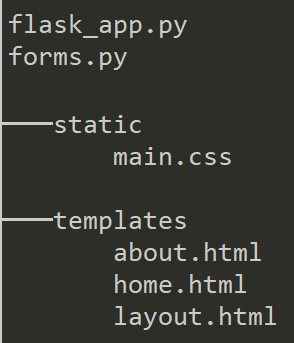

Dans le dossier ___templates___, créer donc deux nouveau fichier ___register.html___, et ___login.html___, que nous allons remplir pour afficher les formulaires.

Commençons par ___register.html___. Comme nos autres templates à contenu unique, nous pouvons en premier lieu faire hériter le template commun ___layout.html___ avec le bloc de code ___{% extends 'layout.html' %}___, et ouvrir un nouveau bloc de code ___{% block content %}___ pour y mettre notre contenu unique.

Pas mal de code HTML va être inscrit ici, n'hésitez pas à vous renseigner sur les différentes balises pour créer la structure d'un formulaire en HTML. La base d'un formulaire HTML commence avec la balise ___form___, dans laquelle nous mettons en attribut le type de requête que nous allons effectuer avec celui-ci, dans notre cas ___method="POST"___, et l'attribut ___action___ qui indique vers quelle route nous soumettons le formulaire. Pour le moment nous le laissons vide.

Ensuite pour activer la sécurité de Flask, il faut ouvrir une balise ___{{ }}___, et y marquer ___form.hidden\_tag()___. Vous pouvez voir que nous faisons déjà appel à notre formulaire, et l'utilisons pour appeler une méthode spéciale, qui va générer un ___CSRF token___, un ___Cross Site Request Forgery token___, qui est une protection supplémentaire en plus de la clé secrète mise en place précédement.

Voici un lien expliquant très bien ce qu'est un CSRF : https://portswigger.net/web-security/csrf

Dans les balises HTML écrites, on retrouvera ___fieldset___ la balise pour regrouper en un bloc tous nos champs et leur label, suivi de ___legend___ pour indiquer un "titre" à ce formulaire, ensuite un champ du formulaire se composera de ___label___ pour indiquer ce qu'il faut remplir dans ce champ, avec un champ ___input___ pour le remplissage du champ. Ces deux dernières balises HTML vont être générées par l'instance du formulaire que nous allons appeler dans notre template.

Pour appeler un champ définis dans notre classe de formulaire, il faut ouvrir une nouvelle balise ___{{ }}___, appelé l'instance de notre formulaire ___form___, et l'attribut associé au champ que nous avons définis. Par exemple, pour appelé le champ pour renseigner l'utilisateur, nous écrirons :

In [ ]:
{{ form.username.label(class="form-control-label") }}
{{ form.username(class="form-control form-control-lg")}}

Petite explication, la première ligne appelle le label du champ, on lui passse en argument ___class=___ pour lui ajouter une classe si on le souhaite, ici je lui ajouté une classe du framework Bootstrap pour la mise en forme des formulaires.

La deuxieme ligne quant à elle, appelle notre balise ___input___ pour renseigner l'utilisateur___. Vous pouvez réaliser le même principe pour les autres champs qu'il faut afficher, c'est à dire l'email, le mot de passe et la confirmation du mot de passe. Le bouton de soumission du formulaire sera appelé hors de la balise ___fieldset___ pour une meilleure mise en forme.

Voici ce que donne le template ___register.html___ avec tous nos champs et bouton appelés :

In [ ]:
{% extends "layout.html" %}
{% block content %}
    
    <div class="form-container">
        <form action="" method="POST">
            {{ form.hidden_tag() }}
            <fieldset>
                <legend>Rejoins-nous Aujourd'hui !</legend>
                <div>
                    {{ form.username.label(class="") }}
                    {{ form.username(class="") }}
                </div>
                <div>
                    {{ form.email.label(class="") }}
                    {{ form.email(class="") }}
                </div>
                <div>
                    {{ form.password.label(class="") }}
                    {{ form.password(class="") }}
                </div>
                <div>
                    {{ form.confirm_password.label(class="") }}
                    {{ form.confirm_password(class="") }}
                </div>
            </fieldset>
            <div>
                {{ form.submit(class="")}}
            </div>
        </form>
    </div>
    
    <div>
        <small>
            Vous avez déjà un compte ? <a href="{{ url_for('login') }}"></a>
        </small>
    </div>

{% endblock %}

Ajout supplémentaire en fin de code, un petit texte dans une balise ___small___ pour rediriger l'utilisateur vers la page de login que nous allons créer, si jamais il possède déjà un compte. Comme pour notre feuille de style CSS, nous utilisons la méthode ___url\_for___ pour générer le chemin vers notre page de login. Si vous avez remarquer, je lui passe en argument le nom de ma view function vers laquelle je veux le chemin, et non la route d'url directement.

Nous pouvons tester la mise en place de ce premier formulaire en se rendant sur la page ___/register___ de notre application. Votre formulaire et ses différents champs apparaissent bien, mais il reste encore une bonne partie à faire.

Votre formulaire s'affiche bien, mais si vous le remplissez et le soumettez, une erreur est retournée : "Method Not Allowed". Nous avons dis tout à l'heure que le formulaire soumettais les données à la même page car nous avons laisser l'attribut ___action___ vide. L'erreur indique que notre page ___/register___ n'autorise pas les requêtes HTTP de type POST. Nous allons changer cela, aller dans le fichier ___flask\_app.py___.

Dans notre view function ___register___, dans le décorateur ___app.route___, en plus de l'url pattern, nous allons passer en argument ___methods=___, qui prend une liste des méthodes HTTP que notre view function accepte. Nous indiquons donc dans la liste ___'GET'___ pour la méthode GET, et ___'POST'___ pour la méthode POST.

In [ ]:
# flask_app.py

...

@app.route("/register", methods=['GET', 'POST'])
def register():
    form = RegistrationForm()
    return render_template("register.html", title="Register", form=form)

Maintenant que notre view function, il est important d'indiquer à l'utilisateur si oui ou non, les données qu'il a renseigné sont validées, et si c'est la cas le rediriger vers notre page d'accueil au lieu de la même page d'enregistrement.

### Flash message

Flask fournis des messages dits "flash" pour indiquer à l'utilisateur ce qu'il se passe. Nous allons donc les utiliser pour indiquer à notre utilisateur si son inscription est complète.

Dans un premier temps, importer ___flash___ du module ___flask___, puis mettons en place une structure conditionnelle, qui va utiliser une méthode de notre instance de formulaire ___form___. La méthode est ___validate\_on\_submit___, et comme son nom l'indique vérifie si les informations sont soumises sont validées.

Si c'est le cas, nous appelons la méthode ___flash___, et lui passons en argument le message voulant être afficher à l'utilisateur si son compte bien créer. En deuxième argument, vous pouvez passer une catégorie de message que vous pouvez retransmettre dans le template pour la mise en forme du message. Par exemple, pour notre message de création du compte, il est possible de passer ___'success'___ et l'utiliser dans notre template pour le passer en tant que class HTML et réaliser une mise en forme en fonction de cette classe (Bootstrap fournis ce genre de mise en forme ___alert alert-success___)

Nous avons également dis qu'il serait plus compréhensible pour l'utilisateur d'être redirigé sur une autre page que celle du formulaire. La méthode ___redirect___ du module ___flask___ est mise à disposition pour cela, et nous lui passons ___url\_for___ avec le nom de la view function que l'on veut appellé pour la redirection, dans notre cas ___home___.

In [ ]:
# flask_app.py

...

@app.route("/register", methods=['GET', 'POST'])
def register():
    form = RegistrationForm()
    if form.validate_on_submit():
        flash(f'Votre compte a bien été créé {{form.username.data}}', 'success')
        return redirect(url_for('home'))
    return render_template("register.html", title="Register", form=form)

Si vous soumettez de nouveau votre formulaire, la redirection sur la page d'accueil se fait bien, mais aucun message d'information n'apparait. C'est tout à fait normal puisque nous n'avons pas indiqués à notre template ___layout.html___ qu'il pourrait y en avoir et dans quel cas l'afficher.

Retour dans notre template ___layout.html___. Nous allons faire en sorte de faire apparaitre notre message  en haut de la page. Avant l'ouverture de notre bloc ___block content___, ouvrez une balise ___div___ qui va accueillir notre message s'il y en a un.

En premier, il faut imaginer que nos messages sont contenus dans un fichier, et donc utiliser la méthode ___with___ dans un bloc de code ___{% %}___, puis nous allons définir une variable ___messages___ qui prendra tous les messages présents, avec la méthode ___get\_flashed\_messages()___. Comme expliquer précédement, nous pouvons définir et passer des catégories selon nos messages. Pour les activer, passez en argument ___with\_categories=true___ à la méthode ___get\_flashed\_messages()___.

Ensuite dans notre bloc ___with___, ouvrez un nouveau bloc de structure conditionnelle ___{% if messages %}___, qui vérifie donc si notre variable ___messages___ contient un message. Dans cette structure conditionnnelle, ouvrons un nouveau bloc de code avec une boucle ___for___ pour itérer sur tous les messages contenues et leurs catégories également. Nous passons la catégorie à la classe de la balise pour la mettre en forme (exemple avec Bootstrap ici), et affichons le message dans notre balise.

In [ ]:
# layout.html

<!DOCTYPE html>
<html>
    <head>

        <!-- Required meta tags -->
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1">

        <!-- Bootstrap CSS -->
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6" crossorigin="anonymous">

        <link rel="stylesheet" href="{{ url_for('static', filename='main.css') }}">

        {% if title %}
            <title> Flask Blog - {{ title }}</title>
        {% else %}
            <title> Flask Blog</title>
        {% endif %}

    </head>
    <body>

        {% with messages = get_flashed_messages(with_categories=True) %}
            {% if messages %}
                {% for category, message in messages %}
                    <div class="alert alert-{{ category }}">
                        {{ message }}
                    </div>
                {% endfor %}
            {% endif %}
        {% endwith %}
        
        {% block content %}
        {% endblock %}

        <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.9.1/dist/umd/popper.min.js" integrity="sha384-SR1sx49pcuLnqZUnnPwx6FCym0wLsk5JZuNx2bPPENzswTNFaQU1RDvt3wT4gWFG" crossorigin="anonymous"></script>
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/js/bootstrap.min.js" integrity="sha384-j0CNLUeiqtyaRmlzUHCPZ+Gy5fQu0dQ6eZ/xAww941Ai1SxSY+0EQqNXNE6DZiVc" crossorigin="anonymous"></script>

    </body>
</html>

Si vous remplissez le formulaire correctement et le soumettez, vous serez bien redirigés vers la page d'accueil avec un message d'alerte vert indiquant que votre compte a bien été créé. Mais qu'arrive t-il si le formulaire n'est pas remplis correctement ?

Si vous renseignez une adresse email avec la mauvaise forme par exemple (sans @), vous êtes redirigés sur la page du formulaire mais sans informations sur ce qui ne va pas. Il faut donc mettre en place un système pour indiquer à l'utilisateur ce qui ne va pas.

Aller dans le template ___register.html___. De la même manière que pour les messages flash, nous allons mettre en place une structure conditionnelle qui va vérifier si une erreur est levée, on ouvre donc un bloc conditionnel ___{% if %}___, et la condition à vérifier est si notre champ lève une erreur, donc nous utilisons ___form.username.errors___ pour récupérer ces erreurs.

Si des erreurs sont levés, nous pouvons afficher notre champ d'une autre manière (avec la classe ___is-invalid___ de Bootstrap), et principalement afficher en dessous l'erreur ou les erreurs levées. Nous utilisons donc un bloc ___{% for error in form.username.errors %}___ pour itérer et afficher les erreurs dans une balise ___div___, ce qui donne pour le champ ___username___ :

In [ ]:
# register.html

...

<div>
    {{ form.username.label(class="") }}
    {% if form.username.errors %}
        {{ form.username(class="is-invalid") }}
        <div class="inalid-feedback">
            {% for error in form.username.errors %}        
            <small>
                {{ error }}
            </small>
            {% endfor %} 
        </div>                     
    {% else %}    
        {{ form.username(class="") }}
    {% endif %}
</div>

Vous pouvez bien sur appliquer ce principe pour tous les autres champs du formulaire, puis faire une vérification par vous même en soumettant des formulaires erronnés, si nos messages d'erreurs sont bien affichés.

Nous avons réaliser l'intégration du formulaire d'enregistrement d'un utilisateur, l'intégration du formulaire pour l'authentification n'est pas très différente.

Creer un nouveau template ___login.html___ si ce n'est pas déjà fait, et faites un copier coller du template ___register.html___ que nous venons de configurer, nous allons le prendre en base. Dans notre nouveau formulaire, nous pouvons garder le champ email, et enlever le champ username puisque l'utilisateur s'authentifiera avec son email.

Nous pouvons garder également le champ password, et enlever celui de confirmation de mot de passe. Derniers ajustements, ajouter le champs ___Remember me___ avec ___form.remember___, et ajouter un petit texte à côté, et changer le texte du bouton de soumission, en mettant ___Login___. Vous pouvez également ajouter un petit texte en dessous, invitant l'utilisateur à s'enregistrer si jamais il n'a pas de compte. Nous verrons plus tard comment ajouter un lien de reinitialisation de mot de passe si jamais l'utilisateur le souhaite.

Voici ce que donne notre page de template ___login.html___ :

In [ ]:
{% extends "layout.html" %}
{% block content %}
    
    <div class="form-container">
        <form action="" method="POST">
            {{ form.hidden_tag() }}
            <fieldset>
                <legend>S'authentifier</legend>
                <div>
                    {{ form.email.label(class="") }}
                    {% if form.email.errors %}
                        {{ form.email(class="is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.email.errors %}        
                                <small>
                                    {{ error }}
                                </small>
                            {% endfor %}                      
                        </div>
                    {% else %}    
                        {{ form.email(class="") }}
                    {% endif %}
                </div>
                <div>
                    {{ form.password.label(class="") }}
                    {% if form.password.errors %}
                        {{ form.password(class="is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.password.errors %}        
                                <small>
                                    {{ error }}
                                </small>
                            {% endfor %}                      
                        </div>
                    {% else %}    
                        {{ form.password(class="") }}
                    {% endif %}
                </div>
                <div class="form-check">
                    {{ form.remember(class="form-check-input") }}
                    {{ form.remember.label(class="form-check-label") }}
                </div>
            </fieldset>
            <div>
                {{ form.submit(class="")}}
            </div>
        </form>
    </div>
    
    <div>
        <small>
            Vous n'avez pas de compte ? <a href="{{ url_for('register') }}">S'enregistrer</a>
        </small>
    </div>

{% endblock %}

Une fois le template configuré, nous pouvons aller dans le fichier ___flask\_app.py___ pour configurer la view function en conséquence, c'est à dire ajouter les méthodes HTTP acceptées par notre view function, et l'apparition des messages de succès avec redirection sur la page d'accueil, si l'utilisateur s'authentifie correctement.

Nous simulons de fausses données d'authentification ici pour tester nos messages de succès ou d'erreur, en introduisant une structure conditionnelle ___if form.email.data == admin@blog.com and form.password.data == 'password'___. Si les bonnes données sont rentrées, on affiche un message de succès, dans le cas contraire, on indique à l'utilisateur de verifier son email ou son mot de passe car il y a erreur.

In [ ]:
# flask_app.py

...

@app.route("/login", methods=['GET', 'POST'])
def login():
    form = LoginForm()
    if form.validate_on_submit():
        if form.email.data == 'admin@blog.com' and form.password.data == 'password':
            flash('Vous êtes connectés !', 'success')
            return redirect(url_for('home'))
        else:
            flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)

Réalisez des tests d'authentification, si les deux cas fonctionnent, nous pouvons cloturer cette partie et passer à une prochaine : Les bases de données et SQLAlchemy.

## Base de données et SQLAlchemy

Nos formulaires sont fonctionnelles, mais aucune donnée n'est réellement enregistrer pour le moment. Nous allons ici mettre en place et voir comment gérer une base de donnée sur une application Flask. Et pour cela nous allons utiliser ___SQLAlchemy___.

___SQLAlchemy___ est un ___ORM___, pour ___Object-Relational Mapping___. Cela va permettre d'intéragir avec n'importe quelle base de donnée (SQLite, Postgres etc...) de façon simplifié sous forme de programmation orientée objet. La table de notre base de donnée sera représentée par une classe, et ses attributs seront les colonnes de notre table. Nous allons voir cela dans quelques instants, mais tout d'abord, configurons notre projet pour utiliser une base de donnée ainsi que SQLAlchemy.

Pour notre projet, nous utiliserons une base de donnée SQLite pour le développement, qui est simple à mettre en place et est juste contenue dans un fichier, puis nous utiliserons PostegreSQL pour le déploiement de l'application.

### Configuration de la base de donnée et de SQLAlchemy

Aller dans le terminal, et dans votre environnement virtuel, installer le package ___flask-sqlalchemy___ avec ___pip___. Il existe le package de SQLAlchemy seul, mais ce package va installer en plus une aide à l'integration avec Flask. Une fois l'installation terminée, retour dans notre fichier principal de l'application.

Nous importons ce nouveau module avec ___from flask_sqlalchemy import SQLAlchemy___, et après cette import, nous devons spécifier l'URI de la base de donnée que nous allons utiliser, c'est à dire où se trouve notre base de donnée. Juste après la configuration de notre clé secrète, nous allons indiquer donc cet URI

In [ ]:
# flask_app.py

from flask_sqlalchemy import SQLAlchemy

app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'

...

Nous passons donc notre URI dans les configurations de notre application avec ___app.config['SQLALCHEMY_DATABASE_URI']___, puis pour sa valeur, nous indiquons dans une chaine de caractère le type de la base de donnée, puis son chemin. Les 3 /// permettent de créer un chemin relatif vers le fichier qui lance l'application, notre fichier ___flask_app.py___, et et comme nous allons mettre notre base de donnée SQL dans le même dossier que celui-ci, nous avons juste à indiquer le nom du fichier. La configuration de l'URI selon le type de base de donnée est disponible sur la doc du package ___flask-sqlalchemy___ (https://flask-sqlalchemy.palletsprojects.com/en/2.x/config/)

Une fois l'URI renseignée, nous pouvons créer une connexion avec cette base de donnée avec le module importé ___SQLAlchemy___ en lui passant en argument notre instance de Flask

In [ ]:
# flask_app.py

...

db = SQLAlchemy(app)

Maintenant nous pouvons commencer la creation de notre table de la base de donnée.

### Creation des tables via des classes (Model Class).

La création de la table de notre base de donnée se fera dans notre fichier principal de l'application dans un premier temps, car il est possible de la créer dans un fichier à part comme pour nos formulaires, mais certaines configurations et notions sont à prendre en compte. Nous verrons comment le faire dans la prochaine partie.

Commencons par créer la table pour enregistrer nos utilisateurs. Comme nous l'avons indiquer précédement, grâce à notre ORM SQLAlchemy, notre table va donc se créer sous la forme d'une classe Python, avec ses attributs comme colonnes.

Après la connnexion à notre base de donnée, créez une classe ___User___, qui va hériter de la classe ___db.Model___. Une table commence toujours par un id avec une clé primaire, donc le premier attribut, notre première colonne, sera ___id___.

Pour créer une colonne dans notre table, nous utilisons la class ___db.Column___, à laquelle nous passons en argument le type de donnée qu'elle stockera, ici un nombre, que l'on indique avec ___db.Integer___. Vu qu'il s'agit de la clé primaire, nous ajoutons l'argument ___primary_key=True___.

Passons à la deuxième colonne, qui contiendra le nom d'utilisateur. Cette donnée sera une chaine de caractère ne dépassant pas une vingtaine de caractère, ___db.String(20)___, qui sera unique car nous ne voulons pas 2 noms d'utilisateurs pareil, ___unique=True___, et obligatoirement remplis donc non null, ___nullable=False___.

La troisième colonne contenant l'email est similaire puisqu'il s'agit d'une chaine de caractère unique et obligatoire, ___db.Column(db.String(120), unique=True, nullable=False)___.

La quatrième colonne est un peu plus particulière, puisqu'elle va contenir l'image de profil de l'utilisateur. Il s'agira toujours d'une chaine de caractère, que nous allons limiter à 20 caractères pour n'importe quelle image car nous allons voir plus tard comment hasher le nom de cette image. Ensuite cette colonne ne sera pas vide, donc ___nullable=False___, car nous ajoutons le paramètre ___default='default.jpg'___ pour ajouter une image d'utilisateur par défaut s'il n'en a pas.

Enfin la dernière colonne concerne le mot de passe, que nous limitons à 60 caractères, et que nous hasherons également plus tard. Voici donc à quoi ressemble notre première table de notre base de donnée :

In [ ]:
# flask_app.py

...

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(20), unique=True, nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)
    image_file = db.Column(db.String(20), nullable=False, default='default.jpg')
    password = db.Column(db.String(60), nullable=False)

Si vous vous souvenez du concept de l'ORM, notre table est une classe, donc une entrée dans la table correspond en quelque sorte à une instance de cette classe avec ses attributs. Pour pouvoir manipuler et identifier une entrée de la table plus facilement, nous allons modifier la représentation des instances de la classe, en modifiant la super méthode ___\__repr\____ qui retourne le résultat de la méthode ___print___ sur un objet Python.

Nous faisons en sorte que le nom de l'utilisateur, son email, et le nom de son image de profil apparaissent :

In [ ]:
# flask_app.py

...

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(20), unique=True, nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)
    image_file = db.Column(db.String(20), nullable=False, default='default.jpg')
    password = db.Column(db.String(60), nullable=False)
    
    def __repr__(self):
        return f"User('{self.username}', '{self.email}', '{self.image_file}')"

Une fois la table pour accueillir nos utilisateurs, nous pouvons utiliser le même processus pour la table qui contiendra nos articles.

Cette table contiendra une colonne ___id___ également, ___title___ une chaine de caractère limitée à 100 et non nul. Petite subtilité pour la colonne suivante de cette table, la date de publication de l'article. il s'agit d'un champ de type date, ___db.DateTime___, qui ne sera jamais nul également, et si aucune date n'est spécifié, nous voudrions que la date renseignée soit la date d'entrée dans la base de donnée.

Pour faire ceci, importez le module ___datetime___ de la librairie ___datetime___, et dans l'argument ___default___ de cette colonne, nous allons utiliser la méthode ___datetime.utcnow___, sans parenthèses pour ne pas utiliser la fonction au moment du lancement du script mais lorsque qu'une nouvelle entrée est enregistrée dans la base de donnée.

Pour finir, la quatrième colonne sera le contenu de l'article, et comme ce contenu n'a pas forcément de limite de caractère, nous utilisons la class ___db.Text___.

Comme notre table ___User___, nous redéfinissons la représentation d'une instance de notre nouvelle table ___Post___, en modifiant la super méthode ___\_\_repr\_\____, pour afficher le titre de l'article et sa date de publication.

In [ ]:
# flask_app.py

...

class Post(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String(100), nullable=False)
    date_posted = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)
    content = db.Column(db.Text, nullable=False)

    def __repr__(self):
        return f"Post('{self.title}', '{self.date_posted}')"

Vous avez peut être remarquer que nous n'avons pas ajouter de colonne pour l'auteur de chaque article. En effet nous allons créer un lien entre nos deux tables, une relation. La relation d'un utilisateur par rapport aux articles est qu'un utilisateur peut avoir plusieurs articles, mais qu'un article n'a qu'un auteur (dans notre cas). On appelle cela une relation ___One to Many___.

Pour créer cette relation, allons d'abord dans notre classe ___User___. Grâce à notre ORM SQLAlchemy il est facile de définir cette relation avec un nouvel attribut dans notre classe.

Cette attribut est une relation donc ___db.relationship()___, à laquelle nous passons en argument le nom de la classe de la table avec laquelle nous voulons faire le lien, ici ___'Post'___, puis nous passons un  argument ___backref='author'___, qui va permettre de créer une nouvelle colonne ___author___ automatiquement dans notre table ___Post___. ___backref___ va également faciliter le fait de récupérer l'utilisateur dans la table ___User___ grâce à cette colonne ___author___ créée automatiquement.

Dernier argument que nous passons, ___lazy=True___, qui va permettre de laisser SQLAlchemy décider quand il faut charger les données quand cela est nécessaire.

In [ ]:
# flask_app.py

...

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(20), unique=True, nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)
    image_file = db.Column(db.String(20), nullable=False, default='default.jpg')
    password = db.Column(db.String(60), nullable=False)
    
    # La déclaration de notre relation
    posts = db.relationship('Post', backref='author', lazy=True)

    def __repr__(self):
        return f"User('{self.username}', '{self.email}', '{self.image_file}')"

Passons à notre table ___Post___, à laquelle nous devons ajouter l'attribut en lien avec notre table ___User___, que nous appelerons ___user_id___, puisque cette colonne va accueillir l'id de l'utilisateur auquel l'article est lié. Ce sera donc une colonne avec des nombres ___db.Integer___. 

Ce sera également ce qu'on appelle une ___ForeignKey___, une clé étrangère, qui n'appartient donc par à notre table mais à une autre. Pour définir cela, nous utilisons ___db.ForeignKey___, et nous passons à cette classe le nom de la table (et pas celui de la classe représentant la table) avec son attribut, dans notre cas ___user.id___. Enfin cette colonne ne sera donc jamais vide.

In [ ]:
# flask_app.py

...

class Post(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String(100), nullable=False)
    date_posted = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)
    content = db.Column(db.Text, nullable=False)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)

    def __repr__(self):
        return f"Post('{self.title}', '{self.date_posted}')"

Nos deux modèles de tables sont maintenant configurées. Voyons comment créer notre base de donnée SQLite, et intéragir avec elle via les différentes fonctionnalités qu'offre SQLAlchemy. Rendez vous dans votre terminal de commande.

### Creation de la base de donnée et interaction

Maintenant que nos tables sont prêtes à être "importer", il faut créer notre base de donnée. Nous allons profiter de cette partie dans le terminal pour voir également comment intéragir avec la base de donnée facilement grâce à Python et SQLAlchemy.

Dans votre terminal, mettez vous dans le dossier de votre projet, et ouvrez une console Python ___python___. Dans la consoe Python, nous allons importer l'instance de notre base de donnée dans notre fichier principal ___flask_app.py___, pour cela taper ___from flask_app import db___, et si tous se passse bien vous verrez un message d'avertissement de la part de SQLAlchemy, rien d'alarmant

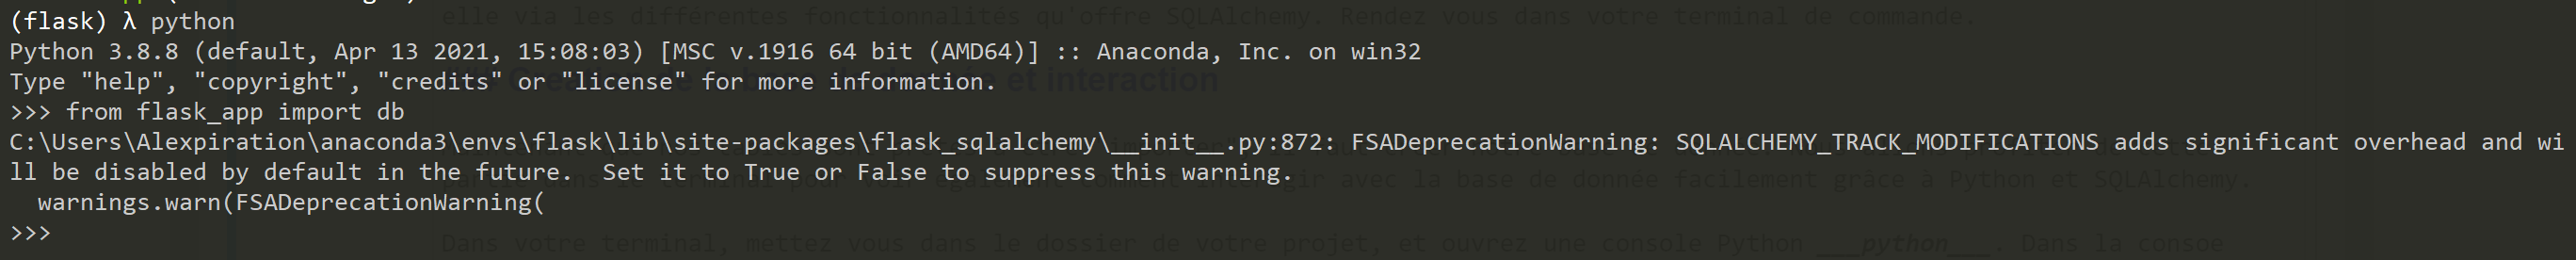

Maintenant que nous avons importés l'instance de notre futur base de donnée, nous pouvons la créer avec la commande ___db.create_all()___, et si vous vous souvenez, nous avons indiqués le chemin de notre base de donnée dans le même dossier que le fichier principal de notre projet. Vous pouvez donc vérifier la création de la base de donnée en regardant dans votre dossier qu'un fichier ___site.db___ a bien été créé

Notre base de donnée avec nos tables créée, essayons d'ajouter un premier utilisateur. Pour cela importer la classe modélisant votre table d'utilisateur, la model class, ___User___, et importer en même temps la model class des articles ___Post___ en tapant ___from flask_app import User, Post___.

Pour créer un utilisateur, rien de plus simple, il suffit de créer une variable, et lui assigner une instance de la model class, en lui passer en argument tous les champs qu'une entrée dans la table a besoin. Dans notre cas pour un utilisateur, on renseignera ___username, email, et password___. L'id d'une nouvelle entrée n'a pas besoin d'être renseigné, s'agissant d'une clé primaire unique, il est généré et ajouté automatiquement à la création d'une nouvelle entrée.

Pour ajouter ce nouvel utilisateur dans la base de donnée, il faut utiliser la méthode ___session.add___, et lui passer notre variable représentant l'utilisateur, appelons là ___user_1___ pour le premier utilisateur. Pour finir, nous devons sauvegarder le changement de la base de donnée avec ___db.session.commit()___.

Pour appliquer tous cela, créez et ajoutez 2 utilisateurs à la base de donnée, voici ce que donne la session dans votre terminal :

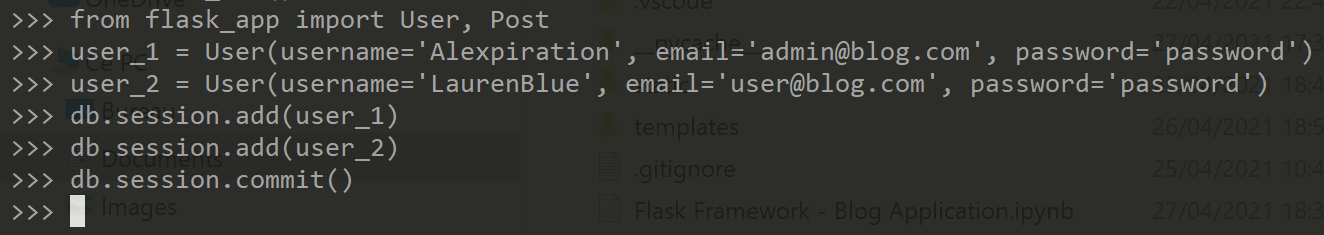

A noter que l'ajout d'un utilisateur avec la méthode ___session.add___ doit se réaliser avec un utilisateur à la fois.

Le terminal Python n'étant pas très bavard, si aucune erreur n'est soulevé, c'est que vos entrées ont bien été sauvegardées. Pour vérifier cela, nous pouvons réaliser une première requête sur notre base de donnée. C'est également ici que toute la magie de SQLAlchemy opère, en facilitant la syntaxe pour réaliser une requête sur la base de donnée.

Pour obtenir toutes les entrées de notre table ___User___, taper la commande ___User.query.all()___, qui vous retournera une liste de tous les utilisateurs présents dans la base de donnée. Vous pouvez remarquer que cette liste contient la représentation des instances de notre model class ___User___, avec la forme que nous avons définis dans super méthode ___\_\_repr\_\____.

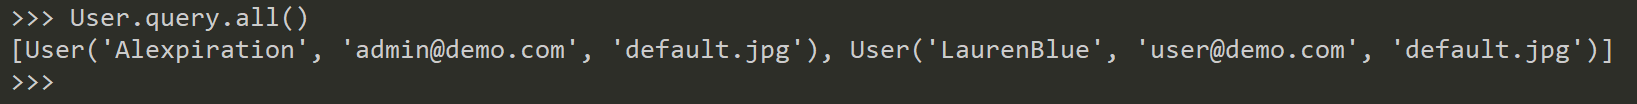

La commande ___User.query.first()___ vous retournera uniquement le premier résultat de la requête.

Il est possible de réaliser également des requêtes filtrées par certains critères avec ___User.query.filter_by()___, exemple avec la commande ___User.query.filter_by(username='Alexpiration').all()___, qui sortira la liste des utilisateurs dont le username est Alexpiration.

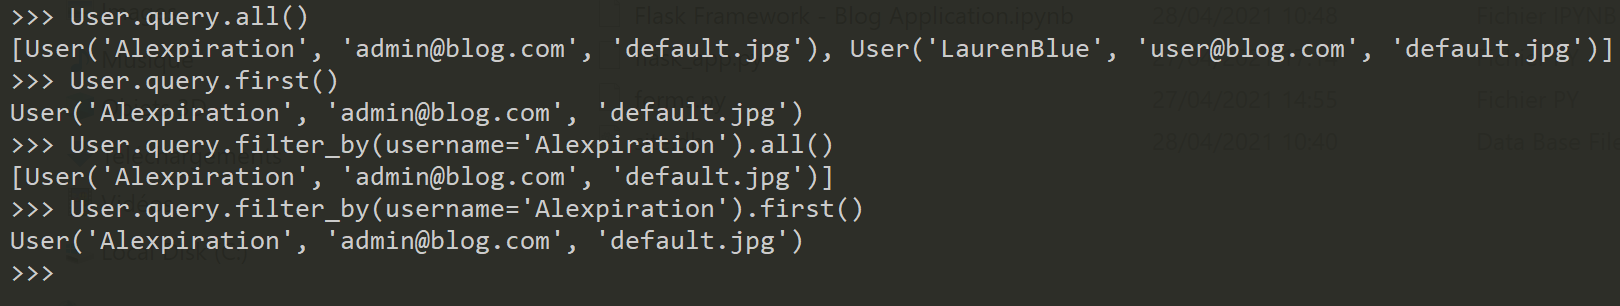

Voyons un autre avantage qu'offre la manipulation de notre base de donnée via SQLAlchemy. Si je met le résultat de ma requête ___User.query.filter_by(username='Alexpiration').first()___ dans une variable ___user___, il est possible d'accéder aux informations de mon utilisateur directement via ses attributs. Son id est accessible via ___user.id___, son username via ___user.username___.

Nous pouvons également obtenir une entrée de notre table via son id avec la méthode ___query.get(id)___.

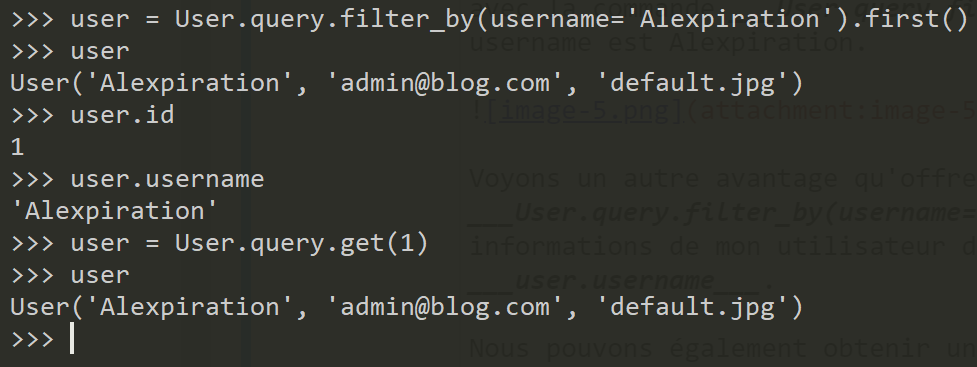

Si vous vous rappelez, nous avons également créer un attribut ___posts___ dans notre model class ___User___. Pour le moment si vous essayez d'accéder aux articles de notre utilisateur, cela vous retournera une liste vide, puisque notre utilisateur n'a encore aucun article. Il est important de bien retenir que notre attribut ___posts___ dans notre model class n'est pas une colonne de la table, mais un attribut permettant de lié et créer une requête facile pour obtenir les articles de notre utilisateur.

Créons quelques articles pour voir comment ils sont assignés à un utilisateur. Dans votre terminal de commande, partez du même processus que lors de la création d'un utilisateur, mais cette fois-ci en créant une instance ___post_1 de la model class ___Post___, avec en argument un titre pour l'article, un contenu, et pour le champ ___user_id___ que nous avons définis lors de la création de la classe, vous pouvez utiliser la magie de SQLAlchemy et passer ___user.id___.

Vous pouvez remarquer que nous n'avons pas spécifiés de date pour l'article, qui sera donc incrémentée automatiquement à la date d'ajout de l'entrée dans la table via ___datetime.utcnow___. Créez un deuxieme article ___post_2___ de la même manière en l'associant au même utilisateur, et n'oubliez pas de sauvegarder ces nouvelles entrées dans la base de donnée avec ___db.session.add()___ et ___db.session.commit()___ pour finaliser.

Maintenant, si vous réalisez une requête sur les articles de votre utilisateur ___user___, vous obtiendrez une liste des articles qui lui est associés. Petit exemple de ce que l'on peut réaliser avec cette requête, en faisant une boucle ___for___ sur nos articles, et afficher le titre de chaque article.

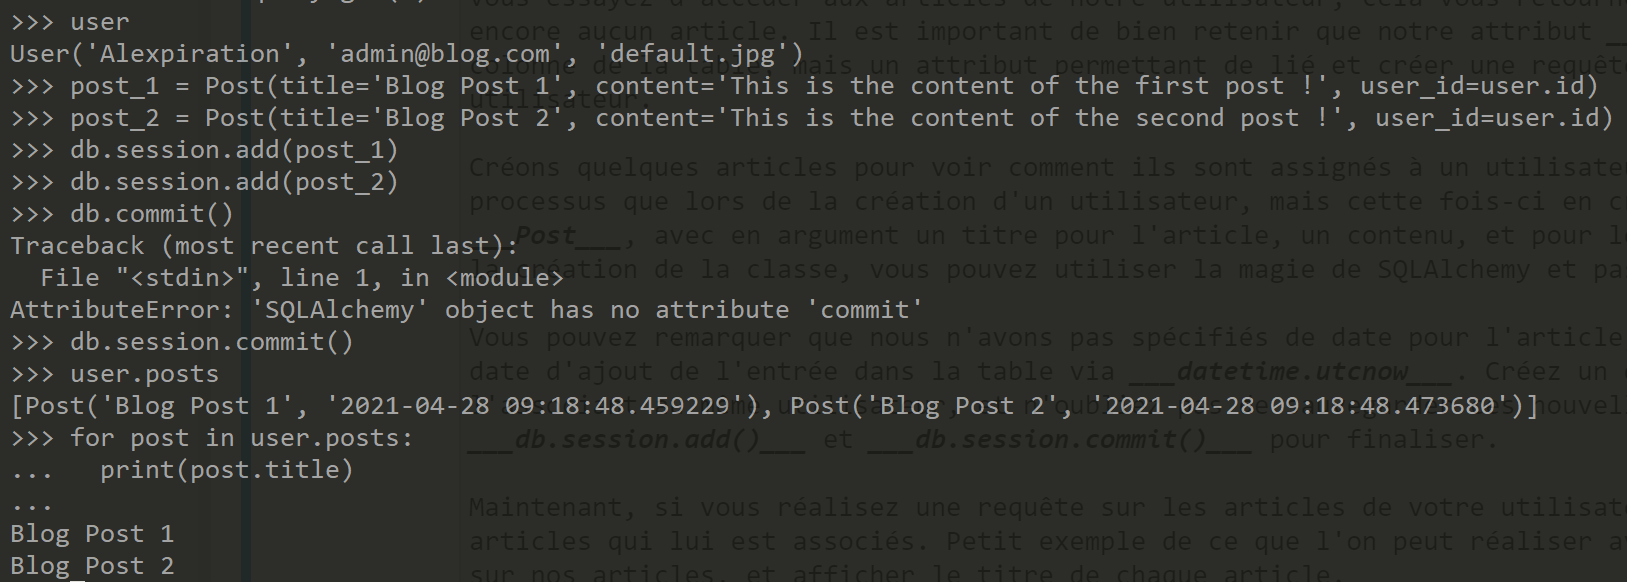

Dernière démonstration sur l'avantage de ce que nous avons créés via nos model class : si vous avez compris la logique d'un ORM, nous pouvons aisement accéder aux informations d'un article, comme avec notre utilisateur. En sauvegardant le résultat d'une requête d'un article dans une variable ___post___, nous pouvons accéder à l'utilisateur_id de celui-ci avec ___post.user_id___.

Mais nous avons ajoutés une fonctionnalité encore mieux que cela, en ajoutant l'argument ___backref=author___ dans la relation de notre model class ___User___. En effet, si vous tapez ___post.author___, vous aurez accès directement à l'instance de l'utilisateur qui a créé cette article, ce qui est une très bonne fonctionnalité pour beaucoup de manipulation.

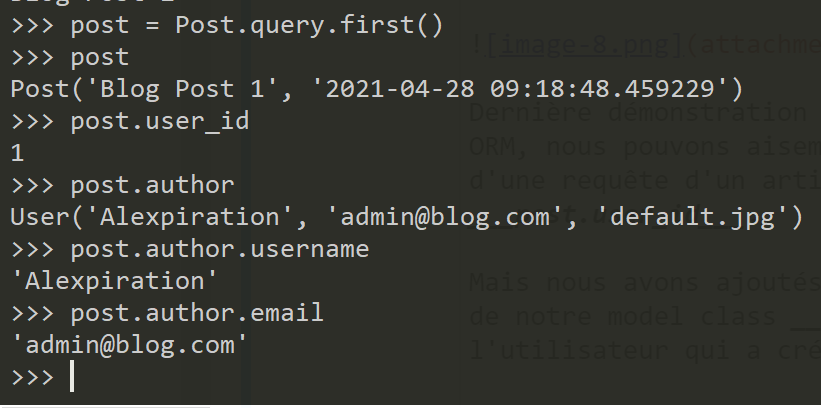

Cette partie sur la création et la manipulation de notre base de donnée est terminée, pour être sûr dans la prochaine partie de repartir sur de bonnes bases, effacez le contenu que nous venons d'ajouter dans notre base de donnée avec la commande ___db.drop_all()___.

La prochaine partie s'attaque à la restructuration de l'application, car pour le moment nous avons beaucoup d'informations dans notre fichier principal qui pourraient être séparer dans plusieurs fichiers, pour une meilleure organisation du projet.

## Restructuration en package

Durant cette partie, nous allons entamer une restructuration de votre projet. Comme mentionné dans la partie précédente, il est possible de déclarer nos model class pour notre base de donnée dans un fichier dédié pour plus de clareté. Essayons cela tout de suite en créant un fichier ___models.py___, et en déplaçant nos model class ___User et Post___ du fichier ___flask_app.py___ vers notre nouveau fichier.

Dans nos model class, nous utilisons plusieurs modules, qu'il nous faut importer, comme notre instance de la base de donnée ___db___, ainsi que le module ___datetime___ pour la model class ___Post___.

In [ ]:
# models.py

from datetime import datetime
from flask_app import db


class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(20), unique=True, nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)
    image_file = db.Column(db.String(20), nullable=False, default='default.jpg')
    password = db.Column(db.String(60), nullable=False)
    posts = db.relationship('Post', backref='author', lazy=True)

    def __repr__(self):
        return f"User('{self.username}', '{self.email}', '{self.image_file}')"


class Post(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String(100), nullable=False)
    date_posted = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)
    content = db.Column(db.Text, nullable=False)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)

    def __repr__(self):
        return f"Post('{self.title}', '{self.date_posted}')"

Après le déplacement de notre code concernant nos model class dans un fichier externe, nous devons donc importer celles-ci dans notre fichier principal de l'application. Ajouter dans ___flask_app.py___, l'import ___from model import User, Post___, et testez le lancement de l'application dans le terminal avec ___python flask_app.py___.

Une erreur par Python est remontée qui est la suivante :

___ImportError: cannot import name 'User' from partially initialized module 'models' (most likely due to a circular import)___

Python nous indiques qu'il n'arrive pas à importer notre classe ___User___. L'explication va être assez complexe, donc accrochez vous bien.

### Importation Circulaire

Dans le processus de lancement de notre application, notre fichier ___flask_app.py___, directement lancé via le terminal, exécute ses premières lignes donc les imports des différents modules et librairies. Rappel de ce que nous avons comme import dans notre fichier ___flask_app.py___ :

In [ ]:
# flask_app.py

from datetime import datetime
from flask import Flask, render_template, url_for, flash, redirect
from flask_sqlalchemy import SQLAlchemy
from forms import RegistrationForm, LoginForm
from models import User, Post 

Les 4 premières lignes d'import se pense sans soucis particulier, la plupart étant des librairies que nous avons installés, et le fichier ___forms___ n'appelant pas de module ou librairie particulière dans son propre fichier, aucune erreur n'est levé pour son import.

Lorsque nous avons arrivons à l'import de nos model class dans le fichier ___models.py___, voici un petit schema de ce qu'il se passe, uniquement pour l'import des modules et librairies dans les deux fichiers :

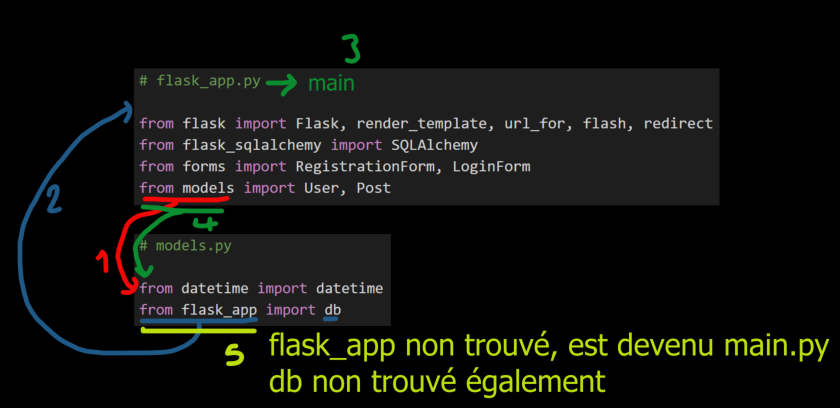

Lorsque viens l'import de notre fichier ___models.py___, il est exécuté et réalise également ses propres imports. Dans ses imports se trouve un appel à notre fichier ___flask_app.py___, Python va donc retourner dans notre fichier principal car il l'a déjà vu.

Mais entre temps, vu que notre fichier principal est exécuté directement, Python a renommer le script ___\__main\_\_.py___. Le fichier ___flask_app.py___ est exécuté une seconde fois cette fois-ci en tant que ___\__main\_\____ et arrive de nouveau à l'exécution de l'import de notre fichier ___models.py___. Python retourne dans notre fichier ___models.py___, et arrive une seconde fois à l'import de ___db___ via notre fichier ___flask_app___. Python a déjà "parcouru" ce dernier et n'a pas trouvé de variable ___db___, puisque le script n'a pas pu aller jusqu'à la creation de notre variable ___db___.

Voici pourquoi Python soulève cette erreur, il s'agit ici d'une importation dite circulaire. Pour corriger cela, nous pourrions déclarer l'import de nos model class après la création de l'instance de notre base de donnée ___db___, et renommer l'import de notre variable ___db___ en ___from __main\_\_ import db___, mais cela donnerai une structure et une allure plutôt mauvaise à notre code.

De plus l'interaction avec notre base de donnée serait impossible dans une console Python puisque notre fichier ___flask_app.py___ n'est renommer que lors de son exécution avec le terminal, ce qui n'est pas le cas dans la console Python lorsque l'on fait appel à lui.

Pour palier à cette erreur, nous allons restructurer notre applications sous forme de package, qui sera donc plus facile à importer.

### Creation du package

La creation d'un package Python se fait via 2 choses obligatoires, un dossier qui aura pour nom le nom du package souhaité, dans notre cas ___flask_app___, et un fichier ___\__init\_\_.py___ dans ce dossier. Dans notre nouveau dossier, nous allons également dans ce noveau dossier, déplacer tous les autres fichiers sauf ___flask_app.py___.

Après déplacement des fichiers, supprimez le fichier de notre base de donnée que nous allons recréer par la suite après restructuration.

Voici l'allure de votre projet actuellement :

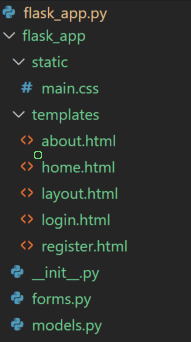

Maintenant, faisons en sorte que notre package Python initialise notre application et ses différents composants. On va donc prendre la plupart des parties de code de notre fichier ___flask_app.py___ et les séparer dans différents fichiers.

Nous commençons par couper coller tous les imports, la creation de l'instance et configuration de notre application dans le fichier ___\_\_init\_\_.py___ :

In [ ]:
# __init__.py

from flask import Flask, render_template, url_for, flash, redirect
from flask_sqlalchemy import SQLAlchemy
from forms import RegistrationForm, LoginForm

app =  Flask(__name__)
app.config['SECRET_KEY'] = 'ec3ae0af562516b4e5e135f883d3519f'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)

Le fichier ___flask_app.py___ se retrouve uniquement avec notre fausse base de donnée et les view functions que nous avons définis pour notre application. Etant en pleine restructuration, profitons-en pour mettre nos url pattern dans un fichier dédié également, en créant un fichier ___routes.py___ dans notre package et faire migrer notre code en conséquence.

Faites un couper coller de tous le reste du code de ___flask_app.py___ excepté la partie qui ___if __name__ == "__main\_\_"___, dans le fichier ___routes.py___.

In [ ]:
# routes.py

from models import User, Post 

posts = [
    {
        "author": "Alexpiration",
        "title": "First Blog Post",
        "content": "This is the content of the 1st post blog",
        "date_posted": "25 Avril 2021"
    },
    {
        "author": "LaurenBlue",
        "title": "LaurenBlue Blog Post",
        "content": "This is the content of the 2nd post blog",
        "date_posted": "26 Avril 2021"
    },
    
]

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html", posts=posts)

@app.route("/about")
def about():
    return render_template("about.html", title="About")

@app.route("/register", methods=['GET', 'POST'])
def register():
    form = RegistrationForm()
    if form.validate_on_submit():
        flash(f'Votre compte a bien été créé {form.username.data}', 'success')
        return redirect(url_for('home'))
    return render_template("register.html", title="Register", form=form)

@app.route("/login", methods=['GET', 'POST'])
def login():
    form = LoginForm()
    if form.validate_on_submit():
        if form.email.data == 'admin@blog.com' and form.password.data == 'password':
            flash('Vous êtes connectés !', 'success')
            return redirect(url_for('home'))
        else:
            flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)

Notre fichier ___flask_app.py___ ayant pour fonction principale le lancement de notre application, nous allons garder cette fonction, renommer notre fichier ___run.py___. Dans notre fichier renommer ___run.py___, il faut importer notre instance de l'application ___app___ via notre nouveau package Python 

In [ ]:
# run.py

from flask_app import app

if __name__ == "__main__":
    app.run(debug=True)

Certains fichiers que nous venons de créer et modifier ont besoin de modification dans leurs imports, puisque nous avons déplacés des morceaux de codes dans divers fichiers. Certains imports doivent être ajoutés, et d'autres retirés.

Commençons par les imports dans ___\_\_init.py\_\____. Ici, nous pouvons supprimer l'import des fonctions et classes ___render_template, url_for, flash et redirect___, puisqu'ils sont utilisés dans le fonctionnement de nos view functions, qui sont dans le fichier ___routes.py___. L'import de nos classes de formulaires n'est également plus utile.

In [ ]:
# __init__.py

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

...

Passons à notre fichier ___routes.py___. Pour le moment il ne réalise que l'import de nos model class ___User et Post___. Comme dit précédement, nos view functions utilisent les classes et fonctions ___render_template, url_for, flash et redirect___ de Flask, que nous ajoutons.

Autres modifications, pour l'import de nos formulaires et nos model class, ils sont maintenant placés dans notre module ___flask_app___, nous devons donc les appeler depuis celui-ci avec ___from flask_app.forms___ et ___from flask_app.models___. Dernier import à ajouter, celui de l'instance de notre application ___app___, puisqu'elle est utilisée pour notre décorateur ___@app.route___.

In [ ]:
# routes.py

from flask import render_template, url_for, flash, redirect
from flask_app import app
from flask_app.forms import RegistrationForm, LoginForm
from flask_app.models import User, Post

...

Il faut également que nos url pattern et view function soient importés lors de l'intialisation de notre application dans ___\_\_init\_\_.py___. Pour cela, afin de ne pas réaliser une nouvelle importation circulaire, nous déclarons l'import de ___routes___ en dernier dans notre fichier, avec ___from flask_app import routes___.

In [ ]:
# __init__.py

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

app =  Flask(__name__)
app.config['SECRET_KEY'] = 'ec3ae0af562516b4e5e135f883d3519f'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)

from flask_app import routes

Nous avons terminés la restructuration de notre application à cette étape du notebook, lancez et testez les différentes urls et fonctionnalités de notre site pour vous assurez que tous fonctionne bien. Si tel est le cas, nous pouvons passer à la partie suivante, qui porte sur le système d'authentification de nos utilisateurs.

Avant de passer à la suite, recréez notre base de donnée avec ses différentes tables via la console Python, comme nous l'avons vu précédement.

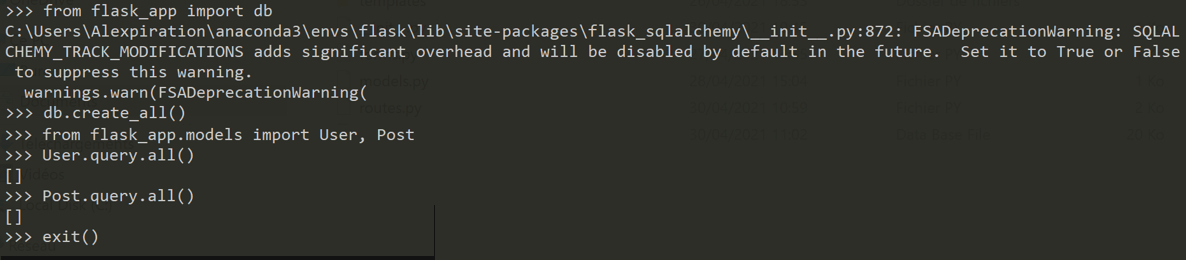

## Enregistrement et Login Utilisateur

Dans une des parties précédentes, nous avons découvert comment intéragir avec la base de donnée pour enregistrer des utilisateurs et des articles également. Il faut maintenant implémenter ces fonctionnalités dans notre application via les formulaires mis en place.

Mais avant, voyons comment hasher les mots de passe qui seront enregistrés. Il est important de hasher les mots de passe dans le cas où une personne volerait les données de votre base de donnée, afin que celle-ci ne puisse pas utiliser les données volées.

Pour cela, il existe la librairie ___Bcrypt___, et il existe également un module d'intégration ___flask-bcrpt___ pour les applications Flask. Dans votre terminal, installer donc le package à l'aide ___pip___. Pour le fonctionnement de ce module, c'est très simple. On utilise la méthode ___generate_password_hash___, à laquelle nous passons notre mot de passe en chaine de caractère.

La méthode retourne notre mot de passe hashé, sous forme de bytes (___b'motdepassehasher___), qu'il est possible d'avoir sous forme de chaine de caractère de nouveau en décodant en utf-8 avec la méthode ___decode('utf-8')___. Cette méthode de hashage a pour avantage de toujours renvoyer un hash toujours différent pour un même mot. Voici une démonstration dans la console Python :

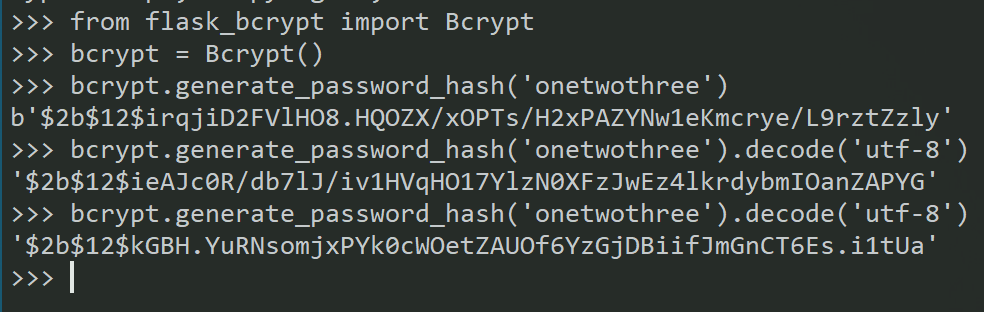

### Enregistrement

Rendez-vous dans le fichier __\_\_init\_\_.py___ pour créer une instance de la classe ___Bcrypt___ et lui passer notre instance de l'application.

In [ ]:
# __init__.py

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

# Import de la classe Bcrypt

from flask_bcrypt import Bcrypt
from flask_app.forms import RegistrationForm, LoginForm

app =  Flask(__name__)
app.config['SECRET_KEY'] = 'ec3ae0af562516b4e5e135f883d3519f'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)

# Creation de notre instance de Bcrypt avec notre app en argument pour integration plus facile

bcrypt = Bcrypt(app)

from flask_app import routes

Une fois notre instance déclarée, allons dans le fichier de nos url ___routes.py___ où se fait la gestion des données reçues par l'utilisateur. Importez en premier lieu notre instance ___bcrypt et db___ de notre package ___flask_app___. Dans notre view function ___register___, il faut dès réception et validation des données, hasher le mot de passe entré par l'utilisateur. Nous créons donc une variable ___hash_password___ qui contiendra notre mot de passe hashé avec la méthode ___generate_password_hash___, à laquelle nous passons ___form.password.data___ et que nous décodons avec ___decode('utf-8')___.

Profitons-en pour écrire le code pour enregister notre utilisateur dans notre base de donnée. Si vous vous souvenez de notre session dans la console Python, nous créons une variable ___user___, qui est une instance de notre model class ___User___ avec les informations que l'utilisateur à renseigner via le formulaire, que nous pouvons récupérer avec ___form.nom_champ.data___.

Pour finaliser l'enregistrement dans la base de donnée, bien ajouter la nouvelle donnée avec ___session.add(user)___, et la commiter avec ___session.commit()___.

Pour mieux guider l'utilisateur après la création de son nouveau compte, nous pouvons modifiés le message de succès qui apparait en lui indiquant qu'il est maintenant capable de se connecter, ainsi que la redirection sur la page de login plutôt que sur la page d'accueil.

In [ ]:
# routes.py

from flask_app import app, bcrypt, db

...

@app.route("/register", methods=['GET', 'POST'])
def register():
    form = RegistrationForm()
    if form.validate_on_submit():
        
        # Après que les données soient validés, hashage du mot de passe renseigné et
        # création d'une instance de notre model class User qui sera ensuite ajouté
        # à notre base de donnée
        
        hash_password = bcrypt.generate_password_hash(form.password.data).decode('utf-8')
        user = User(username=form.username.data, email=form.email.data, password=hash_password)
        db.session.add(user)
        db.session.commit()
        
        # Modification du message, et de la redirection de l'utilisateur pour l'insiter à
        # se connecter et tester son authentification
        
        flash(f'Votre compte a bien été créé {form.username.data}! Vous pouvez à présent vous connecter', 'success')
        return redirect(url_for('login'))
    
    return render_template("register.html", title="Register", form=form)

Vous pouvez tester l'implantation de notre nouvelle fonctionnalité en essayant de vous enregister, puis aller dans une console Python et faites une requête sur les utilisateurs contenus dans la base de donnée, afin de vérifier l'enregistrement de celui-ci.

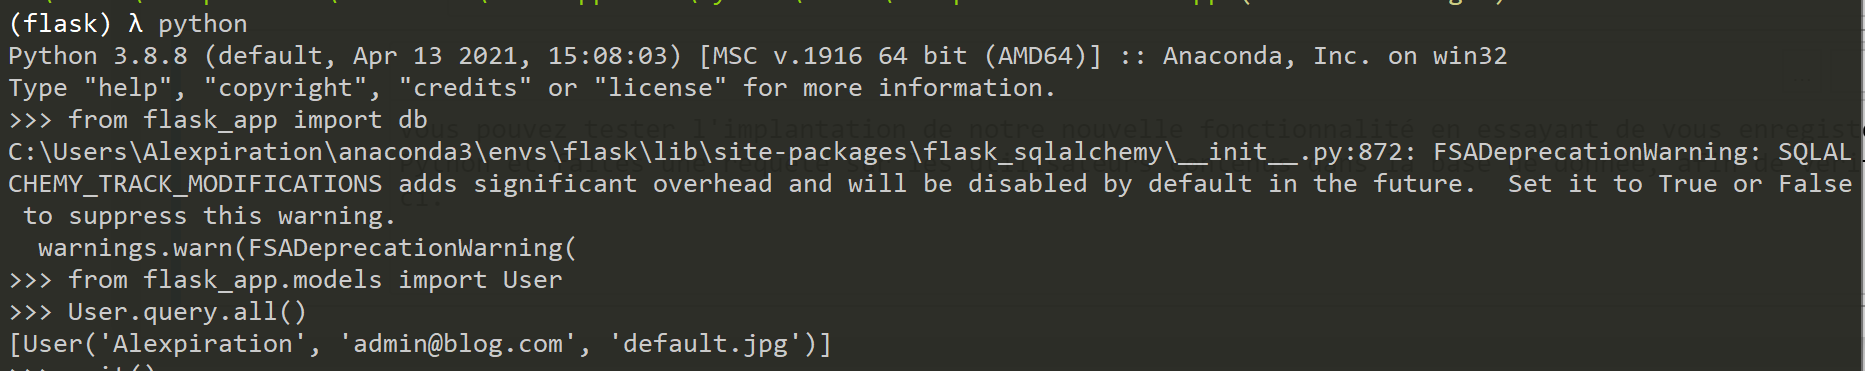

Notre utilisateur a bien été enregistré, mais que se passe t-il si vous tentez d'enregistrer un nouvel utilisateur qui possède le même nom d'utilisateur, ou bien la même adresse mail ? Etant en mode debug, vous vous retrouverez pour la première fois fasse à la page de debug de Flask.

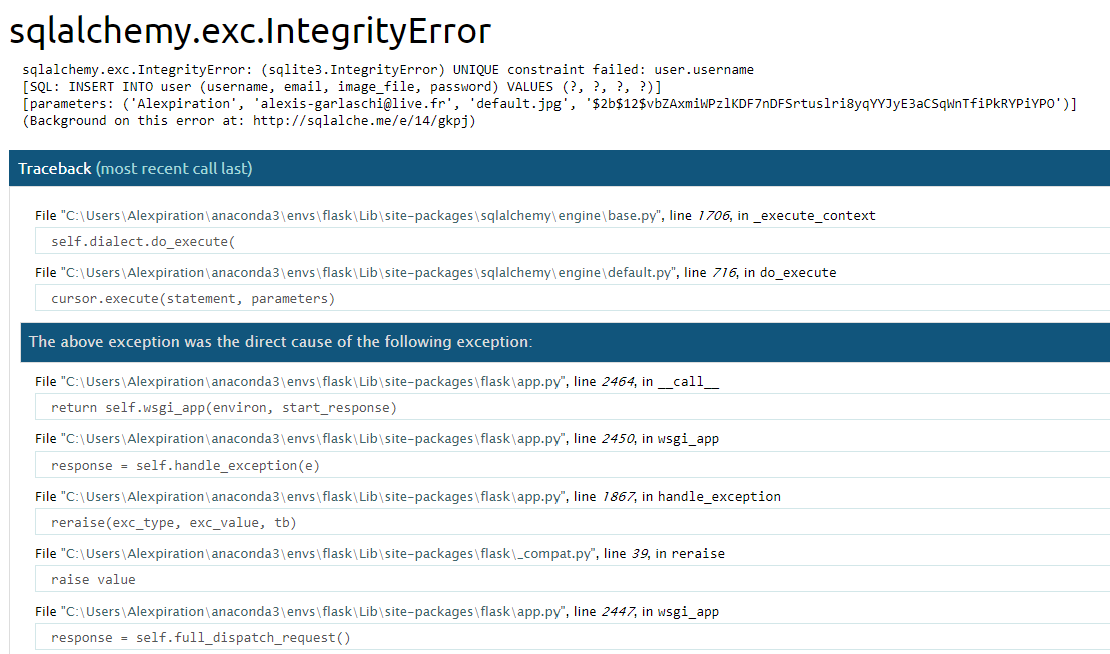

Encore une fois, le mode DEBUG doit absolument être désactivé en production, car il peut révéler à n'imoprte qui des informations essentielles sur la structure de votre application. Si vous vous y attarder un peu, vous verrez qu'il est possible à chaque ligne de lancer une console Python en entrant le PIN de Debug fournis lors du demarrage du serveur de l'application, pour inspecter les données utilisées.

Mais revenons à notre erreur. SQLAlchemy lève une erreur d'intégrité (IntegrityError), en effet nous avons déclarer dans nos tables qu'il ne pouvait pas y avoir deux fois le même nom d'utilisateur, ou le même email. Pour éviter d'avoir une page comme celle-ci ou une page d'erreur qui ne renseignerait pas l'utilisateur sur le pourquoi cela n'a pas marché, nous allons mettre en place directement dans notre formulaire ___RegistrationForm___, notre propre fonction de validation d'erreur.

Cette fonction nous allons la développer pour valider le nom d'utilisateur renseigné en premier. Le but va donc être de vérifier si dans la base de donnée, il n'y aurait pas déjà un utilisateur avec le même username, et si tel est le cas, remonter un message d'erreur demandant à notre utilisateur de trouver un autre username.

Aller dans notre fichier ___forms.py___, importez notre model class ___User___ de ___flask_app.models___, et à la suite de la déclaration des attributs de la classe ___RegistrationForm___, créez une nouvelle fonction ___validate_username___, qui va prendre en argument ___self___, et le nom d'utilisateur ___username___. On commence par faire une requête filtrée sur la base de donnée et on met le premier résultat dans une variable ___user___. Cela veut dire que si notre variable ___user___ contient une donnée, un utilisateur avec le même nom d'utilisateur existe.

Dans ce cas nous levons une erreur de validation, ____ValidationError___, classe à importer depuis ___wtforms.validators___, qui va pouvoir transmettre un message d'erreur directement en dessous du champ du formulaire concerné par l'erreur. La structure de notre fonction de validation créée, nous pouvons la copier et la modifier pour réaliser la même fonction pour l'email renseigné.

In [ ]:
# forms.py

# Import de ValidationError et de notre model class User

from wtforms.validators import DataRequired, Length, Email, EqualTo, ValidationError
from flask_app.models import User

class RegistrationForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    confirm_password = PasswordField('Confirm Password', validators=[DataRequired(), EqualTo('password')])
    submit = SubmitField('Sign Up')
    
    # Après définition des attributs/champs du formulaire, définiton des fonctions de validation
    # Les deux fonctions sont similaires dans leur principe, il s'agit juste de changer la donnée à vérifier
    # ainsi que le message à remonter.

    def validate_username(self, username):
        user = User.query.filter_by(username=username.data).first()

        if user:
            raise ValidationError('Ce nom d\'utilisateur est déjà pris, veuillez en choisir un autre.')

    def validate_email(self, email):
        user = User.query.filter_by(email=email.data).first()

        if user:
            raise ValidationError('Cet adresse mail est déjà prise, veuillez en choisir une autre.')

Je pense que si vous tentez de nouveau d'enregistrer un utilisateur déjà présent dans la base de donnée, le message d'erreur sera plus compréhensible que le précédent levé par SQLAlchemy.

Notre système d'enregistrement est opérationnel, passons à notre système de Login.

### Login

Pour notre système d'authenfication, nous allons mettre pas mal de choses en place. Et cette mise en place va pouvoir être faciliter par une extension Flask dédié ___flask-login___, que nous installons dans notre environnement virtuel avec ___pip___. Une fois installée, allez rapidement dans votre template ___layout.html___. Dans cette partie sur le système de login, nous allons mettre en place un système d'affichage/masquage de lien si l'utilisateur est authentifier ou non.

Pour voir et tester ces fonctionnalités, il nous faut une barre de navigation entre les différentes pages du site. Voici un code à copier coller dans votre template ___layout.html___ en début de balise ___body___. Il s'agit d'une barre de navigation classique créée avec le framework Bootstrap. Nous pouvons constater que les liens vers les pages dans les balises ___a___ sont générés par la méthode ___url_for___ que nous avons vus précédement.

In [ ]:
# layout.html

<!DOCTYPE html>
<html>
    <head>

        <!-- Required meta tags -->
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

        <!-- Bootstrap CSS -->
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.0/dist/css/bootstrap.min.css" integrity="sha384-B0vP5xmATw1+K9KRQjQERJvTumQW0nPEzvF6L/Z6nronJ3oUOFUFpCjEUQouq2+l" crossorigin="anonymous">


        <link rel="stylesheet" href="{{ url_for('static', filename='main.css') }}">

        {% if title %}
            <title> Flask Blog - {{ title }}</title>
        {% else %}
            <title> Flask Blog</title>
        {% endif %}

    </head>
    <body>

        <nav class="navbar navbar-expand-md navbar-dark bg-secondary">
            <div class="container">
                <a class="navbar-brand mr-4" href="/">Flask Blog</a>
                <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
                    <span class="navbar-toggler-icon"></span>
                </button>
                <div class="collapse navbar-collapse" id="navbarToggle">
                    <div class="navbar-nav mr-auto">
                        <a class="nav-item nav-link" href="{{ url_for('home') }}">Home</a>
                        <a class="nav-item nav-link" href="{{ url_for('about') }}">About</a>
                    </div>
                    <!-- Navbar Right Side -->
                    <div class="navbar-nav">
                        <a class="nav-item nav-link" href="{{ url_for('login') }}">Login</a>
                        <a class="nav-item nav-link" href="{{ url_for('register') }}">Register</a>
                    </div>
                </div>
            </div>
        </nav>

        {% with messages = get_flashed_messages(with_categories=True) %}
            {% if messages %}
                {% for category, message in messages %}
                    <div class="alert alert-{{ category }}">
                        {{ message }}
                    </div>
                {% endfor %}
            {% endif %}
        {% endwith %}
        
        {% block content %}
        {% endblock %}

        <script src="https://code.jquery.com/jquery-3.5.1.slim.min.js" integrity="sha384-DfXdz2htPH0lsSSs5nCTpuj/zy4C+OGpamoFVy38MVBnE+IbbVYUew+OrCXaRkfj" crossorigin="anonymous"></script>
        <script src="https://cdn.jsdelivr.net/npm/popper.js@1.16.1/dist/umd/popper.min.js" integrity="sha384-9/reFTGAW83EW2RDu2S0VKaIzap3H66lZH81PoYlFhbGU+6BZp6G7niu735Sk7lN" crossorigin="anonymous"></script>
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@4.6.0/dist/js/bootstrap.min.js" integrity="sha384-+YQ4JLhjyBLPDQt//I+STsc9iw4uQqACwlvpslubQzn4u2UU2UFM80nGisd026JF" crossorigin="anonymous"></script>
    
    </body>
</html>

Je vous met également une mise en forme rapide de nos différents templates avec quelques classes Bootstrap. Libre à vous selon vos goûts de les modifier. Je vous mets chaque template, ainsi que le fichier CSS à la fin pour quelques ajustements.

In [ ]:
# about.html

{% extends "layout.html" %}
{% block content %}
    
    <div class="container pt-3">
        <h1>About Page</h1>
    </div>


{% endblock %}

In [ ]:
# home.html

{% extends "layout.html" %}
{% block content %}
    
    <div class="container pt-3">

        <h1>Home Page</h1>

        {% for post in posts %}
    
            <div class="py-3">
                <h2>{{ post.title }} by {{ post.author }}</h2>
        
                <p>{{ post.content }}</p>
                <small>{{ post.date_posted }}</small>
            </div>
    
        {% endfor %}

    </div>

{% endblock %}

In [ ]:
# login.html

{% extends "layout.html" %}
{% block content %}
    
    <div class="container pt-3">

        <div class="form-container">
            <form action="" method="POST">
                {{ form.hidden_tag() }}
                <fieldset>
                    <legend>S'authentifier</legend>
                    <div class="form-group">
                        {{ form.email.label(class="") }}
                        {% if form.email.errors %}
                            {{ form.email(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.email.errors %}        
                                    <small>
                                        {{ error }}
                                    </small>
                                {% endfor %}                      
                            </div>
                        {% else %}    
                            {{ form.email(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                    <div class="form-group">
                        {{ form.password.label(class="") }}
                        {% if form.password.errors %}
                            {{ form.password(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.password.errors %}        
                                    <small>
                                        {{ error }}
                                    </small>
                                {% endfor %}                      
                            </div>
                        {% else %}    
                            {{ form.password(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                    <div class="form-check">
                        {{ form.remember(class="form-check-input") }}
                        {{ form.remember.label(class="form-check-label") }}
                    </div>
                </fieldset>
                <div class="py-3">
                    {{ form.submit(class="btn btn-info")}}
                </div>
            </form>
        </div>
        
        <div>
            <small>
                Vous n'avez pas de compte ? <a href="{{ url_for('register') }}">S'enregistrer</a>
            </small>
        </div>

    </div>


{% endblock %}

In [ ]:
# register.html

{% extends "layout.html" %}
{% block content %}
    
    <div class="form-container container pt-3">
        <form action="" method="POST">
            {{ form.hidden_tag() }}
            <fieldset>
                <legend>Rejoignez-nous Aujourd'hui !</legend>
                <div>
                    {{ form.username.label(class="") }}
                    {% if form.username.errors %}
                        {{ form.username(class="form-control col-md-6 is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.username.errors %}        
                            <small>
                                {{ error }}
                            </small>
                            {% endfor %}
                        </div>                     
                    {% else %}    
                        {{ form.username(class="form-control col-md-6") }}
                    {% endif %}
                </div>
                <div>
                    {{ form.email.label(class="") }}
                    {% if form.email.errors %}
                        {{ form.email(class="form-control col-md-6 is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.email.errors %}        
                                <small>
                                    {{ error }}
                                </small>
                            {% endfor %}                      
                        </div>
                    {% else %}    
                        {{ form.email(class="form-control col-md-6") }}
                    {% endif %}
                </div>
                <div>
                    {{ form.password.label(class="") }}
                    {% if form.password.errors %}
                        {{ form.password(class="form-control col-md-6 is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.password.errors %}        
                                <small>
                                    {{ error }}
                                </small>
                            {% endfor %}                      
                        </div>
                    {% else %}    
                        {{ form.password(class="form-control col-md-6") }}
                    {% endif %}
                </div>
                <div>
                    {{ form.confirm_password.label(class="") }}
                    {% if form.confirm_password.errors %}
                        {{ form.confirm_password(class="form-control col-md-6 is-invalid") }}
                        <div class="invalid-feedback">
                            {% for error in form.confirm_password.errors %}        
                                <small>
                                    {{ error }}
                                </small>
                            {% endfor %}                      
                        </div>
                    {% else %}    
                        {{ form.confirm_password(class="form-control col-md-6") }}
                    {% endif %}
                </div>
            </fieldset>
            <div class="py-3">
                {{ form.submit(class="btn btn-info")}}
            </div>
        </form>

        <small>
            Vous avez déjà un compte ? <a href="{{ url_for('login') }}">S'authentifier</a>
        </small>
        
    </div>

{% endblock %}

In [ ]:
# main.css

body {
    background-color: rgb(241, 241, 241);
}

h1 {
    color: rgb(20, 90, 99);

}

h2 {
    color: rgb(75, 155, 151);
}

p {
    color: rgb(66, 66, 66);
}

Votre mise en page réalisée, revenons au système de login. Notre extension ___flask-login___ installé, comme la plupart des extensions que nous avons vu, il faut créer une instance de la classe et lui passer notre instance d'application dans notre fichier ___\_\_init\_\_.py___. La classe ici à importer est ___LoginManager___, du package ___flask_login___.

In [ ]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from flask_bcrypt import Bcrypt

# Import de la classe LoginManager de l'extension flask_login

from flask_login import LoginManager

app = Flask(__name__)
app.config['SECRET_KEY'] = 'ec3ae0af562516b4e5e135f883d3519f'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)
bcrypt = Bcrypt(app)

# creation de l'instance de LoginManager à laquelle on passe notre application

login_manager = LoginManager()

from flask_app import routes

Maintenant, il faut implémenter certaines fonctionnalités dans nos model class pour que l'extension puisse gérer les sessions utilisateurs en arrière plan pour nous. Dans notre fichier des model class ___models.py___, importez l'instance ___login_manager___ de ___flask_app___, et nous allons créer une nouvelle fonction ___load_user___ avec un décorateur ___user_loader___.

Cette fonction va permettre de récupérer l'utilisateur en passant par son id stocké pendant la session. Pour cela rien de plus simlpe, nous avons vu qu'il était possible de récupérer un utilisateur via son id avec la méthode ___Model.query.get(user_id)___. Notre fonction décorée prendra donc en paramètre l'id de l'utilisateur et retournera l'utilisateur.

In [ ]:
# models.py

from datetime import datetime

# Import de notre instance login_manager

from flask_app import db, login_manager

# Fonction décorée retournant l'utilisateur via son id stocké pendant la session

@login_manager.user_loader
def load_user(user_id):
    return User.query.get(int(user_id))


class User(db.Model):
    ...

Notre utilisateur peut être récupéré et l'extension sait où se trouve son id, mais pour pouvoir être utilisé, l'extension attend que notre model class d'utilisateur ___User___ certains attributs et méthodes pour pouvoir les utiliser. Pour être précis, 4 attributs sont indispensables :

- attribut ___is_authenticated___ qui retournera ___True___ si les bons identifiants sont renseignés
- ___is_active___
- ___is_anonymous___
- ___get_id___

Vous pouvez retrouver le détails de ces méthodes dans la documentation officielle de l'extension : https://flask-login.readthedocs.io/en/latest/#your-user-class.

Pour ajouter ces méthodes et attributs facilement, au lieu de les déclarer nous-mêmes, nous pouvons utilisés un Mixin fournis par l'extension. Il s'agit d'une classe que nous allons faire hériter à notre model class ___User___ en complément de ___db.Model___. Cette classe, qu'il faut importer de ___flask_login___ est ___UserMixin___.

In [ ]:
# models.py

from datetime import datetime
from flask_app import db, login_manager

# Import du Mixin de flask_login

from flask_login import UserMixin


@login_manager.user_loader
def load_user(user_id):
    return User.query.get(int(user_id))


# On le fait hériter à notre model class en complément de db.Model

class User(db.Model, UserMixin):
    ...

La configuration dans notre fichier ___models.py___ faite, gérons la partie dans notre fichier avec nos view functions ___routes.py___. Nous avions coder en dur des fausses informations de login à vérifier pour tester notre système de message si le login était bon. Vous pouvez enlever tout le bloc de code vérifiant ces fausses informations en ne gardant que le début de la structure conditionnelle pour ___if form.validate_on_submit()___, ainsi que le message d'échec de login que nous allons réutiliser.

In [ ]:
# routes.py

...

@app.route("/login", methods=['GET', 'POST'])
def login():
    form = LoginForm()
    if form.validate_on_submit():
        
        # Reprise de cette partie
        
        flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)

Le processus va ressemble à la vérification d'un utilisateur déjà présent ou non dans la base de donnée, que nous avons mis en place pour l'enregistrement, c'est à dire que dans une premier temps, nous vérifions si l'adresse mail rentrée par l'utilisateur nous renvoie bien un utilisateur avec une requête ___User.query.filter_by(email=form.email.data).first()___ que nous sauvegardons dans une variable ___user___.

Ensuite nous pouvons mettre une nouvelle structure conditionnelle qui vérifie si il y a quelque chose dans ___user___, mais également si le mot de passe renseigné est bien le bon. Pour vérifier cela, en sachant que le mot de passe dans la base de donnée est haché, nous devons utiliser une méthode fournis par ___Bcrypt___, qui va pouvoir comparer le mot de passe haché avec le mot de passe en clair transmis par l'utilisateur.

La méthode ___check_password_hash___ est utilisée ici en lui passant le mot de passe haché en premier argument, puis le mot de passe en clair transmis par l'utilisateur en second argument. Elle retourne ___True___ s'il y a correspondance.

Après passage de cette condition, nous devons donc faire en sorte que l'utilisateur soit authentifier. Rien de plus simple ici avec la méthode ___login_user___ à laquelle on passe notre instance ___user___, et également nous passons en second argument le paramètre ___remember___ qui prendra la valeur ___True ou False___, selon le choix de l'utilisateur de se souvenir de lui ou non via la checkbox.

Si tous se passe bien, nous redirigeons l'utilisateur sur la page d'accueil, sinon le message d'erreur d'authenfication apparaitra en laissant l'utilisateur sur la page de login.

In [ ]:
# routes.py

# import de la méthode login_user

from flask_login import login_user

...

@app.route("/login", methods=['GET', 'POST'])
def login():
    form = LoginForm()
    if form.validate_on_submit():
        
        # Verification que l'utilisateur existe bien via requete avec son adresse mail
        # Verification du mot de passe transmis par rapport au mot de passe hashé dans la base de donnée
        # Redirection sur la page d'accueil si loggin, sinon message d'erreur sur la page de login
        
        user = User.query.filter_by(email=form.email.data).first()
        if user and bcrypt.check_password_hash(user.password, form.password.data):
            login_user(user, remember=form.remember.data)
            return redirect(url_for('home'))
        else:
            flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)

Vous pouvez tester l'implémentation de notre système de login en essayant de renseigner les informations de l'utilisateur enregistré précédement. Si vous êtes bien redirigés sur la page d'accueil, le login fonctionnne, sinon vous aurez le droit au message d'erreur sur la page de login.

Toutefois, au niveau visuel pour l'utilisateur, après redirection, il y a incohérence sur le fait que celui-ci puisse accéder  à la page Login et Register, alors qu'il vient de s'authentifier. Nous allons modifier ceci de suite. Dans un premier temps, toujours dans notre fichier de view function ___routes.py___, nous allons faire en sorte que l'utilisateur soit redirigé sur la page d'accueil s'il tente d'accéder au page ___/register___ ou ___/login___ alors qu'il est déjà connecté.

Pour cela en début de ces 2 view functions, nous mettons une structure conditionnelle qui vérifie avec l'attribut ___current_user___ récupérant l'utilisateur actuel, et la méthode ___is_authenticated___, fournis par l'extension ___flask-login___, si l'utilisateur est connecté. Si c'est le cas, nous réalisons un return et une redirection sur la page ___/home___. Et cela pour nos deux view functions ___register et login___.

In [ ]:
# routes.py

...

# import de l'attribut current_user pour accès à sa méthode is_authenticated

from flask_login import login_user, current_user

...

@app.route("/register", methods=['GET', 'POST'])
def register():
    
    # Si l'utilisateur est authentifié, redirection sur la page d'accueil
    
    if current_user.is_authenticated:
        return redirect(url_for('home'))
    
    ...
    
    
@app.route("/login", methods=['GET', 'POST'])
def login():
    if current_user.is_authenticated:
        return redirect(url_for('home'))
    
    ...
    

Qui dit Login dit également Logout pour se déconnecter. Encore une fois, l'extension ___flask-login___ nous facilites beaucoup cette mise en place, en fournissant la méthode ___logout_user()___. Il suffit donc de créer une nouvelle view function ___logout___ dans laquelle nous executons la méthode, et nous redirigeons l'utilisateur sur la page d'accueil.

In [ ]:
# routes.py

# import de la méthode logout_user de l'extension

from flask_login import logout_user

...

# nouvelle view function très simple pour déconnecter l'utilisateur

@app.route("/logout")
def logout():
    logout_user()
    return redirect(url_for('home'))

Nous avons implémenter la fonctionnalité pour l'utilisateur de se déconnecter, il faut maintenant s'occuper du visuel comme dit précédemment, c'est à dire faire en sorte de modifier la barre de navigation en masquant le lien Login et Register si l'utilisateur est connecté, et afficher le lien Logout pour qu'il se puisse se déconnecter.

Tous cela s'implémente dans notre barre de navigation dans ___layout.html___. Il suffit d'ajouter le même principe que pour la redirection sur la page d'accueil que nous avons déclarés, et mettre en place une structure conditionnelle dans notre template qui, si l'utilisateur est connecté, donc ___if current_user.is_authenticated___, affiche le lien de Logout. Dans le cas contraire il affiche les liens de Login et Register.

In [ ]:
# layout.html

...

<nav class="navbar navbar-expand-md navbar-dark bg-secondary">
    <div class="container">
        <a class="navbar-brand mr-4" href="/">Flask Blog</a>
        <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
            <span class="navbar-toggler-icon"></span>
        </button>
        <div class="collapse navbar-collapse" id="navbarToggle">
            <div class="navbar-nav mr-auto">
                <a class="nav-item nav-link" href="{{ url_for('home') }}">Home</a>
                <a class="nav-item nav-link" href="{{ url_for('about') }}">About</a>
            </div>
            <!-- Navbar Right Side -->
            <div class="navbar-nav">
            
                # Intégration de notre structure conditionnelle
                # Si l'utilisateur est connecté Logout apparait, sinon on affiche Login et Register
            
                {% if current_user.is_authenticated %}
                    <a class="nav-item nav-link" href="{{ url_for('logout') }}">Logout</a>
                {% else %}
                    <a class="nav-item nav-link" href="{{ url_for('login') }}">Login</a>
                    <a class="nav-item nav-link" href="{{ url_for('register') }}">Register</a>
                {% endif %}
            </div>
        </div>
    </div>
</nav>

Nous venons de finir notre système authentification, testez une connexion avec l'utilisateur enregistré précédemment pour voir si toute notre structure fonctionne bien. Si c'est le cas, passons à une dernière implémentation dans cette partie, la page dédié à notre utilisateur.

Pour le moment celle-ci affichera uniquement le nom de l'utilisateur dans une balise ___h1___, nous peuplerons et mettrons en forme cette page dans la prochaine partie, contentons-nous de la mettre en place. Pour cela aller dans notre fichier ___routes.py___ pour créer une nouvelle view function ___account___ en bas de notre fichier, qui pour le moment va juste retourner notre nouveau template ___account.html___.

Dans ce template, nous pouvons afficher facilement le nom de l'utilisateur avec l'attribut ___current_user___, qui contient l'instance de l'utilisateur de notre model class ___User___. Nous pouvons donc accéder à son username avec ___current_user.username___.

Autre modification que nous pouvons ajouter dans la barre de navigation, un lien vers la page de profile que nous venons de créer si l'utilisateur est connecté.

In [ ]:
# routes.py

...

@app.route("/account")
def account():
    return render_template("account.html", title=f"{current_user.username}")

In [ ]:
# account.html

{% extends "layout.html" %}
{% block content %}

    <div class="container pt-3">
        <h1>{{ current_user.username }}</h1>
    </div>


{% endblock %}

In [ ]:
# layout.html

...

<nav class="navbar navbar-expand-md navbar-dark bg-secondary">
    <div class="container">
        <a class="navbar-brand mr-4" href="/">Flask Blog</a>
        <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarToggle" aria-controls="navbarToggle" aria-expanded="false" aria-label="Toggle navigation">
            <span class="navbar-toggler-icon"></span>
        </button>
        <div class="collapse navbar-collapse" id="navbarToggle">
            <div class="navbar-nav mr-auto">
                <a class="nav-item nav-link" href="{{ url_for('home') }}">Home</a>
                <a class="nav-item nav-link" href="{{ url_for('about') }}">About</a>
            </div>
            <!-- Navbar Right Side -->
            <div class="navbar-nav">
                {% if current_user.is_authenticated %}

                    # Ajout de notre nouveau lien vers la page de profile de l'utilisateur

                    <a class="nav-item nav-link" href="{{ url_for('account') }}">Profile</a>
                    <a class="nav-item nav-link" href="{{ url_for('logout') }}">Logout</a>
                {% else %}
                    <a class="nav-item nav-link" href="{{ url_for('login') }}">Login</a>
                    <a class="nav-item nav-link" href="{{ url_for('register') }}">Register</a>
                {% endif %}
            </div>
        </div>
    </div>
</nav>

Nous pourrions pensez que l'intégration de notre nouvelle page s'arrête ici, mais que se passe t-il si j'essaye d'accéder à la page ___/account___ lorsque je ne suis pas authentifier ? Une page vide apparaît puisque qu'aucun utilisateur n'est en session et donc Flask n'obtient aucun utilisateur dans ___current_user___. Il faut donc faire en sorte que cette page soit innaccessible si l'utilisateur n'est pas authentifier.

Il est très simple d'implémenter cela, encore et toujours grâce à l'extension de ___flask-login___, avec un décorateur que nous allons ajouter à notre view function ___account___, qui se nomme ___login_required___, et qui va donc faire en sorte que si aucun utilisateur n'est authentifier, le visiteur de la page soit redirié automatiquement sur la page de login pour l'inviter à s'authentifier.

Dans notre page ___\_\_init\_\_.py___, il faut renseigner le nom de la view function qui sert de page de login sur notre application à l'extension. Nous la renseignons en donnant la valeur ___'login'___ à l'attribut ___login_view___ de notre instance de l'extension.

Nous donnons également une categorie au message d'information généré automatiquement lors de la redirection sur la page de login, avec l'assignation de la valeur ___'info'___, qui fonctionne avec les classes alert de Bootstrap, pour que celui-ci apparaisse stylisé.

In [ ]:
# routes.py

# Import du décorateur pour exiger l'authentification pour accès à notre page account

from flask_login import login_required

...

# Ajout du décorateur juste après le décorateur de creation de la view function

@app.route("/account")
@login_required
def account():
    return render_template("account.html", title=f"{current_user.username}")

In [ ]:
# __init.py__

from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from flask_bcrypt import Bcrypt
from flask_login import LoginManager

app = Flask(__name__)
app.config['SECRET_KEY'] = 'ec3ae0af562516b4e5e135f883d3519f'
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)
bcrypt = Bcrypt(app)
login_manager = LoginManager(app)

# Renseignement de la view function de redirection pour login
# et de la categorie du message d'alerte pour l'utilisateur

login_manager.login_view = 'login'
login_manager.login_message_category = 'info'

from flask_app import routes

Si vous avez remarqués lors de la redirection sur la page de login, l'URL prend un paramètre ___?next=%2Faccount___. Flask prend en mémoire la page demandée précédemment et la met en paramètre dans l'URL de redirection sur la page de login. Il est possible de récupérer ce paramètre, puis de demander à notre view function ___login___ de redirigé notre utilisateur sur cette page.

Tous cela se passe dans le bloc conditionnel lorsqu'il y a vérification des identifiants renseignés par l'utilisateur. Dans ce bloc conditionnel, juste après la méthode ___login_user___, nous récupérons, dans une variable ___next_page___, le paramètre renseigné dans l'URL s'il y en a un, avec la méthode ___args.get___ contenue dans la classe ___request___ à importer de ___flask___, qui prend en argument le nom du paramètre dans l'URL, ici ___next___.

Pour finir la redirection, nous pouvons remodeler notre redirection avec une structure un peu spéciale de return, assez inhabituel en Python si vous ne connaissez pas, en indiquant de return la redirection sur la page récupérée dans ___next_page___, si ___next_page___ n'est pas vide donc ___None___. Sinon nous redirigeons l'utilisateur sur la page d'accueil.

In [ ]:
# routes.py

# import de la classe request

from flask import request

...

@app.route("/login", methods=['GET', 'POST'])
def login():
    if current_user.is_authenticated:
        return redirect(url_for('home'))
    form = LoginForm()
    if form.validate_on_submit():
        user = User.query.filter_by(email=form.email.data).first()
        if user and bcrypt.check_password_hash(user.password, form.password.data):
            login_user(user, remember=form.remember.data)
            
            # Récupération de la valeur du paramètre d'URL next
            
            next_page = request.args.get('next')
            
            # Return particulier, qui redirige l'utilisateur sur la page récupéré dans le paramètre d'URL
            # si next_page ne contient pas None, sinon redirection sur la page d'accueil
            
            return redirect(next_page) if next_page else redirect(url_for('home'))
        else:
            flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)

Vous avez maintenant une bonne base pour implémenter un système d'enregistrement et authentification d'un utilisateur. Cette partie est terminée, la page de notre utilisateur n'est pas très peuplée pour le moment. Nous allons donc nous occuper de cela dans la prochaine partie, en intégrant un système d'affichage et de modification des données personnelles de l'utilisateur, et l'ajout de sa photo de profile.

## Page de profil utilisateur et photo de profil

Dans cette partie nous allons donc nous attaquez à la gestion de la page de profil d'un utilisateur. Nous verrons comment afficher ses informations, sa photo de profil, mais également comment mettre à jour ses informations, et une grosse section sera consacrée au stockage et redimensionnement de l'image de profil.

### Affichage des informations de l'utilisateur

Nous allons commencer par le plus simple, et afficher les informations de l'utilisateur sur sa page de profil, à savoir sa photo de profil ainsi que son nom d'utilisateur, et son adresse mail. Pour l'affichage du nom d'utilisateur et de son adresse mail, nous utilisons notre variable ___current_user___ avec ses attributs ___username___ et ___email___.

Pour l'affichage de la photo de profil, il s'agit d'une autre méthode.Si vous vous souvenez lors de la déclaration de la model class ___User___, nous avons indiqués que si aucune photo de profil n'était indiquée lors de la création de notre utilisateur, une image par défaut lui était attribuer.

Pour notre utilisateur actuel créé précédement, c'est le cas, mais il faut mettre en place cette image par défaut. Il faut également que notre code s'adapte si jamais l'utilisateur change d'image de profil. Allons dans notre fichier de nos vies functions ___routes.py___ pour chercher dynamiquement le chemin de l'image de profil de l'utilisateur, et le transmettre simplement à notre template.

Nous allons mettre les photos dans notre dossier de fichiers statiques ___static___, dans un sous dossier ___profile_pics___. Créez ce sous dossier et mettez y l'image par défaut que vous souhaitez pour vos utilisateurs, nommer la ___default.jpg___. Allez dans la déclaration de la view function ___account___, et déclarer une nouvelle variable ___image_file___ qui va récupérer le chemin vers l'image de notre utilisateur dans n'importe quel cas.

On utilise la méthode ___url_for___ pour créer le début de notre chemin relatif vers notre dossier ___static___ commenpour notre fichier CSS, puis nous passons en argument ___filename='profile_pics/' + current_user.image_file___. Cela va donc récupérer le nom de l'image de l'utilisateur renseigné dans la base donnée et notre chemin vers l'image sera donc toujours le bon.

Nous pouvons donc passer notre variable ___image_file___ à notre template et l'utiliser dans une balise ___img___ pour afficher l'image de profil de l'utilisateur. Voici notre view function et notre template mis en forme pour l'affichage des nouvelles informations

In [ ]:
# routes.py

...

@app.route("/account")
@login_required
def account():
    image_file = url_for('static', filename='profile_pics/' + current_user.image_file)
    return render_template("account.html", title=f"{current_user.username}", image_file=image_file)

In [ ]:
# account.html

{% extends "layout.html" %}
{% block content %}

    <div class="container pt-3">
        <img class="img img-rounded img-thumbnails" src="{{ image_file }}" alt="">
        <div>
            <h2>{{ current_user.username }}</h2>
            <small>{{ current_user.email }}</small>
        </div>
    </div>


{% endblock %}

Voici une bonne chose de mise en place. Tournons nous maintenant vers la mise à jour des informations de l'utilisateur sur sa page de profil, et qui dit mis à jour des données dit envoi des nouvelles donnees, donc rendez vous dans notre fichier de déclaration des formulaires, ___forms.py___, pour créer une nouvelle classe de formulaire ___UpdateAccountForm___.

### Formulaire de mise à jour des infos utilisateur

Vous pouvez partir de la base d'un des formulaires que nous avons déjà créé, ___RegistrationForm___ et faire un copier coller en bas du fichier. Renommez le bien, et dans les champs de formulaire, donc les attributs de notre classe de formulaire, nous garderons le username et l'email, le changement/reinitialisation de mot de passe fera l'objet d'une partie en particulier.

Nous allons nous occuper du champ pour modifier l'image de profil également, mais regardons dans un premier temps le changement de nom d'utilisateur et d'email. Au niveau des ValidationError que nous avons copier de ___RegistrationForm___, il y a <uelques changement à réaliser. Si notre utilisateur ne change aucune donnée le concernant mais soumet quand même le formulaire, il faut donc réaliser les requêtes sur la base de donnée uniquement dans le cas où le nom d'utilisateur ou email envoyé via le formulaire, est différent de celui actuel.

Nous allons donc mettre en place une structure conditionnelle, qui vérifiera dans notre validation username/email, que les données transmises sont différentes de celles déjà présentes. Voici ce que nous donnes notre nouvelle classe de formulaire, et ses  nouvelles fonctions de validation

In [ ]:
# forms.py

...

class UpdateAccountForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    submit = SubmitField('Update')

    def validate_username(self, username):
        if username.data != current_user.username:
            user = User.query.filter_by(username=username.data).first()
            if user:
                raise ValidationError('Ce nom d\'utilisateur est déjà pris, veuillez en choisir un autre.')

    def validate_email(self, email):
        if email.data != current_user.email:
            user = User.query.filter_by(email=email.data).first()
            if user:
                raise ValidationError('Cet adresse mail est déjà prise, veuillez en choisir une autre.')

Notre classe de formulaire créée, nous pouvons l'importer dans notre fichier ___routes.py___ pour la passer à notre view function ___account___, et via notre view function, passer notre formulaire au template ___account.html___ via la variable ___form___.

In [ ]:
# routes.py

from flask_app.forms import UpdateAccountForm

...

@app.route("/account")
@login_required
def account():
    form = UpdateAccountForm()
    image_file = url_for('static', filename='profile_pics/' + current_user.image_file)
    return render_template("account.html", title=f"{current_user.username}", image_file=image_file, form=form)

Nous allons voir la logique à intégrer dans notre view function, pour pouvoir mettre à jour la base de donnée avec les nouvelles données que l'utilisateur va entrer, mais en avant cela, intégrons et affichons notre formulaire dans notre template ___account.html___. Vous pouvez partir de la déclaration du formulaire dans la page ___register.html___ comme base.

A cette base nous allons modifier quelques petites choses bien sur. Nous pouvons garder l'affichage des champs pour le nom d'utilisateur, ainsi que pour l'adresse email. Les champs de mot de passe et de confirmation de mot peuvent être supprimer, la réinitialisation du mot, comme dit précédement, faisant l'objet d'une autre partie.

In [ ]:
# account.html

{% extends "layout.html" %}
{% block content %}

    <div class="container pt-3">

        <img class="img-thumbnail" src="{{ image_file }}" alt="">
        <div>
            <h2>{{ current_user.username }}</h2>
            <small>{{ current_user.email }}</small>
        </div>

        <div class="form-container pt-3">
            <form action="" method="POST">
                {{ form.hidden_tag() }}
                <fieldset>
                    <legend>Informations personnelles</legend>
                    <div>
                        {{ form.username.label(class="") }}
                        {% if form.username.errors %}
                            {{ form.username(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.username.errors %}
                                <small>
                                    {{ error }}
                                </small>
                                {% endfor %}
                            </div>
                        {% else %}
                            {{ form.username(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                    <div>
                        {{ form.email.label(class="") }}
                        {% if form.email.errors %}
                            {{ form.email(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.email.errors %}
                                    <small>
                                        {{ error }}
                                    </small>
                                {% endfor %}
                            </div>
                        {% else %}
                            {{ form.email(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                </fieldset>
                <div class="py-3">
                    {{ form.submit(class="btn btn-info")}}
                </div>
            </form>
        </div>

    </div>


{% endblock %}

Le formulaire étant partiellement bien intégrer, car il manque le champ pour changer l'image de profil, repassons sur notre page ___routes.py___, et implémenter la fonctionnalité de mise à jour de la base de donnée. En premier, n'oubliez pas d'ajouter ___method=['GET', 'POST']___ au décorateur de votr view function, afin qu'elle accepte les requêtes POST de notre nouveau formulaire.

Ensuite, comme tous les formulaires jusqu'ici, nous commençons par une structure conditionnelle qui verifie ___if form.validate_on_submit()___, puis mettre à jour la base de donnée avec les nouvelles données. Un des avantages encore à utiliser SQLAlchemy, est que la modification des informations de l'utilisateur dans la base de donnée se fait aussi facilement que la mise à jour d'une valeur d'une variable.

Il suffit donc d'écrire ___current_user.username = form.username.data___, pour que SQLAlchemy s'occupe de retranscrire cette instructions à notre base de donnée. Nous pouvons faire la même chose pour l'adresse email, et appliquer ces changements toujours avec ___db.session.commit()___. A la suite nous pouvons ajouter un petit message de succès indiquant la modification,  avec succès, des informations de l'utilisateur, ainsi qu'une redirection sur la page de son profil.

Une autre fonctionnalité que nous pouvons ajouter pour l'experience utilisateur, le fait que les champs du formulaire soir pré-remplis avec les actuels username et email. Rien de plus simple, nous avons fais une structure conditionnelle dans le cas où il s'agit d'une requête POST à notre page, nous pouvons donc rajouter un ___elif request.method == 'GET'___, pour une requête GET de la page.

Dans ce bloc nous indiquons que notre champ de formulaire username est égal à l'actuel username avec ___current_user.username___, et même process pour le champ de l'email.

In [ ]:
# routes.py

...

@app.route("/account", methods=['GET', 'POST'])
@login_required
def account():
    form = UpdateAccountForm()
    if form.validate_on_submit():
        current_user.username = form.username.data
        current_user.email = form.email.data
        db.session.commit()
        flash('Vos informations ont bien été modifiées', 'success')
        return redirect(url_for('account'))
    elif request.method == 'GET':
        form.username.data = current_user.username
        form.email.data = current_user.email
    image_file = url_for('static', filename='profile_pics/' + current_user.image_file)
    return render_template("account.html", title=f"{current_user.username}", image_file=image_file, form=form)

Nous avons un bon fonctionnement de notre système de profile, mais il manque la modification de l'image de profil. Aller dans notre fichier de déclaration de nos formulaires ___forms.py___, pour y importer et ajouter deux classes à notre formulaire ___UpdateAccountForm___. Ces 2 classes, à importer de ___flask_wtf.file___, sont ___FileField___ et ___FileAllowed___. La première classe va permettre de créer des champs input pour chercher des fichiers et les charger. La classe ___FileAllowed___ est un valideur permettant de limiter les types de fichier qu'un utilisateur peut charger à certaines extensions que nous allons préciser.

Dans notre classe de formulaire, on créé donc un nouveau champ/attribut ___image_profile___ qui sera un ___FileField___. A cela, comme les autres, nous passons le label à afficher, et une liste ___validator___, qui sera donc notre classe ___FileAllowed___. A cette même classe nous passons une liste qui sera les extensions acceptées par notre champ input, ici nous mettrons ___['jpg', 'png'].

In [ ]:
# forms.py

# Impirt d'un nouveau type de champ de formulaire FileField et son valideur FileAllowed

from flask_wtf.file import FileField, FileAllowed

...

class UpdateAccountForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    
    # Ajout du nouveau cham d'input FileField avec valideur d'extension de fichier FileAllowed
    
    picture = FileField('Changer sa Photo', validators=[FileAllowed(['jpg', 'png'])])
    submit = SubmitField('Update')

    def validate_username(self, username):
        if username.data != current_user.username:
            user = User.query.filter_by(username=username.data).first()
            if user:
                raise ValidationError(
                    'Ce nom d\'utilisateur est déjà pris, veuillez en choisir un autre.')

    def validate_email(self, email):
        if email.data != current_user.email:
            user = User.query.filter_by(email=email.data).first()
            if user:
                raise ValidationError('Cet adresse mail est déjà prise, veuillez en choisir une autre.')

Intégré à notre formulaire, il faut maintenant le faire apparaître sur notre template ___account.html___. Il faut effectuer quelques changement dans le code de son intégration dans notre template, par rapport aux autres champs. Tout d'abord, maintenant que notre formulaire comporte des fichiers, ik faut préciser un encodage à notre balise html ___form___, avec l'attribut ___enctype="multipart/form-data"___.

Ensuite l'affichage du label et du nouveau champ reste sur la même base que celle des autres champs, avec ___{{ form.picture.label }}___ pour le label, et ___{{ form.picture(class='form-group-file') }}___ qui diffère au niveau de la classe de Bootstrap.

L'affichage des erreurs quant à lui se fera de la même manière que les autres champs avec la structure conditionnelle ___if form.picture.error___ qui enclenchera une bouclé ___for___ pour afficher les erreurs dans une balise ___span___ avec comme classe Bootstrap ___text-danger___.

Voici les lignes modifiées et ajoutées dans notre template.

In [ ]:
# account.py

...

<form action="" method="POST" enctype="multipart/form-data">

...

<div>
    {{ form.picture.label }}
    {{ form.picture(class='form-control-file') }}
    {% if form.picture.errors %}
        {% for error in form.picture.errors %}
            <span class="text-danger">{{ error }}</span>
        {% endfor %}
    {% endif %}
</div>

L'utilisateur peut désormais ajouter la photo de profil qu'il souhaite. Le problème qui se pose dans notre base de donnée, c'est que les images de nos utilisateurs peuvent avoir le même nom ce qui entrainera des conflits. Pour remedier à cela, nous allons faire en sorte que le fichier image de l'utilisateur soit renommer avec un nom généré aléatoirement, en gardant bien evidemment son extension .JPG ou .PNG

### Renommer le fichier image

Allez dans le fichier ___routes.py___. Dans notre view function ___account___, juste après la validation des données transmises par ___if form.validate_on_submit___, commencez une nouvelle structure conditionnelle, qui vérifie que l'utilisateur soumet une nouvelle image de profil, donc ___if form.picture.data___.

Nous allons implémenter ici la logique pour renommer et sauvegarder le nouveau de l'image de l'utilisateur dans la base de donnée. Il s'agit d'une petite section de code, donc le mieux sera de la déclarer dans une nouvelle méthode ___save_picture(form_picture)___, que nous déclarons juste avant notre view function et qui prendra en paramètre l'image utilisateur soumise.

Dans cette méthode nous voulons donc renommer l'image, en gardant son extension. En premier lieu, pour générer un nom aléatoire, rien de mieux que la librairie ___secrets___ avec sa méthode ___token_hex___, qui génère une chaine de caractère aléatoire. Ensuite, pour récupérer et ajouter l'extension du fichier, nous pouvons utiliser la librairie ___os___ qui fournis la méthode ___path.splitext___. Nous passons en argument à cette méthode le nom du fichier, via ___form_picture.filename___, et celle-ci renvoie 2 valeurs : le nom du fichier, et son extension.

L'extension seulement nous intéresses, nous écrivons ___\_, f_extension = os.path.splitext(form_picture.filename)___, pour que seulement l'extension soit sauvegardée dans une variable. Nouvelle variable ___picture_fn___ qui concatene le nouveau nom et son extension, puis nous générons également le nouveau chemin du fichier dans une variable ___picture_path___.

Pour terminer la méthode, nous sauvegardons le nouveau chemin du fichier via ___form_picture.save(picture_path)___, et nous retournons le nouveau nom du fichier généré.

In [ ]:
# routes.py

# Import de la librairie secrets et os
import os
import secrets

...

def save_picture(form_picture):
    random_hex = secrets.token_hex(8)
    _, f_ext = os.path.splitext(form_picture.filename)
    picture_fn = random_hex + f_ext
    picture_path = os.path.join(app.root_path, 'static/profile_pics', picture_fn)
    form_picture.save(picture_path)

    return picture_fn

Après finalisation de notre méthode, nous pouvons l'intégrer dans la structure conditionnelle créée précedement, puis après exécution de notre méthode, appliquer la nouvelle photo de l'utilisateur via ___current_user.image_file = picture_file____.

In [ ]:
# routes.py

...

        if form.picture.data:
            picture_file = save_picture(form.picture.data)
            current_user.image_file = picture_file

...

Vous pouvez tester votre nouvelle fonctionnalité en ajoutant une nouvelle photo de profil à l'utilisateur.

### Redimensionner l'image

Ce qui peut etre intéressant à implémenter en dernière fonctionnalité pour notre méthode de sauvegarde de l'image utilisateur, c'est de redimensionner celle-ci, pour qu'elle prenne moins de d'espace sur notre base de donnée. Cela est facilement réalisable avec la librairie Pillow

Installez celle-ci via ___pip install Pillow___, puis retour dans le fichier ___routes.py. Importez la classe ___Image___ du module ___PIL___. Dans notre méthode ___save_picture___ pour ajouter le redimensionnement. Après la récupération du chemin de l'image dans ___picture_path___, nous allons définir un tuple ___output_size___ contenant la hauteur et la largeur en pixel que nous désirons en fin de traitement, ici ___(125, 125)___.

Ensuite il faut passer l'image, pour nous ___form_picture___, à la méthode ___Image.open___ pour la mettre dans une variable et la manipuler. Il suffit ensuite d'applique la méthode ___thumbnail___, avec en argument la dimension de sortie voulue ___output_size___, pour le redimensionnement, puis sauvegarder cette nouvelle image via ___i.save(picture_path)___. Vous pouvez enlever la ligne ___form_picture.save(picture_path)___.

Voici ce que donne notre méthode finale :

In [ ]:
# routes.py

# Import de la classe Image de Pillow
from PIL import Image

...

def save_picture(form_picture):
    random_hex = secrets.token_hex(8)
    _, f_ext = os.path.splitext(form_picture.filename)
    picture_fn = random_hex + f_ext
    picture_path = os.path.join(app.root_path, 'static/profile_pics', picture_fn)

    output_size(125, 125)
    i = Image.open(form_picture)
    i.thumbnail(output_size)
    i.save(picture_path)

    return picture_fn

Si vous ajoutez de nouveau la même image, vous pourrez voir le redimensionnement de celle-ci en allant dans ses propriétés.

Cette partie est maintenant terminée, notre utilisateur a une page très complète et personnalisable. Il faut maintenant qu'il puisse publier des articles sur le blog, et c'est ce que nous allons voir dans la prochaine partie.

## Créer, Modifier, Supprimer un article

L'utilisateur a son espace personnel, il faut maintenant lui donner la possibilité de créer, modifier et supprimer ses articles.

### Creation et affichage des articles

Nous avons mis en place des fausses données d'articles au début de ce tutoriel , que nous allons bientôt pouvoir enlever et remplacer par les données de notre base de donnée.

Commençons par aller dans le fichier ___routes.py___ pour créer une nouvelle vue permettant à l'utilisateur de créer un article. En fin de fichier, créez donc une nouvelle view function avec le décorateur ___app.route___ habituel, et en route d'url nous allons lui passer ___/post/new___, ainsi que le décorateur ___login_required___, pour que seul un utilisateur connecté puisse accéder et donc créer un article.

Pour le moment nous allons uniquement retourner le nouveau template qui va être créer juste après, et nous reviendrons sur les fonctions de cette vue juste après la création du template.

In [ ]:
# routes.py

...

@app.route("/post/new")
@login_required
def new_post():
    return render_template('create_post.html', title='Nouvel Article')

Après la déclaration de notre nouvelle view function, créez un nouveau template ___create_post.html___ associé à celle-ci. Dans ce nouveau template, rien de bien nouveau, nous allons lui faire hériter de ___layout.html___ comme les autres, et afficher un formulaire à remplir pour créer un soumettre un article.

Vous pouvez donc copier coller le contenu de ___about.html___ en premier lieu, enlever la balise h1.

In [ ]:
# create_post.html
{% extends 'layout.html %}
{% block content %}

{% endblock %}

Avant de déclarer le formulaire dans notre template, allons dans notre fichier ___forms.py___ pour créer le nouveau model de celui-ci. Ce formulaire ___PostForm___, héritant toujours de ___FlaskForm___, sera assez basique, puisqu'il contiendra juste un champ obligatoire pour le titre, et un champ obligatoire pour le contenu de l'article, et également le bouton de soumission.

Le reste des informations comme l'auteur de l'article va être implémenter dans la logique de sauvegarde de l'article, et la date incrémentée automatiquement via notre base de donnée.

In [ ]:
# forms.py

...

class PostForm(FlaskForm):
    title = CharField('Titre', validators=[DataRequired()])
    content = TextAreaField('Contenu', validators=[DataRequired()]
    submit = SubmitField('Publier')

Si vous avez bien suivis ce tutoriel depuis le début, nous passons notre nouvelle classe de formulaire à notre view function ___new_post___, et implémentons la fonction d'enregistrement de ce nouveau post.

Cela commence par autoriser les méthodes de requêtes GET et POST à notre view function, puis une structure conditionnelle vérifiant les données soumis par l'utilisateur avec ___if form.validate_on_submit()___.

Pour ensuite créer un enregistrer le nouvel article, il suffit de créer une nouvelle instance de notre model class Post, qui prendra en argument les données que l'utilisateur a fournis via le formulaire, accessible via ___form.field.data___ pour le titre  et le contenu. Puis nous utiliserons le paramètre spécial ___author___ mis dans notre model class pour transmettre le nom de l'utilisateur qui a créé l'article, et nous lui passons ___current_user___.

La sauvegarde de l'article dans la base de donnée se termine avec ___db.sessions.add(post)___, puis ___db.sessions.commit()___. Juste après la sauvegarde, transmettons un message de succès à l'utilisateur pour indiquer que son article a bien été créé, et une redirection sur la page d'accueil pour le moment. N'oubliez pas de passer notre formulaire dans une nouvelle variable, à la méthode render_template

In [ ]:
# routes.py

...

@app.route("/post/new", method=['GET', 'POST'])
@login_required
def new_post():
    form = PostForm()
    if form.validate_on_submit():
        post = Post(title=form.title.data, content=form.content.data, author=current_user)
        db.session.add(post)
        db.session.commit()
        flash("Votre article a bien été créé.", 'success')
        return(redirect(url_for('home'))

    return render_template('create_post.html', title='Nouvel Article', form=form)

Avant de créer le nouveau template associé à ___new_post___, il faut modifier notre view function ___home___ qui renvoie les fausses données que nous avons créés en début de ce tutoriel. Tout d'abord, vous pouvez supprimer la fausse base de donnée ___posts___. Dans notre view function ___home___, créez une nouvelle variable posts, et pour obtenir les articles de notre base de donnée il suffit de faire une requête avec notre model class Post sur tous les articles avec ___query.all()___.

Notre variable ___posts___ bien passé à la méthode ___render_template___, nos articles créés et enregistrer dans notre base de donnée seront bien affichés.

In [ ]:
# routes.py

...

@app.route("/")
@app.route("/home")
def home():
    posts = Post.query.all()
    return render_template('home.html', posts=posts)

Dernière étape pour la création et l'affichage de nos articles, afficher notre formulaire de creation d'article dans notre template ___create_post.html___. Pour cela vous pouvez prendre en base la déclaration du formulaire de login utilisateur.

Il suffit ensuite de remplacer le champ d'entrée du mail par le champ pour entrer le titre (form.title à la place de form.email), et le champ d'entrée du mot de passe par celui du contenu de l'article (form.content à la place de form.password). Les parties concernant l'oubli du mot de passe peut et "Se souvenir de moi" peuvent être supprimées.

In [ ]:
# create_post.html

{% extends "layout.html" %}
{% block content %}
    
    <div class="container pt-3">

        <div class="form-container">
            <form action="" method="POST">
                {{ form.hidden_tag() }}
                <fieldset>
                    <legend>Creer un article</legend>
                    <div class="form-group">
                        {{ form.title.label(class="") }}
                        {% if form.title.errors %}
                            {{ form.title(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.title.errors %}        
                                    <small>
                                        {{ error }}
                                    </small>
                                {% endfor %}                      
                            </div>
                        {% else %}    
                            {{ form.title(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                    <div class="form-group">
                        {{ form.content.label(class="") }}
                        {% if form.content.errors %}
                            {{ form.content(class="form-control col-md-6 is-invalid") }}
                            <div class="invalid-feedback">
                                {% for error in form.content.errors %}        
                                    <small>
                                        {{ error }}
                                    </small>
                                {% endfor %}                      
                            </div>
                        {% else %}    
                            {{ form.content(class="form-control col-md-6") }}
                        {% endif %}
                    </div>
                </fieldset>
                <div class="py-3">
                    {{ form.submit(class="btn btn-info")}}
                </div>
            </form>
        </div>
    </div>


{% endblock %}

Une fois cela fais, ajouter dans le template ___layout.html___ un lien accessible aux utilisateurs connectés directement dans la barre de navigation vers la page de création d'un article, et tentez de créez un article pour vérifier le fonctionnement de tous ce que nous venons d'implémenter.

In [ ]:
# layout.html

...

<div class="navbar-nav">
    {% if current_user.is_authenticated %}
        <a class="nav-item nav-link" href="{{ url_for('new_post') }}">Create Post</a>
        <a class="nav-item nav-link" href="{{ url_for('account') }}">Profile</a>
        <a class="nav-item nav-link" href="{{ url_for('logout') }}">Logout</a>
    {% else %}
        <a class="nav-item nav-link" href="{{ url_for('login') }}">Login</a>
        <a class="nav-item nav-link" href="{{ url_for('register') }}">Register</a>
    {% endif %}
</div>

Vous avez tenter la création d'un article, problème, l'affichage du nom est assez étrange, puisqu'il nous affiche notre instance de model class User, et non le nom de l'utilisateur. Allez dans le template ___home.html___ pour arranger cela. Il suffit de passer toujours par ___post.author___ en ajoutant l'attribut ___username___ pour l'affichage du nom de l'utilisateur. Nous pouvons également en profiter pour faire une petite mise en forme globale en ajoutant également l'image de profil de l'utilisateur en miniature.

Il suffit pour cela de créer une balise ___img___ et pour lui indiquer la source de l'image, utilisez la méthode ___url_for()___. On passe le dossier 'static', puis en argument supplémentaire ___filename___, nous indiquons qu'il est dans le dossier ____profile_pics/___, et nous concatenons le nom de ce dossier avec le nom du fichier de l'image de profil de l'utilisateur, qui est récupérable avec ___post.author.image_file.

Autre ajustement si vous avez remarqués, l'affichage de la date est assez étrange. On voit l'année-mois-jour avec l'heure suivit du temps en seconde. Vous pouvez ajuster l'affichage de la date avec la méthode ___strftime___ du module Python ___datetime___, qui va s'occuper de formater la date selon le modèle demandé. Toutes les informations de ce module sont disponibles ici https://docs.python.org/fr/3.6/library/datetime.html#strftime-strptime-behavior, ainsi que les formatages de dates possible. Dans notre exemple, la date sera sous la forme jj/mm/aaaa

Voici ce que ca donne dans le template ___home.html___, vous pouvez également copier les ajustements CSS ou les faire vous-même selon vos goûts :

In [ ]:
# home.html

{% extends "layout.html" %}
{% block content %}

    <div class="container pt-3">

        <h1>Home Page</h1>

        {% for post in posts %}

            <div class="home-article-container">
                <div class="home-user-info-container">
                    <img src="{{ url_for('static', filename='profile_pics/' + post.author.image_file) }}" alt="{{ post.author.username + '-profile'}}">
                    <h2>{{ post.title }} by <span class="home-username">{{ post.author.username }}</span></h2>
                </div>

                <div class="home-article-content">
                    <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
                    <p>{{ post.content }}</p>
                </div>
            </div>

        {% endfor %}

    </div>

{% endblock %}

In [ ]:
# main.css

body {
    background-color: rgb(241, 241, 241);
}

h1 {
    color: rgb(20, 90, 99);

}

h2 {
    color: rgb(75, 155, 151);
}

p {
    color: rgb(66, 66, 66);
}

/* Article Home Page  */

.home-username {
    color: #145a63;
}

.home-article-container {
    margin-top: 3%;
    padding: 2rem;
    display: flex;
    flex-direction: row;
    justify-content: space-around;
    align-items: center;
    background-color: rgb(255, 255, 255);
    border: 2px solid #e06b67;
    border-radius: 5px
}

.home-user-info-container {
    display: flex;
    flex-direction: row;
    justify-content: center;
    align-items: center;
    padding-right: 2rem;
    grid-gap: 2rem;
    text-align: center;
}

.home-user-info-container img {
    border: 3px solid grey;
    border-radius: 5px;
}

.home-article-content {
    display: flex;
    flex-direction: column;
    justify-content: center;
    padding-right: 2rem;
    grid-gap: 1rem;
}

Maintenant que nos articles peuvent être créés et affichés sans soucis, ajoutons de nouvelles fonctionnalités pour notre utilisateur.

### Modifier des articles

Pour donner la possibilité de modifier un article, créons d'abord une page dédiée à l'affichage précis de cette article. Il est possible avec Flask de déclarer des routes d'url, et leur passer des variables. C'est ce que nous allons faire ici pour nos articles. Le principe sera de passer l'ID de notre article à la route d'url.

Il faut donc créer une nouvelle view function dans notre fichier ___routes.py___, et dans le décorateur ___app.route()___, pour passer l'ID de l'article, on mettra en route d'url ___post/\<int:post_id>___. Si vous avez bien compris, nous pouvons passer notre variable entre ___<>___, et indiquer également le type variable attendu, dans notre exemple un integer.

Ensuite notre nouvelle view function prendra ce ___post_id___ en argument. Pour récupérer l'article correspondant, on utilisera la méthode ___get_or_404___ avec notre model class ___Post___. Cette méthode est presque un équivalent à la méthode ___get___ pour requêter notre base de donnée avec l'ID de l'article, sauf que celle-ci retournera une erreur 404 si jamais un ID d'article demandé n'existe pas, l'erreur 404 HTTP signifiant que l'élément ou la page demandée n'existe pas ou n'a pas été trouvé.

La view function retournera ensuite le template ___post.html___ que nous allons créer à la suite, ainsi qu'en titre le titre de l'article, et l'article lui même.

In [ ]:
# routes.py

...

@app.route("/post/<int:post_id>")
def post(post_id):
    post = Post.query.get_or_404(post_id)
    return render_template('post.html', title=post.title, post=post)

Nous pouvons créer rapidement le template d'affichage en détail d'un article, en prenant comme base le template ___home.html___. Il suffit d'enlever la boucle ___for___ sur tous les articles, puisqu'ici nous n'en affichons qu'un seul. Vous pouvez également personnaliser cette page d'affichage à votre goût via le CSS et le placement des balises dans l'ordre souhaité. N'oublier pas d'enlever les classes de CSS dédiées à ___home.html___ pour en créer de nouvelles.

Voici ma version du template ___post.html___.

In [ ]:
# post.html

{% extends "layout.html" %}
{% block content %}

    <article class="container article-detail-container pt-3">

        <header class="article-detail-header">
            <h1>{{ post.title }} <span class="article-detail-author">by {{ post.author.username }}</span></h1>
            <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
        </header>

        <div class="article-detail-content">
            <p>{{ post.content }}</p>
        </div>

    </div>

{% endblock %}

In [ ]:
# main.css

...

/* Article Detail Page */

.article-detail-author {
    color: grey;
    font-size: 18px;
}

.article-detail-content {
    margin-top: 3rem;
    background-color: rgb(255, 255, 255);
    border: 2px solid #bf5f58;
    border-radius: 5px;
    text-align: left;
}

.article-detail-content p {
    padding: 1rem;
    padding-left: 0.5rem;
}

Notre template dédié à chaque article est mis en place, dans notre page d'accueil, faisons en sorte de créer un lien cliquable avec le titre de l'article pour accéder à son contenu en détail. Pour cela, mettez une balise ___a___ dans la balise de titre d'article. Dans l'attribut ___href___, pour créer le lien dynamiquement vers chaque article, il suffit d'utiliser la méthode ___url_for___, et lui passer en premier le nom de la view function qui renvoie le template d'article en détail ___post___, et en deuxieme argument, nous indiquons que la variable ___post_id___ voulue dans notre route d'url est égale à l'ID de l'article en question, donc ___post.id___.

In [ ]:
# home.html

{% extends "layout.html" %}
{% block content %}

    <article class="container pt-3">

        <h1>Home Page</h1>

        {% for post in posts %}

            <section class="home-article-container">
                <div class="home-article-info-container">
                    <img src="{{ url_for('static', filename='profile_pics/' + post.author.image_file) }}" alt="{{ post.author.username + '-profile'}}">
                    
                    # ajout de la balise a dans le titre de l'article
                    # lien dans href créé dynamiquement avec url_for, et on passe l'id du post à cette adresse
                    # chaque lien donne accès à l'article en détail
                    
                    <h2><a href="{{ url_for('post', post_id=post.id) }}">{{ post.title }}</a> by {{ post.author.username }}</h2>
                </div>

                <div class="home-article-content">
                    <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
                    <p>{{ post.content }}</p>
                </div>
            </section>

        {% endfor %}

    </article>

{% endblock %}

Prochaine étape, pouvoir modifier chaque article. Il s'agit donc d'une "nouvelle page", donc d'une nouvelle view function ___update_post___, qui prendra toujours l'ID de l'article en argument, suivis de ___update : app.route("post/<int:post_id>/update")___. Cette vue ne sera accessible qu'à l'utilisateur qui a créé l'article évidement.

Pour créer cette restriction, dans la view function, après avoir requêter la base de donnée et obtenue l'article selon son ID avec ___get_or_404___, on met en place une structure conditionnelle, qui vérifie que si l'utilisateur actuel est différent de l'auteur de l'article, cela enclenche la méthode ___abort(403)___, qui va retourner une erreur HTTP 403, indiquant à l'utilisateur qu'il n'a pas le droit d'accéder à cette page. Il faut donc importer cette méthode depuis le module ___flask___.

Si l'utilisateur est bien l'auteur de l'article, nous créons une nouvelle variable ___form___, qui accueillera une instance du formulaire ___PostForm___ puisqu'il s'agit des mêmes champs que nous voulons utiliser.

Implémentons ensuite la logique pour modifier les informations de l'article dans la base de donnée. Il faut en premier ajouter l'acceptation des méthodes GET et POST à notre view function, puis toujours en commencant avec une structure conditionnelle ___if form.validate_on_submit___, nous faisons les changements de donnéesde l'article dans la base de donnée. ___post.title = form.title.data___ pour le changement de titre, ___post.content = form.content.data___ pour le contenu.

Ne pas oublier de sauvegarder ces changements dans la base de donnée avec ___db.session.commit()___, et retourner un message de succès de modification à l'utilisateur, avant une redirection sur la page de l'article. Nous précisons également que s'il s'agit d'une requête GET, nous affichons le formulaire pré-remplis.

Pour cette view function, inutile de créer un nouveau template, nous pouvons reprendre le template ___create_post.html___, et faire passer une variable ___legend___ qui changera le titre de notre formulaire selon la view function appelé, ___Modifier l'article___ ou ___Créer un article___. Passez donc également cette nouvelle variable à la view function ___new_post___.

In [ ]:
# routes.py

# Import de la méthode abort

from flask import abort

@app.route("/post/new", methods=['GET', 'POST'])

    ...
    
    # Passage de la variable legend aux deux routes ayant le même template et formulaire pour les distinguer

    return render_template('create_post.html', title="Nouvel Article", form=form, legend='Créer un article')

...

@app.route("/post/<int:post_id>/update", methods=['GET', 'POST'])
@login_required
def update_post(post_id):
    post = Post.query.get_or_404(post_id)

    if post.author != current_user:
        abort(403)

    form = PostForm()
    if form.validate_on_submit():
        post.title = form.title.data
        post.content = form.content.data
        db.session.commit()
        flash('Votre article a bien été modifié', 'success')
        return redirect(url_for('post', post_id=post.id))
    elif request.method == 'GET':
        form.title.data = post.title
        form.content.data = post.content

    return render_template('create_post.html', title='Modifier l\'article', form=form, legend='Modifier un article')

In [ ]:
# create_post.html

{% extends "layout.html" %}
{% block content %}

    <div class="container pt-3">

        <div class="form-container">
            <form action="" method="POST">
                {{ form.hidden_tag() }}
                <fieldset>
                
                    # Passage de la nouvelle variable legend qui adaptera le titre du formulaire selon la route d'url
                
                    <legend>{{ legend }}</legend>
                    
                    ...

N'hésitez pas à tester les nouvelles fonctionnalités que nous venons d'implémenter, en créant un autre utilisateur, un nouvel article, en essayant de modifier un article avec un utilisateur qui n'est pas auteur de l'article pour constater l'erreur 403 (cette page d'erreur sera personnaliser plus loin dans ce tutoriel).

Tout fonctionne ? Il ne manque que la partie interface, accessible à l'utilisateur, à implémenter pour achever notre nouvelle fonctionnalité. Rien de plus simple, aller dans le template ___post.html___, et ajoutons un bouton de modification de l'article dans une structure conditionnelle. Celle-ci vérifiera si l'utilisateur actuel est l'auteur de l'article de nouveau pour afficher le bouton de modification.

Notre bouton de modification sera un lien ___a___, et nous pouvons renseigner son attribut ___href___ dynamiquement comme pour obtenir la page de détail d'un article, avec ___url_for___, et passer cette fois la view function ___update_post___, et toujours ___post_id=post.id___.

In [ ]:
# post.html

{% extends "layout.html" %}
{% block content %}

    <article class="container article-detail-container pt-3">

        <header class="article-detail-header">
            <h1>{{ post.title }} <span class="article-detail-author">by {{ post.author.username }}</span></h1>
            <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
        </header>

        <div class="article-detail-content">
            <p>{{ post.content }}</p>
        </div>

        {% if post.author == current_user %}
            <a class="btn btn-info" href="{{ url_for('update_post', post_id=post.id) }}">Modifier l'article</a>
        {% endif %}

    </article>

{% endblock %}

La modification des articles de chaque utilisateur est maintenant réalisable ! Dernière fonctionnalité de cette partie du tutoriel que nous allons implémenter, la suppression d'un article.

### Suppression d'un article

Pour commencer, comme nous sommes sur notre template ___post.html___, ajoutons tout de suite le bouton de suppression de l'article, dans la même structure conditionnelle que pour notre bouton de modification de l'article, vu que seul l'auteur de l'article aura accès à cette fonctionnalité.

Nous allons utiliser une fonctionnalité de Bootstrap, pour afficher un message d'alerte à l'utilisateur demandant de confirmer la suppression de l'article. Nous allons faire appel pour cela  aux Modals (https://getbootstrap.com/docs/4.0/components/modal/). Pour mettre ce message d'alerte en place, il faut créer en premier un bouton d'activation ___button___ avec les classes Boostrap ___btn btn-danger___ pour la mise en forme.

Ensuite il faut préciser la cible que va ouvrir notre bouton, qui sera le modal d'alerte. Pour cela en attribut de notre bouton, nous ajoutons ___data-toggle=modal___ pour préciser qu'il s'agit d'un modal, et ___data-target=deleteModal___ qui sera l'identifiant de notre modal. Le bouton mis en place, il faut maintenant intégrer notre fenêtre modal qui apparaitra.

Juste après la balise fermante de notre article, copier coller la structure proposer par Bootstrap que nous allons ensuite adapter (la structure à copier coller :)

In [ ]:
# post.html

{% extends "layout.html" %}
{% block content %}

    <article class="container article-detail-container pt-3">

        <header class="article-detail-header">
            <h1>{{ post.title }} <span class="article-detail-author">by {{ post.author.username }}</span></h1>
            <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
        </header>

        <div class="article-detail-content">
            <p>{{ post.content }}</p>
        </div>

        {% if post.author == current_user %}
            <a class="btn btn-info" href="{{ url_for('update_post', post_id=post.id) }}">Modifier l'article</a>
            <button class="btn btn-danger" type="button" data-toggle="modal" data-target="deleteModal">Supprimer</button>
        {% endif %}

    </article>
    
    # Modal Structure

    <!-- Modal -->
    <div class="modal fade" id="exampleModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header">
            <h5 class="modal-title" id="exampleModalLabel">Modal title</h5>
            <button type="button" class="close" data-dismiss="modal" aria-label="Close">
              <span aria-hidden="true">&times;</span>
            </button>
          </div>
          <div class="modal-body">
            ...
          </div>
          <div class="modal-footer">
            <button type="button" class="btn btn-secondary" data-dismiss="modal">Close</button>
            <button type="button" class="btn btn-primary">Save changes</button>
          </div>
        </div>
      </div>
    </div>

{% endblock %}

Comme nous l'avons mentionnés, nous allons l'adapter. Dans la première balise ___div___ qui compose notre modal, nous allons changeons son attribut ___id___ pour lui donner le nom de l'id précisé dans notre attribut ___data-target___ du bouton qui est ___deleteModal___. Nous pouvons également modifier la partie ___exampleModal___ de tous les autres attributs où celle-ci est mentionnée et la remplacer par ___deleteModal___ (attribut ___aria-labelledby___, et ___id___ de la balise ___h5___).

Ensuite, nous n'avons pas besoin d'un corps pour notre modal, le message de confirmation que nous allons faire apparaitre étant assez court, nous l'indiquerons uniquement dans le titre du modal, vous pouvez donc supprimer la balise ___div___ avec la classe ___modal-body___. Indiquez la demande de confirmation dans la balise ___h5___ à la place de ___Modal title___, et voici ce que ca donne pour le moment.

In [ ]:
# post.html

...

    {% if post.author == current_user %}
        <a class="btn btn-info" href="{{ url_for('update_post', post_id=post.id) }}">Modifier l'article</a>
        <button class="btn btn-danger" type="button" data-toggle="modal" data-target="#deleteModal">Supprimer</button>
    {% endif %}

</article>

<!-- Modal -->
<div class="modal fade" id="deleteModal" tabindex="-1" role="dialog" aria-labelledby="deleteModalLabel" aria-hidden="true">
  <div class="modal-dialog" role="document">
    <div class="modal-content">
      <div class="modal-header">
        <h5 class="modal-title" id="deleteModalLabel">Voulez-vous vraiment supprimer cet article ?</h5>
        <button type="button" class="close" data-dismiss="modal" aria-label="Close">
          <span aria-hidden="true">&times;</span>
        </button>
      </div>
      <div class="modal-footer">
        <button type="button" class="btn btn-secondary" data-dismiss="modal">Annuler</button>
        <button type="button" class="btn btn-primary">Supprimer</button>
      </div>
    </div>
  </div>
</div>

Passons à la modification du bouton de confirmation de suppression de l'article. Ce bouton va être un peu particulier puisqu'il va envoyer l'article et son id à notre prochaine view function ___delete_post___ qui va s'occuper de supprimer l'article. Nous allons donc mettre en place un formulaire de soummission, qui va avoir comme attribut ___method="POST"___ puisqu'il soumettra des données.

Il va soummettre les données que sont l'article et son id, donc en attribut ___action___, il aura pour valeur ___{{ url_for('delete_post', post_id=post.id) }}___ pour générer le lien vers notre view function avec l'ID de l'article. Dans la balise de formulaire, on ajoutera juste notre bouton de soumission du formulaire.

In [ ]:
# post.html

...

    <!-- Modal -->
    <div class="modal fade" id="deleteModal" tabindex="-1" role="dialog" aria-labelledby="deleteModal" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header">
            <h5 class="modal-title" id="deleteModalLabel">Voulez-vous vraiment supprimer cet article ?</h5>
            <button type="button" class="close" data-dismiss="modal" aria-label="Close">
              <span aria-hidden="true">&times;</span>
            </button>
          </div>
          <div class="modal-footer">
            <button type="button" class="btn btn-secondary" data-dismiss="modal">Annuler</button>
            <form action="{{ url_for('delete_post', post_id=post.id) }}" method="post">
                <input class="btn btn-danger" type="submit" value="Supprimer">
            </form>
          </div>
        </div>
      </div>
    </div>

Allons dans le fichier ___routes.py___ pour créer notre view function ___delete_post___. Nous pouvons partir de ___update_post___ en base, et garder les lignes qui vérifie que l'utilisateur actuel est bien l'auteur de l'article, et si ce n'est pas le cas renvoie un code HTTP 403. Changez ___update___ dans la route d'url pour ___delete___ et pareillement pour le nom de la view function.

Pour la logique de suppression d'article, c'est très simple. Il suffit de passer notre variable ___post___ représentant notre article à ___db.session.delete()___ et de sauvegarder ces modifications sur la base de donnée avec ___db.session.commit()___. Vous n'avez plus qu'à rediriger l'utilisateur sur la page d'accueil, avec un message de succès indiquant que l'article a bien été supprimé/

In [ ]:
# routes.py

...

@app.route("/post/<int:post_id>/delete", methods=['GET', 'POST'])
@login_required
def delete_post(post_id):
    post = Post.query.get_or_404(post_id)

    if post.author != current_user:
        abort(403)

    db.session.delete(post)
    db.session.commit()
    flash('Votre article a bien été supprimé.', 'success')
    return redirect(url_for('home'))

Votre site est maintenant fonctionnel sur l'ajout, la modification et la suppression des articles des utilisateurs. Nous pouvons cloturer cette partie et attaquer la suivante, qui va se révéler utilise lorsque votre fil d'actualité va se remplir : le système de pagination.

## Pagination et Filtre
Cette partie du tutoriel va se consacrer à des fonctionnalités qui peuvent devenir très utiles lorsque votre site commence à avoir beaucoup d'articles, mais également beaucoup d'utilisateurs. Je vous laisses créer au moins 2 utilisateurs sur votre site, ainsi qu'au moins 25 d'articles car nous en aurons besoin pour tester ce que nous mettrons en place. Essayer de mettre un nombre d'article par utilisateur plus importants pour un que pour l'autre.

### Pagination
Voyons comment mettre en place une pagination sur la page d'accueil du site. Nous avons vu que pour requêter avec Flask notre base de donnée, nous utilisons la méthode ___Post.query.all()___, qui nous fournit une liste contenant tous nos articles. Flask met à disposition également une méthode presque similaire, qui est la méthode ___query.paginate()___. Nous allons regarder les possibilités supplémentaires qu'offre cette méthode dans une console Python. Ouvrez une console Python dans votre projet et importez notre model class Post.

Dans un premier temps, faisons la requête comme dit précédemment pour avoir notre liste d'article ___Post.query.paginate___ dans une variable ___posts___. Si vous taper ensuite ___posts___, Python affiche que votre variable est un ___Pagination object___, et donc que celui-ci possède d'autres attributs et méthodes que l'objet retourné par un requête classique. Pour voir ses attributs, taper ___dir(posts)___ dans la console et cela vous renverra la liste des méthodes et attributs que possède votre objet.

N'hésitez pas à vous documenter sur les différents attributs fournis, mais de notre côté nous allons nous intéressés à certains d'entre eux pour mettre en place notre pagination. Premier attribut interessant ___posts.per_page___, qui va renvoyer, dans notre cas, le nombre d'article par page qui est de 20 par défaut si aucun argument n'est passé. Ensuite si vous tapez ___posts.page___, cela vous renvoie 1, ce qui veut dire que notre variable ___posts___ contient la page 1 donc 20 articles.

Ensuite pour voir les articles contenus dans notre ___Pagination object___, il est possible comme avant d'itérer sur notre variable ___posts___ pour les obtenir, en ajoutant cette fois-ci l'attribut ___items___. Voici ce que donne nos premières lignes dans une console Python :

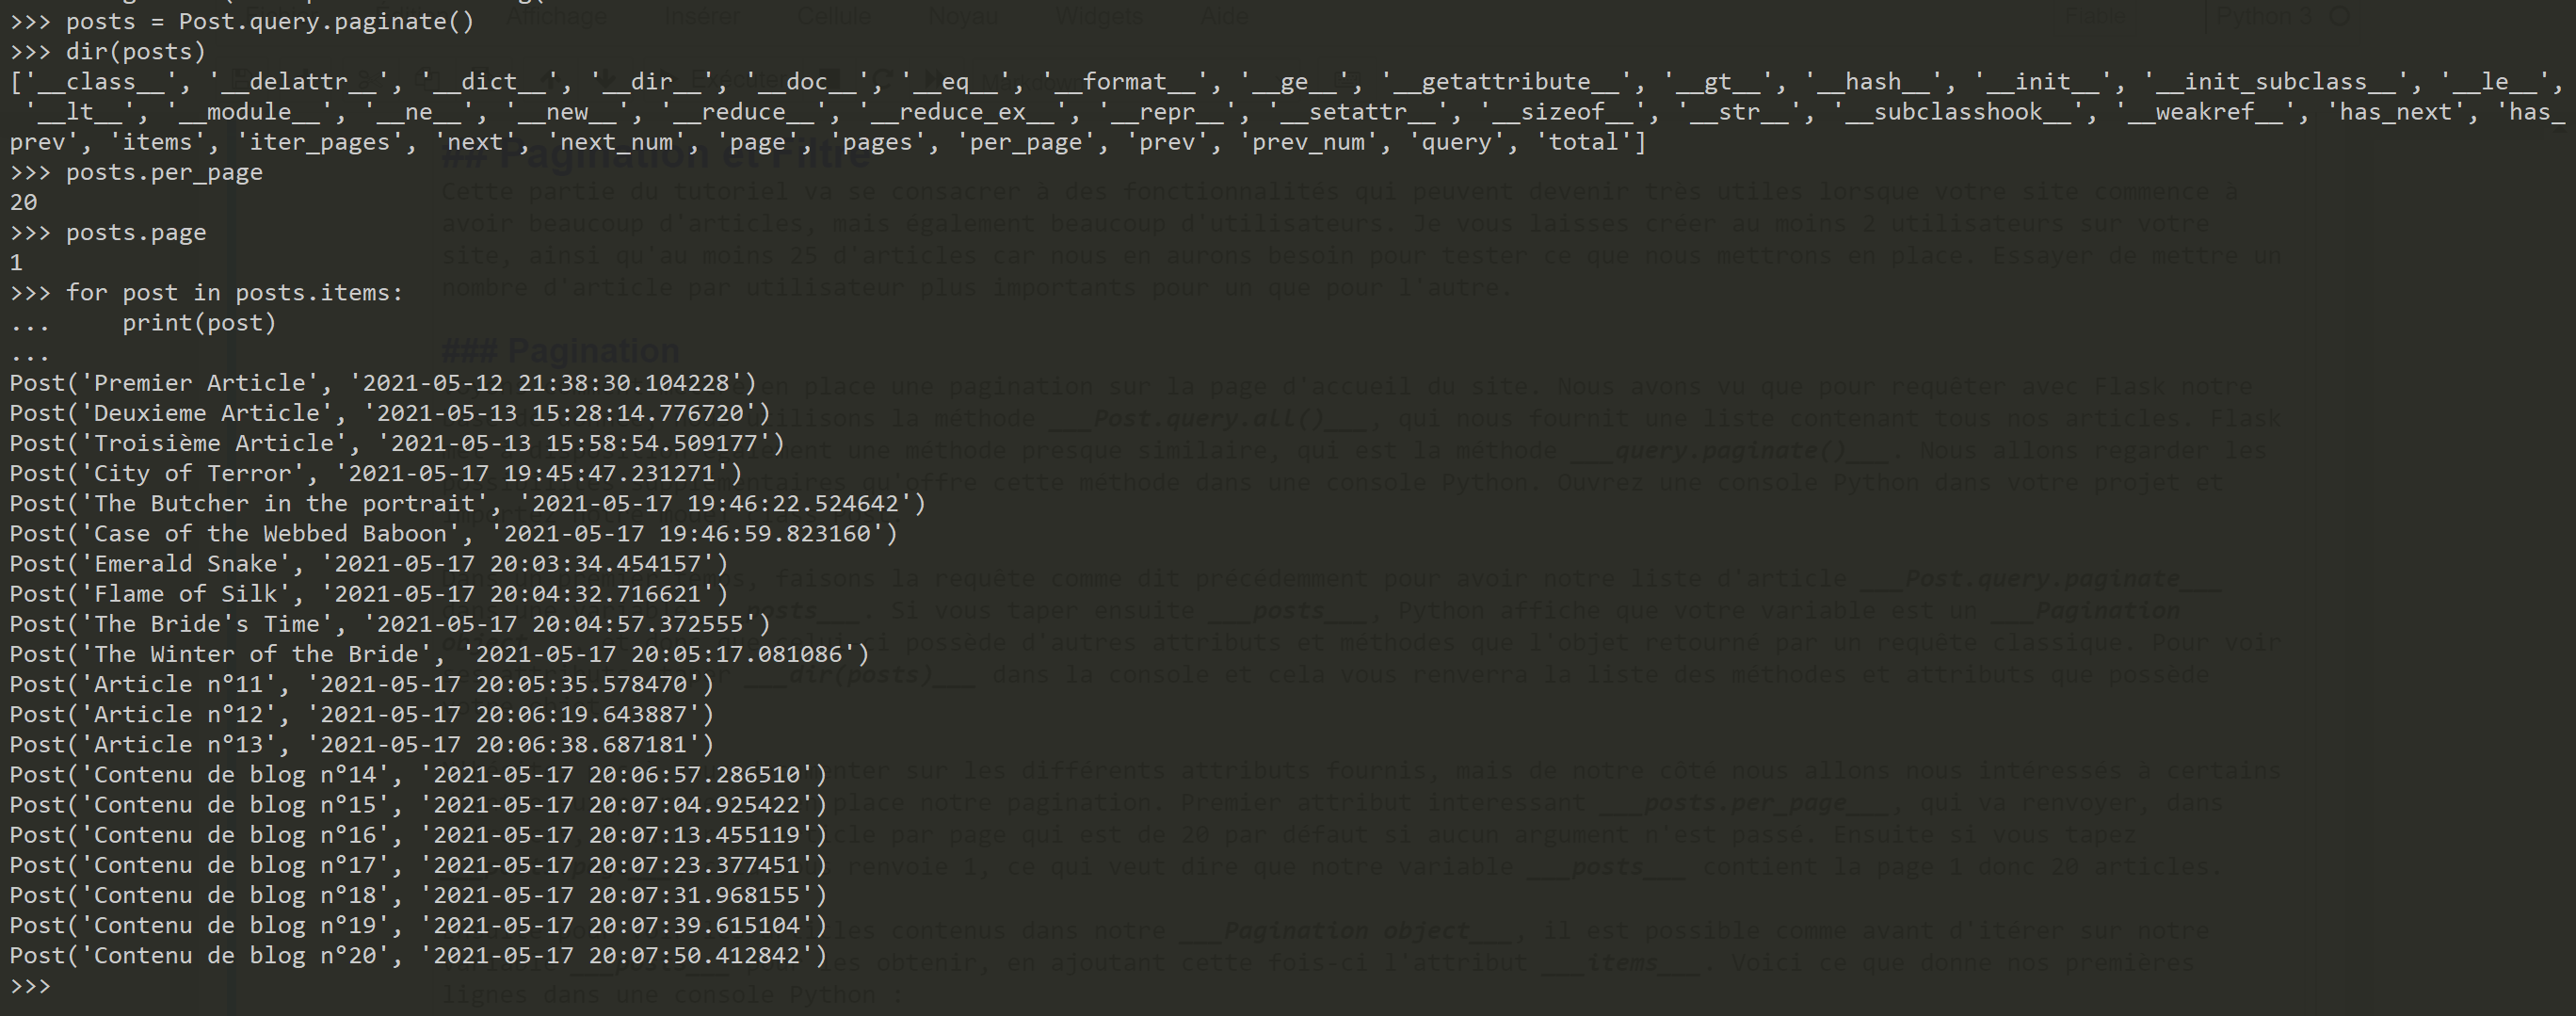

Comme dis précédement, notre variable ___posts___ contient les 20 articles de la page 1. Si nous voulons obtenir les articles de la page 2, il suffit de faire une nouvelle requête, en ajoutant en argument ___posts = Post.query.paginate(page=2)___. Maintenant si vous réalisez de nouveau une boucle ___for___ sur ___posts.item___, vous obtiendrez les 5 derniers articles de notre base de donnée. Pour vérifier, si vous tapez ___posts.page___, cela vous renvoie 2.

Maitenant, comme pour le numéro de page, il est possible d'indiquer dans notre requête de base le nombre d'article que nous voulons par page. On précise dans notre requête ___posts = Post.query.paginate(per_page=5)___, et cela génère donc des pages contenant 5 articles par page. Dernier attribut que nous allons utiliser, ___posts.total___, qui renverra le nombre d'articles total. Nous avons vu comment cette nouvelle méthode fonctionnait dans la console, implémentons la dans notre projet.

Dans notre fichier ___routes.py___, il faut modifier la view function ___home___, qui est celle requêtant sur l'ensemble de nos articles. Si vous avez bien compris, nous allons remplacer la requête ___Post.query.all()___ par ___Post.query.paginate(per_page=5)___, pour obtenir un objet de requête contenant 5 articles par page. Par défaut comme nous l'avons vu en console, la requete ___query.paginate___ renvoie la page numéro 1. Il va donc falloir réaliser dynamiquement notre requête des articles selon la page sur laquelle nous nous trouvons.

Pour cela, si vous vous souvenez lors de la mise en place du système de login du site, nous avions vu la possibilité de récupérer une valeur d'un argument d'url avec ___request.args.get(arg)___. Nous allons donc réaliser la même chose avec nos pages. Il faut créer une variable ___page___ qui récuperera cette valeur de page dans l'url, et ensuite nous la passons à notre requête des articles. Nous passons égalememts deux arguments supplémentaires, la page valeur par défaut de l'argument, ici 1 pour afficher la première page lors de la requête de la page d'accueil du site, et ___type=int___ pour exiger un integer.

In [ ]:
# routes.py

...

@app.route("/")
@app.route("/home")
def home():
    page = request.args.get('page', 1, type=int)
    posts = Post.query.paginate(page=page, per_page=5)
    return render_templates('home.html', posts=posts)

Notre requête ajustée, ajoutons également quelques lignes au template ___home.html___. Comme dis juste au dessus, il est possible d'itérer sur les articles contenus dans la variable ___posts___ avec ___posts.items___. Il faut donc juste ajouter l'attribut ___items___ à la variable ___posts___ de notre boucle déjà mise en place dans le template.

In [ ]:
# home.html

{% extends "layout.html" %}
{% block content %}

    <article class="container pt-3">

        <h1>Home Page</h1>
        
        # Ajout de l'attribut items pour adapter la boucle au nouvel Paginate object passé par la view function

        {% for post in posts.items %}

            <section class="home-article-container">
                <div class="home-article-info-container">
                    <img src="{{ url_for('static', filename='profile_pics/' + post.author.image_file) }}" alt="{{ post.author.username + '-profile'}}">
                    <h2><a href="{{ url_for('post', post_id=post.id) }}">{{ post.title }}</a> by {{ post.author.username }}</h2>
                </div>

                <div class="home-article-content">
                    <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
                    <p>{{ post.content }}</p>
                </div>
            </section>

        {% endfor %}

    </article>

{% endblock %}

En se rendant sur la page d'accueil, il n'y a plus que 5 articles d'affichés comme demandé. Retour dans notre console Python pur cette fois-ci nous pencher sur une autre méthode du ___Paginate object___. Révouvrez une console Python, importez le model class ___Post___, et créez un variable ___posts___ stockant la requête de ___Post.query.paginate(page=6, per_page=2)___, qui va générer pas mal de page mais cela est fait exprès pour notre demonstration.
.
A la suite, voyons ce que renvoie une itération en utilisant la méthode ___posts.iter_pages()___. Taper dans la console une boucle ___for page in posts.iter_pages(): print(page)___. vous verrez normalement une liste comme cell-ci :

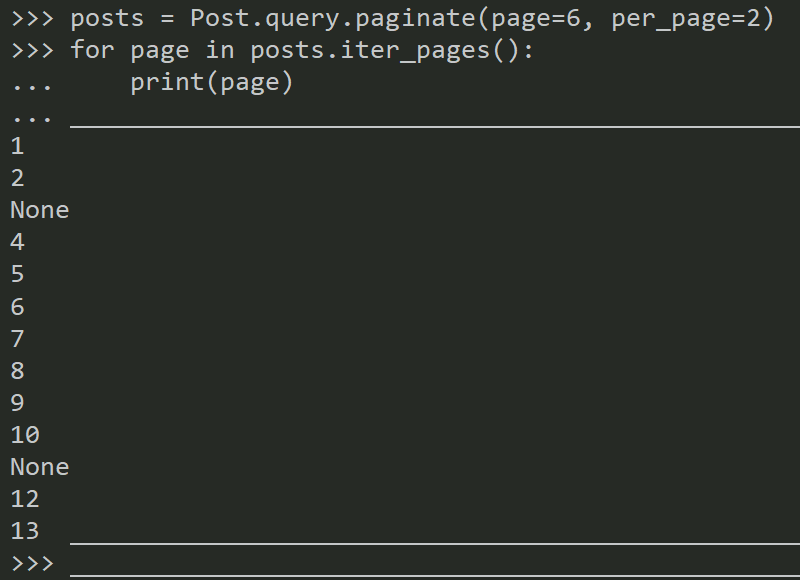

Pour rappel, notre objet actuel est la page 6 de nos articles. Ce que l'on voit ce sont les numéro de pages affichés par une tranche par défaut de la méthode ___iter_pages___. Actuellement nous voyons les deux premiers numéros et deux derniers numéros des pages totales qu'il y a avec également les limites gauches et droites par rapport à la page actuelle, ces tranches vont vous etre plus claires quand nous allons les définir nous mêmes. Les numéros de pages non compris dans la tranche renvois un ___None___ que nous allons exploiter également.

Retour dans notre template ___home.hml___, pour mettre en place le visuel de la pagination. Apres la fermeture de la boucle ___for___ pour itérer sur nos articles, oubrez une nouvelle boucle ___for page in posts.iter_pages()___. Comme je vous le disais, il est possible de définir les tranches de pages renvoyées selon la page sur laquelle nous sommes, en passant des arguments à ___iter_pages___. En premier ___left_edge et right_edge___, le nombre de page affichées dans les premières et dernières pages, exemple si l'on met ___left_edge=3 et right_edge=2___ dans une tranche de page de 1 à 25, les numéros de pages renvoyés seront 1 2 et 3 pour ___left_edge___, et 24 et 25 pour ___right_edge___.

Ensuite, ___current_left et curreng_right___, qui vont afficher le nombre des pages situées avant et après celle actuellement consultée. Exemple pour notre page 6, si nous mettons ___left_current=2 et right_current=3___, il sera renvoyé les numéros 4 et 5, et 7 8 et 9. Nous allons faire en sorte dans notre cas d'afficher le premier et le dernier numéro de page, et le numero précédent, et les 2 numéros suivant de la page actuellement consultée. Comme la méthode renvoie ___None___ selon les tranches définies, nous pouvons mettre en place une structure conditionnelle qui vérifie ___if page_num___, et affiche un bouton de lien avec le numéro de la page, sinon que notre template affiche "...". et autre subtilité encore, nous pouvons vérifier et demander que si le numéro de la page renvoyé est le numéro de la page consultée, le style de bouton soit différent des autres.

Voici ce que donne notre bloc de code pour la pagination :

In [ ]:
# home.html

...

        {% endfor %}

        {% for page_num in posts.iter_pages(left_edge=1, right_edge=1, left_current=1, right_current=2) %}
            {% if page_num %}
                {% if posts.page == page_num %}
                    <a class="paginate-btn btn btn-secondary" href="{{ url_for('home', page=page_num) }}">{{ page_num }}</a>
                {% else %}
                    <a class="paginate-btn btn btn-outline-secondary" href="{{ url_for('home', page=page_num) }}">{{ page_num }}</a>
                {% endif %}
            {% else %}
                ...
            {% endif %}
        {% endfor %}

    </article>

{% endblock %}

Nous pouvons aller sur la page d'accueil, avec 5 articles par pages, et tout en bas voir l'affichage des numéros de pages avec le numéro de la page consultée actuellement avec une apparence différente. Dernier ajustement sur la requête de nos articles, nous voyons que les premiers articles affichés ne sont pas les plus récents. Il est possible de faire un tri sur le résultat de la requête en utilisant la méthode ___order_by___ avant la méthode ___paginate___. On passera à cette méthode le champ de la base de donnée sur lequel nous voulons baser notre tri, dans notre cas ___Post.date_posted___ et utiliser la méthode ___desc()___, pour faire un tri décroissant.

In [ ]:
# routes.py

...

@app.route("/")
@app.route("/home")
def home():
    page = request.args.get('page', 1, type=int)
    posts = Post.query.order_by(Post.date_posted.desc()).paginate(page=page, per_page=5)
    return render_template('home.html', posts=posts)

### Filtrage par utilisateur

Pour vos utilisateurs, une fonctionnalité intéressante à mettre en place serait de pouvoir filtrer les articles par utilisateur, avec un simple clic sur le nom d'un utilisateur. La page de filtrage sera très similaire à la page d'accueil, avec en titre principal l'indication du nom d'utilisateur et du nombre d'articles de cet utilisateur.

Toujours dans notre fichier ___routes.py___, on part sur la base de la view function ___home.html___, et on la renomme ___user_posts___, qui va prendre en argument le username de l'utilisateur sur lequel nous voulons filtrer les articles. Dans le chemin d'url de ___app.route___, on définis la route ___user/<string:username>___  pour faire passer le nom d'utilisateur dans l'url et le passer à notre requête.

La variable ___page___ reste la même pour la pagination. On ajoute une variable ___user___ qui va récupérer l'instance du model class User correspondant au nom d'utilisateur passé dans l'url. Nous obtenons cette instance via une requête filtrante, et l'utilisation d'une méthode proche de ___get_or_404___, ___first_or_404___, qui va renvoyé le premier résultat de la requête ou renvoyer un code erreur HTTP 404 indiquant que l'utilisateur n'a pas été trouvé.

Cette variable ___user___, nous la passons à notre requête sur les articles pour les filtrer selon l'utilisateur (vous pouvez remarquer la notation spécifique de la requête des articles sur plusieurs lignes en mettant un ___\___ en fin de ligne pour continuer la requête). On termine cette view function en faisant un return du template que nous allons créer juste après ___user_posts.html___, avec le passage des articles ___posts___ et de l'utilisateur ___user___.

In [ ]:
# routes.py

...

@app.route("/user/<string:username>")
def user_posts(username):
    page = request.args.get('page', 1, type=int)
    user = User.query.filter_by(username=username).first_or_404()
    posts = Post.query.filter_by(username=user)\
        .order_by(Post.date_posted.desc())\
        .paginate(page=page, per_page=5)
    return render_template('user_posts.html', posts=posts, user=user)

...

Passons à la création du template ___user_posts.html___. Comme dit précédement, cette page va être très similaire à la page d'accueil, donc nous pouvons faire un copier coller de celle-ci et l'ajuster. Dans les ajustements, première chose, l'ajout d'un titre principal ___h1___ juste avant la boucle d'affichage des articles, pour afficher le nom de l'auteur des articles filtrés et le nombre d'articles avec ___{{ user.username }}___ et ___{{ posts.total }}___. La boucle d'article reste la même, il faut juste implémenter un lien ___a___ sur le nom de l'utilisateur pour accéder justement à cette page, et nous allons ajouter ce lien sur toutes les pages où il est possible de l'implémenter (___home.html, post.html___).

Egalement en derniière modification dans le template ___user_posts.html___, le système de lien de la pagination est dynamisé selon la page d'accueil, avec ___url_for('home', page=page_num)___. Il suffit de remplacer ___home___ par ___user_posts___ pour l'adapter. On passera également notre variable ___user___ au paramètre ___username___.

In [ ]:
# user_posts.html

{% extends "layout.html" %}
{% block content %}

    <article class="container pt-3">

        <h1>Article de {{ user.username }} ({{ posts.total }})</h1>

        {% for post in posts.items %}

            <section class="home-article-container">
                <div class="home-article-info-container">
                    <img src="{{ url_for('static', filename='profile_pics/' + post.author.image_file) }}" alt="{{ post.author.username + '-profile'}}">
                    <h2><a href="{{ url_for('post', post_id=post.id) }}">{{ post.title }}</a> de <a href="{{ url_for('user_posts', username=post.author.username) }}">{{ post.author.username }}</a></h2>
                </div>

                <div class="home-article-content">
                    <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
                    <p>{{ post.content }}</p>
                </div>
            </section>

        {% endfor %}

        {% for page_num in posts.iter_pages(left_edge=1, right_edge=1, left_current=1, right_current=2) %}
            {% if page_num %}
                {% if posts.page == page_num %}
                    <a class="paginate-btn btn btn-secondary" href="{{ url_for('user_posts',username=user.username, page=page_num) }}">{{ page_num }}</a>
                {% else %}
                    <a class="paginate-btn btn btn-outline-secondary" href="{{ url_for('user_posts',username=user.username, page=page_num) }}">{{ page_num }}</a>
                {% endif %}
            {% else %}
                ...
            {% endif %}
        {% endfor %}

    </article>

{% endblock %}

In [ ]:
# home.html

{% extends "layout.html" %}
{% block content %}

    <article class="container pt-3">

        <h1>Home Page</h1>

        {% for post in posts.items %}

            <section class="home-article-container">
                <div class="home-article-info-container">
                    <img src="{{ url_for('static', filename='profile_pics/' + post.author.image_file) }}" alt="{{ post.author.username + '-profile'}}">
                    <h2><a href="{{ url_for('post', post_id=post.id) }}">{{ post.title }}</a> de <a href="{{ url_for('user_posts', username=post.author.username) }}">{{ post.author.username }}</a></h2>
                </div>

                <div class="home-article-content">
                    <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
                    <p>{{ post.content }}</p>
                </div>
            </section>

        {% endfor %}

        {% for page_num in posts.iter_pages(left_edge=1, right_edge=1, left_current=1, right_current=2) %}
            {% if page_num %}
                {% if posts.page == page_num %}
                    <a class="paginate-btn btn btn-secondary" href="{{ url_for('home', page=page_num) }}">{{ page_num }}</a>
                {% else %}
                    <a class="paginate-btn btn btn-outline-secondary" href="{{ url_for('home', page=page_num) }}">{{ page_num }}</a>
                {% endif %}
            {% else %}
                ...
            {% endif %}
        {% endfor %}

    </article>

{% endblock %}

In [ ]:
{% extends "layout.html" %}
{% block content %}

    <article class="container article-detail-container pt-3">

        <header class="article-detail-header">
            <h1>{{ post.title }} <span class="article-detail-author">de <a href="{{ url_for('user_posts', username=post.author.username) }}">{{ post.author.username }}</a></span></h1>
            <small>{{ post.date_posted.strftime("%d %b %Y") }}</small>
        </header>

        <div class="article-detail-content">
            <p>{{ post.content }}</p>
        </div>

        {% if post.author == current_user %}
            <a class="btn btn-info" href="{{ url_for('update_post', post_id=post.id) }}">Modifier l'article</a>
            <button class="btn btn-danger" type="button" data-toggle="modal" data-target="#deleteModal">Supprimer</button>
        {% endif %}

    </article>

    <!-- Modal -->
    <div class="modal fade" id="deleteModal" tabindex="-1" role="dialog" aria-labelledby="deleteModalLabel" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header">
            <h5 class="modal-title" id="deleteModalLabel">Voulez-vous vraiment supprimer cet article ?</h5>
            <button type="button" class="close" data-dismiss="modal" aria-label="Close">
              <span aria-hidden="true">&times;</span>
            </button>
          </div>
          <div class="modal-footer">
            <button type="button" class="btn btn-secondary" data-dismiss="modal">Annuler</button>
            <form action="{{ url_for('delete_post', post_id=post.id) }}" method="post">
                <input class="btn btn-danger" type="submit" value="Supprimer">
            </form>
          </div>
        </div>
      </div>
    </div>

{% endblock %}

Il est maintenant possible d'afficher la page d'articles dédié à un utilisateur avec pagination. Nous en avons donc terminer avec cette partie. Nous passons maintenant à une nouvelle et dernière restructuration de notre application, plus flexible, plus facilement maintenable et organisées.

## Blueprints

Nous avions déjà réaliser une première restructuration de notre application, et celle-ci je vous le jure sera la dernière. Comme dit précedement, cette restructuration va permettre de rendre votre application beaucoup plus facile à maintenir, plus modublable. La finalité de cette étape sera de réaliser une fonction permettant de créer des instances de votre application, et donc de créer des applications avec la même base mais avec des configurations différentes, exemple typique de faire une application pour le développement, et une pour la production (appelation Application Factory).

### Creation des Blueprints

Nous allons donc pouvoir réaliser cette restructuration grâce à la classe ___Blueprint___ (plan détaillé), qui va permettre de splitter les différentes fonctionnalités de votre application en plusieurs modules qui leur sont dédiés. Pour bien comprendre prenons l'exemple de notre fichier ___routes.py___. Il contient actuellement toutes les view functions de notre application Flask, et cela en fait un énorme fichier, avec des view functions qui ont certes pour lien l'application, mais entre elle n'ont pas forcément de lien. ___Blueprint___ va permettre de splitter nos view functions, comme nos formulaires ou autres, dans un module propre à chaque fonctionnalité.

Pour réaliser cela, nous allons créer des packages Python, comme lors de la première restructuration de l'application. Dans notre exemple, nous allons partir sur un Blueprint pour les utilisateurs ___users___, un Blueprint pour les articles ___posts___, et un dernier Blueprint ___main___ qui réunira ce qui n'est pas catégoriser dans les deux autres. Commençons par créer le premier Blueprint ___users___ en créant dans notre package d'application ___flask_app___ un nouveau dossier ___users___ qui accueillera notre nouveau package/Blueprint. Créons dans la foulée le dossier ___posts___ pour le Blueprint des articles, et le dossier ___main___ pour le reste.

Nos dossiers créés, si vous vous souvenez, un package Python est obligatoirement constitué à sa racine d'un fichier ___\_\_init\_\_.py___ pour indiquer à Python qu'il s'agit d'un package. Créez donc un fichier ___\_\_init\_\_.py___ dans chacun de nos nouveaux dossiers, qui n'a pas besoin d'être remplis. Les packages/Blueprints sont initialisés, le but est donc que dans chacun se trouve les view functions, les fonctions, les formulaires qui lui sont propres. Commençons par les view functions, et créez un fichier ___routes.py___ dans chaque package pour que ceux-ci accueillent les view functions qui les concernent. 
Ensuite, les Blueprints ___users___ et ___posts___ ont également des formulaires les concernant, nous pouvvons donc créer un fichier ___forms.py___ dans le dossier ___users___ et ___posts___. Egalement dans notre fichier actuel de view function, nous pouvons voir des fonctions autres qui concernent les utilisateurs, comme la fonction de sauvegarde et redimensionnement des images de profil ___save_picture___. Dans le dossier ___users___ concerné, nous pouvons ajouter un fichier ___utils.py___ pour accueillir ces fonctions.

Voici une petite capture de la structure de votre application à ce stade :

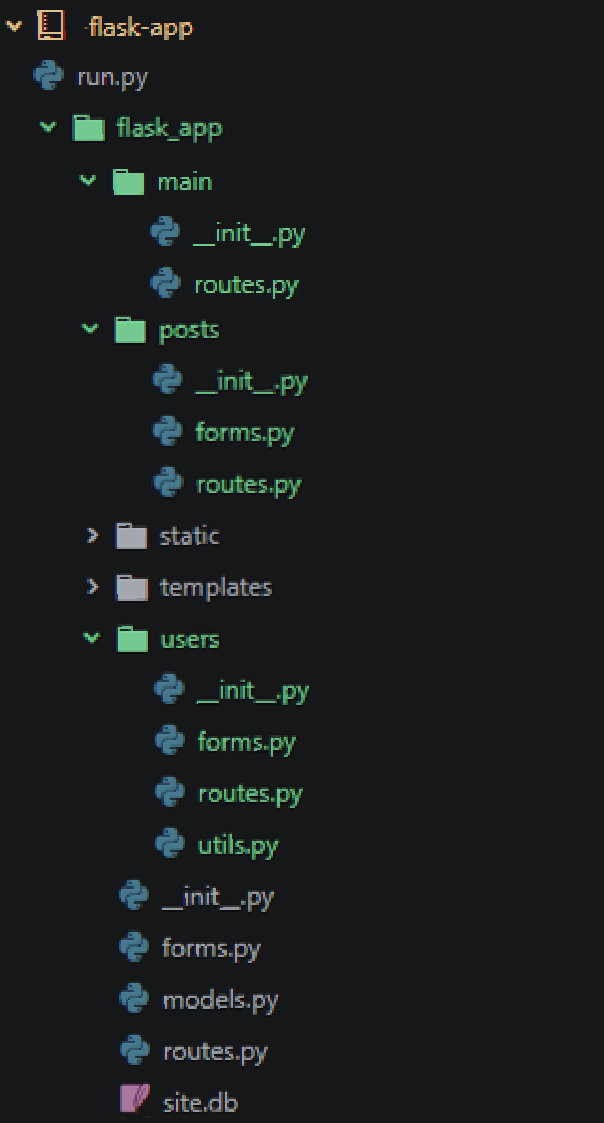

Nous avons créés les fichiers de la nouvelle structure de notre code, commençons à voir comment transformer nos nouveaux packages en Blueprint utilisables pour notre application.

Rendez-vous dans le fichier ___routes.py___ du dossier ___users___. Pour créer notre Blueprint ___users___, comme une application Flask, il faut créer une instance de la classe ___Blueprint___ fournis par Flask, et passer en argument le nom du Blueprint désiré, dans notre cas ___users___, la super variable ___\_\_name\_\____.

In [ ]:
# flask_app/users/routes.py

from flask import Blueprint

users = Blueprint('users', __name__)

Vous venez de créer votre premier Blueprint ___users___. Il va falloir maintenant intégrer ses propres view functions, et voir comment adapter l'application globalement. Dans notre fichier ___flask_app/routes.py___, faites un couper coller des view functions concernées par les utilisateurs et le système d'authentification, dans le fichier ___routes.py___ de ___users___. Voici la liste de celle-ci : register, login, logout, account, user_posts. Profitez également pour faire un couper coller de la fonction ___save_picture___ dans le fichier ___utils.py___ du dossier ___users___, puisqu'elle concerne directement les fonctionnalités liées aux utilisateurs.

In [ ]:
# flask_app/users/routes.py

from flask import Blueprint

users = Blueprint('users', __name__)

@app.route("/register", methods=['GET', 'POST'])
def register():
    if current_user.is_authenticated:
        return redirect(url_for('home'))
    form = RegistrationForm()
    if form.validate_on_submit():
        hash_password = bcrypt.generate_password_hash(form.password.data).decode('utf-8')
        user = User(username=form.username.data, email=form.email.data, password=hash_password)
        db.session.add(user)
        db.session.commit()
        flash(f'Votre compte a bien été créé {form.username.data}! Vous pouvez à présent vous connecter', 'success')
        return redirect(url_for('login'))
    return render_template("register.html", title="Register", form=form)


@app.route("/login", methods=['GET', 'POST'])
def login():
    if current_user.is_authenticated:
        return redirect(url_for('home'))
    form = LoginForm()
    if form.validate_on_submit():
        user = User.query.filter_by(email=form.email.data).first()
        if user and bcrypt.check_password_hash(user.password, form.password.data):
            login_user(user, remember=form.remember.data)
            next_page = request.args.get('next')
            return redirect(next_page) if next_page else redirect(url_for('home'))
        else:
            flash('Erreur d\'authentification, Veuillez verifier votre e-mail ou votre mot de passe', 'danger')
    return render_template("login.html", title="Login", form=form)


@app.route("/logout")
def logout():
    logout_user()
    return redirect(url_for('home'))


@app.route("/account", methods=['GET', 'POST'])
@login_required
def account():
    form = UpdateAccountForm()
    if form.validate_on_submit():

        if form.picture.data:
            picture_file = save_picture(form.picture.data)
            current_user.image_file = picture_file

        current_user.username = form.username.data
        current_user.email = form.email.data
        db.session.commit()
        flash('Vos informations ont bien été modifiées', 'success')
        return redirect(url_for('account'))

    elif request.method == 'GET':
        form.username.data = current_user.username
        form.email.data = current_user.email

    image_file = url_for('static', filename='profile_pics/' + current_user.image_file)
    return render_template("account.html", title=f"{current_user.username}", image_file=image_file, form=form)


@app.route("/user/<string:username>")
def user_posts(username):
    page = request.args.get('page', 1, type=int)
    user = User.query.filter_by(username=username).first_or_404()
    posts = Post.query.filter_by(author=user)\
        .order_by(Post.date_posted.desc())\
        .paginate(page=page, per_page=5)
    return render_template('user_posts.html', posts=posts, user=user)

In [ ]:
# flask_app/users/utils.py

def save_picture(form_picture):
    random_hex = secrets.token_hex(8)
    _, f_ext = os.path.splitext(form_picture.filename)
    picture_fn = random_hex + f_ext
    picture_path = os.path.join(app.root_path, 'static', 'profile_pics', picture_fn)

    output_size = (125, 125)
    i = Image.open(form_picture)
    i.thumbnail(output_size)
    i.save(picture_path)

    return picture_fn

Nous avons transférer toutes les view functions concernées par notre Blueprint ___users___, mais celle-ci sont toujours attachées à notre instance de Flask ___app___, car nous utilisons toujours ___@app.route___ pour toutes nos view functions. Pour faire en sorte d'affilier nos view functions à notre nouveau Blueprint, il suffit de remplace l'instance de l'application Flask par notre instance de Blueprint que nous avons déclarées au début qui est ___users___. Remplacez donc tous les ___app.route___ par ___users.route___ (petit conseil, renseignez vous avec votre éditeur de texte pour faire une sélection multiple selon une recherche de mot-clés dans un fichier pour remplacer tous cela plus rapidement, et nous en aurons besoins pour la suite).

In [ ]:
# flask_app/users/routes.py

...

@users.route("/register", methods=['GET', 'POST'])

    ...

@users.route("/login", methods=['GET', 'POST'])

    ...

@users.route("/logout")

    ...

@users.route("/account", methods=['GET', 'POST'])

    ...

@users.route("/user/<string:username>")

    ...

Vous avez maintenant compris comment créer un Blueprint et ses view functions associés, vous pouvez réaliser le même process pour le Blueprint ___posts___ et ___main___ également : creation de l'instance de ___Blueprint___, couper coller les view functions associées, remplacer l'instance de Flask par l'instance de votre Blueprint créée. Les view functions concernant les articles sont les suivantes : ___new_post, post, update_post, delete_post___. Les view functions restantes vont donc le fichier ___routes.py___ de notre Blueprint ___main___ : ___home et about___. 

In [ ]:
# flask_app/posts/routes.py

from flask import Blueprint

posts = Blueprint('posts', __name__)


@posts.route("/post/new", methods=['GET', 'POST'])
@login_required
def new_post():
    form = PostForm()

    if form.validate_on_submit():
        post = Post(title=form.title.data, content=form.content.data, author=current_user)
        db.session.add(post)
        db.session.commit()
        flash('Votre article a bien été créé et publié !', 'success')
        return redirect(url_for('home'))

    return render_template('create_post.html', title="Nouvel Article", form=form, legend='Créer un article')


@posts.route("/post/<int:post_id>")
def post(post_id):
    post = Post.query.get_or_404(post_id)
    return render_template('post.html', title=post.title, post=post)


@posts.route("/post/<int:post_id>/update", methods=['GET', 'POST'])
@login_required
def update_post(post_id):
    post = Post.query.get_or_404(post_id)

    if post.author != current_user:
        abort(403)

    form = PostForm()
    if form.validate_on_submit():
        post.title = form.title.data
        post.content = form.content.data
        db.session.commit()
        flash('Votre article a bien été modifié', 'success')
        return redirect(url_for('post', post_id=post.id))
    elif request.method == 'GET':
        form.title.data = post.title
        form.content.data = post.content

    return render_template('create_post.html', title='Modifier l\'article', form=form, legend='Modifier un article')


@posts.route("/post/<int:post_id>/delete", methods=['GET', 'POST'])
@login_required
def delete_post(post_id):
    post = Post.query.get_or_404(post_id)

    if post.author != current_user:
        abort(403)

    db.session.delete(post)
    db.session.commit()
    flash('Votre article a bien été supprimé.', 'success')
    return redirect(url_for('home'))

In [ ]:
#  flask_app/main/routes.py

from flask import Blueprint

main = Blueprint('main', __name__)

@main.route("/")
@main.route("/home")
def home():
    page = request.args.get('page', 1, type=int)
    posts = Post.query.order_by(Post.date_posted.desc()).paginate(page=page, per_page=5)
    return render_template("home.html", posts=posts)

@main.route("/about")
def about():
    return render_template("about.html", title="About")

Nous avons couper toutes les view functions de notre application dans leur Blueprint respectif. Notre ancien fichier ___routes.py___ ne contient maintenant que les différents imports à réaliser. Nous allons nous en occuper plus tard, pour le moment réalisons le même process de couper les formulaires et les coller dans les Blueprints qui leur correspondent. Splitter une grosse application en petit module est un très bonne exercice car il permet de comprendre comment chaque fichier doit fonctionner avec les autres, cela fais peur au début car on a peur que tout le travail soit brisé, mais c'est un bon moyen de s'exercer.

Rendez vous dans notre fichier ___forms.py___ qui contient pour le moment tous les formulaires de l'application. Comme je le disais, réalisez le même process de splitter les formulaires dans leur Blueprint respectif, les formulaires suivants se retrouveront dans le fichier ___forms.py___ du Blueprint ___users___ puisqu'il concerne l'utilisateur et son authentification : ___RegistrationForm, LoginForm et UpdateAccountForm___. Le formulaire ___PostForm___ ser retrouvera quant à lui dans le fichier ___forms.py___ de ___posts___.

In [ ]:
# flask_app/users/forms.py

class RegistrationForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    confirm_password = PasswordField('Confirm Password', validators=[
                                     DataRequired(), EqualTo('password')])
    submit = SubmitField('Sign Up')

    def validate_username(self, username):

        user = User.query.filter_by(username=username.data).first()
        if user:
            raise ValidationError('Ce nom d\'utilisateur est déjà pris, veuillez en choisir un autre.')

    def validate_email(self, email):
        user = User.query.filter_by(email=email.data).first()
        if user:
            raise ValidationError('Cet adresse mail est déjà prise, veuillez en choisir une autre.')


class LoginForm(FlaskForm):
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    remember = BooleanField('Se Souvenir de moi')
    submit = SubmitField('Login')


class UpdateAccountForm(FlaskForm):
    username = StringField('Nom d\'utilisateur', validators=[DataRequired(), Length(min=2, max=20)])
    email = StringField('Email', validators=[DataRequired(), Email()])
    picture = FileField('Changer sa Photo', validators=[FileAllowed(['jpg', 'png'])])
    submit = SubmitField('Update')

    def validate_username(self, username):
        if username.data != current_user.username:
            user = User.query.filter_by(username=username.data).first()
            if user:
                raise ValidationError(
                    'Ce nom d\'utilisateur est déjà pris, veuillez en choisir un autre.')

    def validate_email(self, email):
        if email.data != current_user.email:
            user = User.query.filter_by(email=email.data).first()
            if user:
                raise ValidationError('Cet adresse mail est déjà prise, veuillez en choisir une autre.')

In [ ]:
# flask_app/posts/forms.py

class PostForm(FlaskForm):
    title = StringField('Titre', validators=[DataRequired()])
    content = TextAreaField('Contenu', validators=[DataRequired()])
    submit = SubmitField('Publier')

Les formulaires coupés coller dans leur Blueprint respectif, il faut maintenant s'attaquer à une des étapes assez fastidieuse de la restructuration, fixer les imports dans chacun des fichiers. Pour les éditeurs de code, il existe pas mal de plugin indiquant via un symbole ou marqueur syntaxique, les problèmes d'imports dans vos fichiers, soit qu'un import n'est pas utile, soit qu'il est manquant.

Je vais fournir la liste des imports juste en dessous de ce texte pour vous vérifier, mais essayer de réaliser cette correction par vous même. Nous avons vus pas mal de fois comment réaliser des imports via des modules dans notre application etc... Dites vous que les imports des classes venant d'extension ne devrait pas poser de soucis, mais qu'il faut être vigilant sur la syntaxe des imports de nos fichiers Python. Pour exemple, maintenant, si vous voulez importer un formulaire du Blueprint ___users___ dans son fichier ___routes.py___, vous devez passer par ___from flask_app.users.forms import Form___.

Dernier conseil pour les imports, fiez vous à nos anciens fichiers de formulaires et de view functions.

In [ ]:
# Snippet des imports fixés pour chaque nouveau fichier

# flask_app/main/routes.py
from flask import render_template, request, Blueprint
from flask_app.models import User, Post

# flask_app/posts/forms.py
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField, TextAreaField
from wtforms.validators import DataRequired

# flask_app/posts/routes.py
from flask import render_template, url_for, flash, redirect, request, abort, Blueprint
from flask_app import db
from flask_app.posts.forms import PostForm
from flask_app.models import Post
from flask_login import current_user, login_required

# flask_app/users/forms.py
from flask_wtf import FlaskForm
from flask_wtf.file import FileField, FileAllowed
from flask_login import current_user
from wtforms import StringField, PasswordField, SubmitField, BooleanField
from wtforms.validators import DataRequired, Length, Email, EqualTo, ValidationError
from flask_app.models import User

# flask_app/users/routes.py
from flask import render_template, url_for, flash, redirect, request, Blueprint
from flask_app import db, bcrypt
from flask_app.users.forms import RegistrationForm, LoginForm, UpdateAccountForm
from flask_app.models import User, Post
from flask_login import login_user, current_user, logout_user, login_required
from flask_app.users.utils import save_picture

# flask_app/users/utils.py
import os
import secrets

from flask_app import app
from PIL import Image

Les imports modifiés et corrigés dans chaque nouveau fichier, nous pouvons supprimer nos vieux fichiers ___routes.py___ et ___forms.py___ à la racine de ___flask_app___, puisque nous avons tous déplacer. Il va falloir en conséquences modifier quelques lignes dans notre fichier ___\_\_init\_\_.py___, car si vous retournez dessus, on peut voit concernant les routes d'url et les view functions, nous importons toujours celles-ci via le fichier ___routes.py___ que nous venons de supprimer.

Ce qu'il va falloir réaliser à la place, c'est charger nos view functions à partir des instances de nos Blueprints fraichement créés. Supprimez la dernière ligne d'import, et à la place commençons par importer les view functions de ___users___ avec ___from flask_app.users.routes import users___, la variable ___users___ représentant l'instance du Blueprint ___users___. Pour enregistrer l'instance d'un Blueprint dans l'application globale, nous utilisons la méthode ___app.register_blueprints___, à laquelle on passe l'instance de Blueprint.

Dans notre cas il suffit donc de réaliser ce process pour nos 3 Blueprints ___users, posts et main___.

In [ ]:
# flask_app/__init__.py

...

from flask_app.users.routes import users
from flask_app.posts.routes import posts
from flask_app.main.routes import main

app.register_blueprint(users)
app.register_blueprint(posts)
app.register_blueprint(main)

Il reste une dernière chose à faire avant de pouvoir tester si tous ces changements n'ont pas changer le bon fonctionnement de notre application, assez fastidieux comme corriger les imports. Dans nos différents fichiers, nous avons utiliser la méthode ___url_for___ pour générer les liens dynamiquements en passant le nom de la view function. Avec la restructuration de l'application, il faut préciser en plus du nom de la view function, le Blueprint qu'il lui est associé.

Il faut donc aller dans chaque fichier contenant la méthode ___url_for___, et corriger le passage de la view function en ajoutant son Blueprint associé. Exemple, pour la view function ___home___, maintenant qu'elle est associée au Blueprint ___main___, il faut donc passer ___'main.home'___ à la méthode ___url_for___. Encore une fois, comme pour le changement de la variable ___app___ par le nom de l'instance Blueprint, utilisez un outil de recherche de votre editeur de texte pour le réaliser plus rapidement. Voici la liste des fichiers à modifier qui contiennent la méthode ___url_for___:

- flask_app/posts.routes.py
- flask_app/templates/home.html
- flask_app/templates/layout.html
- flask_app/templates/login.html
- flask_app/templates/post.html
- flask_app/templates/register.html
- flask_app/templates/user_posts.html
- flask_app/users/routes.py

Le dernier changement à réaliser en terme de route d'url est dans le fichier ___\_\_init.py\_\____ de ___flask_app___. La déclaration de notre page de login à ___login_manager.login_view___ doit avoir le même changement que pour ___url_for___, et donc nous devons indiquer ___users___ avant ___login___, qui est le Blueprint concerné par la view function. Après ce changement, démarrez l'application via la console et testez les fonctionnalités du site pour voir si tous fonctionne pour le mieux et que vous n'avez rien oubliés.

La restructuration globale de notre application est faite, comme dit précédement, c'est une opération assez fastidieuse mais qui donne de la modularité à celle-ci. Passons à deux dernières étapes de cette partie. Nous allons voir comment faire pour rendre votre application plus facile à maintenir et à tester, en créant un fichier de configuration dédié dans un premier temps.

### Fichier de configuration

Dans le dossier ___flask_app___, créez un nouveau fichier ___config.py___ qui va accueillir la configuration de votre application. Dans ce fichier nous allons créer une classe ___Config___ qui prendra en attribut toutes les configurations que nous souhaitons mettre pour notre application.

Donc allez dans le fichier ___\_\_init\_\_.py___ de ___flask_app___, et couper coller tous ce qui concerne la configuration de l'application, c'est à dire ___app.config___, dans la classe ___Config___. ___app.config___ n'a plus de raison d'exister maintenant, vous pouvez le supprimer des lignes de déclaration, et ne laisser que le nom des clés pour en faire des constantes. Vous devriez vous retrouvez avec un fichier ___config.py___ comme ceci :

In [ ]:
# flask_app/config.py

class Config:
    SECRET_KEY = 'ec3ae0af562516b4e5e135f883d3519f'
    SQLALCHEMY_DATABASE_URI = 'sqlite:///site.db'

Une bonne pratique pour des informations sensibles comme celle-ci est d'utiliser les variables d'environnement. Selon votre système d'exploitation, la manière de les déclarer est différentes, je vous invites à aller voir les vidéos de cette personne qui explique la méthode d'enregistrement d'une variable d'environnement selon le système d'exploitation.

- Windows : https://www.youtube.com/watch?v=IolxqkL7cD8&t=0s
- Mac et Linux : https://www.youtube.com/watch?v=5iWhQWVXosU&t=0s

Une variable d'environnement va permettre de stocker une valeur cachée, et il est possible de récupérer cette valeur avec la librairie ___os___ de Python, et la méthode ___environ.get('ENV_VAR_KEY')___. Nous pouvons donc utiliser cette méthode pour nos deux valeurs du fichier pour les garder secrètes.

In [ ]:
# flask_app/config.py

import os

class Config:
    SECRET_KEY = os.environ.get('SECRET_KEY')
    SQLALCHEMY_DATABASE_URI = os.environ.get('SQLALCHEMY_DATABASE_URI')

La prochaine étape consiste à passer notre configuration à l'application. Pour ça, nous utilisons la méthode ___app.config.from_object___. Dans le fichier ___\_\_init\_\_.py___ importez la classe ___Config___ de ___flask_app.config___, et juste après la déclaration de ___app___, ajouter la configuration avec ___app.config.from_object(Config)___.

In [ ]:
# flask_app/__init.py__

...

# Import de la classe Config du fichier config.py

from flask_app.config import Config

app = Flask(__name__)
app.config.from_object(Config)

...

Démarrez le serveur web et naviguez sur le site pour voir si tous fonctionne pour le mieu, si c'est le cas, nous allons partir sur une autre optimisation en terme de maintenance et test de votre application.

### Fonction de création d'instance de l'app

Mettre en place une fonction de création d'instance de votre application, c'est la dernière chose que nous allons mettre en place ici. Cela va permettre de créer des versions différentes de votre application avec des fichiers de configuration différent, donc encore une fois la rendre plus modulable.

Toujours dans notre fichier ___flask_app/\_\_init\_\_.py___, nous créons cette nouvelle fonction ___create_app___ en bas, qui prendra en argument la classe de configuration ___config_class=Config___, pour que la configuration par défaut soit celle que nous avons créer. Ensuite dans cette fonction, il y aura toutes les lignes du fichier qui concerne l'application, mais sans les extensions mise en place, pour les raisons, référez vous à la documentation officielle de Flask l'expliquant très bien, mais pour résumer, une instance d'extension peut servir à plusieurs applications.

Nous retrouvons donc dans notre fonction, l'instance de l'application et sa configuration, et l'enregistrement de nos Blueprints. Nos extensions n'étant plus reliées directement à une instance de Flask, nous pouvons retirer ___app___ en argument de celles-ci. A la place, nous initions les instances des extensions dans notre fonction de creation d'application avec ___extension_instance.init_app(app)___, pour les passer à notre application.

Notre fonction a pour finalité de retourner l'instance de l'application ___app___

In [ ]:
# flask_app/__init.py__

from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from flask_bcrypt import Bcrypt
from flask_login import LoginManager
from flask_app.config import Config


db = SQLAlchemy()
bcrypt = Bcrypt()
login_manager = LoginManager()
login_manager.login_view = 'users.login'
login_manager.login_message_category = 'info'


def create_app(config_class=Config):
    app = Flask(__name__)
    app.config.from_object(Config)
    
    db.init_app(app)
    bcrypt.init_app(app)
    login_manager.init_app(app)

    from flask_app.users.routes import users
    from flask_app.posts.routes import posts
    from flask_app.main.routes import main
    
    app.register_blueprint(users)
    app.register_blueprint(posts)
    app.register_blueprint(main)
    
    return app

Le fait de créer notre fonction a pour conséquences de ne plus fournir la variale ___app___ directement de ce package. Cela a pour conséquence sur certains fichiers de fausser les imports encore une fois, puisque nous utilisons cette variable ___app___ de nombreuses fois dans d'autres fichiers.

Pour remplacer celle-ci dans la configuration actuelle, le module ___flask___ fournis la variable ___current_app___, que nous allons donc utiliser comme subsitue dans les fichiers qui en ont besoin. Dans les fichiers, on retrouve ___run.py___, mais nous n'allons pas faire la modification tout de suite car elle est spécifique, ___\_\_init\_\_.py___ mais c'est celui qui créer notre variable ___app___, et dans le fichier ___utils.py___ de notre Blueprint ___users___. Il suffit donc de remplacer l'import de notre variable ___app___ par ___current_app___ et modifier le fichier en conséquence

In [ ]:
# flask_app/users/utils.py

import os
import secrets

# Substitution de app par current_app

from flask_app import current_app
from PIL import Image


def save_picture(form_picture):
    random_hex = secrets.token_hex(8)
    _, f_ext = os.path.splitext(form_picture.filename)
    picture_fn = random_hex + f_ext
    
    # Remplacement ici de app par current_app
    
    picture_path = os.path.join(current_app.root_path, 'static', 'profile_pics', picture_fn)
    
    ...

Passons au fichier ___run.py___. La spécifité de la modification ici est que nous n'importons plus l'instance de l'application Flask, mais notre fonction de creation d'application, et nous déclarons une nouvelle variable ___app___ qui la stockera.

In [ ]:
# flask_app/run.py

# Import de notre fonction de creation de l'app

from flask_app import create_app

# On stocker l'instance de l'application dans une variable qu'on passera ensuite à notre structure conditionnelle

app = create_app()

if __name__ == "__main__":
    app.run(debug=True)

Après cette dernière petite modification, relancez le server web pour tester votre application et toutes ses fonctionnalités pour vous assurer que vous n'avez rien oubliés, et si c'est le cas, nous pouvons passer à la dernière partie de ce tutoriel, la mise en place d'une page d'erreur personnalisé.

## Page d'erreur personnalisée

Pour terminer ce tutoriel, nous allons voir comment il est possible de réaliser des pages d'erreurs personnalisées. Si vous vous souvenez, nous avons vu plusieurs types d'erreurs que notre utilisateur pourrait rencontrer.

La première et la plus connue, l'erreur HTTP **404**, indiquant que la demande de page que l'utilisateur a demandé n'a pas été trouvé par le serveur. Nous avons vus également l'erreur **403**, indiquant à l'utilisateur qu'il n'est pas autorisé à accéder à cette page.

La dernière que n'avons pas vu en particulier, signifiant une erreur générale retournée par le serveur, est l'erreur **500**. Nous allons donc mettre en place une page plus adapté au style de notre site, et plus fonctionnelles, pour ces 3 erreurs.

### Blueprint errors

Pour garder l'esprit de la structure Blueprint de notre application, nous allons créer un nouveau Blueprint ___errors___, ce qui veut dire nouveau dossier ___errors___ avec dedans, un fichier vide ___\_\_init\_\_.py___. 

Vu qu'il s'agit d'un Blueprint pour les erreurs, nous allons créer un fichier ___handlers.py___, à la place du fichier ___routes.py___ qui est plus en accord avec les normes. Dans ce fichier nous importons ___Blueprint___ du module ___flask___, et déclarons une instance ___errors___ de notre Blueprint comme pour la création des autres Blueprints.

Ensuite nous allons faire appel à un décorateur sur notre Blueprint, ___app_errorhandler()___, auquel nous passons le numéro de l'erreur HTTP, qui va nous permettre de définir une view function lorsque l'erreur HTTP en argument est reçu. Puis nous pouvons définir notre view function pour l'erreur **404**, ___error_404___ qui prend en argument ___error___.

Notre view function fais un return d'un template que nous allons créer dans un sous dossier ___errors___, donc n'oubliez pas d'importer la méthode ___render_template___ du module ___flask___, et il renvoie également l'erreur **404** hors de la méthode ___render_template___.

In [ ]:
# flask_app/errors/handlers.py

from flask import Blueprint, render_template

errors = Blueprint('errors', __name__)


@errors.app_errorhandler(404)
def error_404(error):
    return render_template('errors/404.html'), 404

Si vous avez bien compris, il suffit donc de réaliser la même chose pour nos 2 autres erreurs HTTP **403** et **500**. Vous pouvez partir d'un copier coller de la view function que nous venons de déclarer à l'instant de simplement changer le code d'erreur dans toutes les parties de la view function.

In [ ]:
# flask_app/errors/handlers.py

from flask import Blueprint, render_template

errors = Blueprint('errors', __name__)


@errors.app_errorhandler(404)
def error_404(error):
    return render_template('errors/404.html'), 404

@errors.app_errorhandler(403)
def error_403(error):
    return render_template('errors/403.html'), 403


@errors.app_errorhandler(500)
def error_500(error):
    return render_template('errors/500.html'), 500

Nos view functions sont en place, il ne reste plus qu'à créer les templates qui leurs sont associées. Dans le dossier ___templates___, comme dit précédemment, pour plus de clarté, créez un dossier ___errors___ pour y mettre les templates dédiés.

### Templates

Pour les 3 templates rien de très compliqué, il suffit de faire hériter notre template ___layout.html___, et y afficher ensuite un message personnalisé selon le type d'erreur. Pour rappel :
- erreur 404 : le serveur n'a pas trouvé la page demandée
- erreur 403 : l'utilisateur n'est pas autorisé à accéder à cette page
- erreur 500 : erreur générale de la part du serveur.

Je vous laisse le soin de choisir vos messages personnalisés, voici mes templates pour exemple pour chaque erreur :

### Ajout du blueprint
Dernière étape pour que cela fonctionne au mieux, retour dans le fichier ___\_\_init.py\_\____ de ___flask_app___ pour y ajouter et déclarer notre dernier Blueprint en l'important avec ___from flask_app.errors.handlers import errors___, et en l'ajoutant avec ___app.register___.

In [ ]:
# flask_app/__init.py__

...

    from flask_app.errors.handlers imports errors
    app.register_blueprint(users)
    app.register_blueprint(psots)
    app.register_blueprint(main)
    app.register_blueprint(errors)

Faite un test de vos différentes erreurs, et vous venez de terminer la partie Développement de ce tutoriel bravo !
Dès que je pourrai, j'ajouterai la partie mise en production.

## Deploiement sur Heroku

Connexion avec CLI Heroku
Installer gunicorn dans les packages
Générer fichier requirements.txt
Créer un fichier Procfile
Dans ce fichier indiquer : web: gunicorn app:app
Créer l'application sur Heroku et pusher le repository git sur celui-ci (comme application Django)

video source : https://www.youtube.com/watch?v=kizhm0bjVK4

Configuration Postgresql
https://towardsdatascience.com/deploy-a-micro-flask-application-into-heroku-with-postgresql-database-d95fd0c19408